In [ ]:
import numpy as np
import pandas as pd
import pickle as pk
from google.colab import drive
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
#import tensorflow as tf
import os
from os import listdir
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import concat

import math 
import operator as op
from operator import itemgetter 
from functools import reduce
import random
import pickle
from time import perf_counter
#!pip uninstall torch
#!pip install torch==1.4.0
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from scipy.stats import pearsonr
from scipy.stats import genpareto
#Arima
from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm

plt.rcParams.update({'font.family':'sans-serif'})

In [ ]:
seed = 0
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)
torch.set_default_dtype(torch.float32)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

torch.set_printoptions(precision=6)
np.set_printoptions(precision=6)

#print(tf.__version__)
print(np.__version__)
print(torch.__version__)

1.19.5
1.9.0+cu102


In [ ]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Jul 29 09:27:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    31W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


function ClickConnect() {
  console.log('Working')
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click()
}

setInterval(ClickConnect, 60000)

In [ ]:
#File path
path = os.path.join(os.path.dirname(os.path.realpath('__file__')) +
"/gdrive/MyDrive/MasterThesis/data") 

#path = os.path.join(os.path.dirname(os.path.realpath('__file__')))
print("Current path: ",path)
os.chdir(path)

Current path:  /content/gdrive/MyDrive/MasterThesis/data


### 0. Data Reader

In [ ]:
def data_reader(type):

      if (type == "CO2"):

          data = pd.read_csv("CO2.csv", engine='python', sep=",", decimal=".")
          data['date'] = pd.to_datetime(data.year*10000+data.month*100+data.day,format='%Y%m%d')
          data = data[['date', 'co2']]
          data.set_index('date', inplace=True)

          fig, ax = plt.subplots(figsize=(15, 6))
          ax.plot(data,'b')
          plt.title('CO2 Concentration of Mount Monalo')
          plt.xlabel('Date')
          plt.ylabel("CO2  Amount")
          print(data.shape)


          df1 = pd.DataFrame({'co2':data.co2})
      elif (type == "pseudo"):

          data3 = pd.read_csv("pseudo.csv", engine='python', sep=";", decimal=",")
          n = int(data3.shape[1])
          m = int(data3.shape[0])
          data = np.array([])
          ts = np.array([])
          for i in range(n):

              data = np.append(data, data3.iloc[:, i].values) 
              df1 = pd.DataFrame({'pseudo':data})
              #print(i)
      
      elif (type == "bitcoin1"):

          bitDS = pd.read_csv("bitcoin.csv")
          bitDS["Timestamp"] = pd.to_datetime(bitDS["Timestamp"] ,unit="s").dt.date
          group = bitDS.groupby('Timestamp')
          ds = group['Weighted_Price'].mean()
          df1 = pd.DataFrame({'bitcoin':ds.values})

      elif (type == "bitcoin"):

          df = pd.read_csv("bitcoin.csv")
          df.drop(['Open','Close','Volume_(BTC)','Volume_(Currency)', 'High','Low'],axis=1, inplace=True)

          df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')
          df = df.set_index('Timestamp')
          df = df.resample('6H').mean()
          df = df.dropna()
          df = df.iloc[7175:,:]

          fig, ax = plt.subplots(figsize=(15, 6))
          ax.plot(df,'b')
          plt.title('Bitcoin Price')
          plt.xlabel('Date')
          plt.ylabel("Price")
          print(df.shape)

          df1 = pd.DataFrame({'bitcoin':df.iloc[:,0].values})

      elif (type == "sinus"):

          df1 = pd.read_csv("sinus.csv", engine='python', sep=".", decimal=",")

          fig, ax = plt.subplots(figsize=(15, 6))
          ax.plot(df1,'b')
          plt.title('Sinus Curve')
          plt.xlabel('Time')
          plt.ylabel("Value")
          print(df1.shape)

      elif (type == "sinus2"):

          df1 = pd.read_csv("sinus2.csv", engine='python', sep=".", decimal=",")

      return df1



(6201, 1)


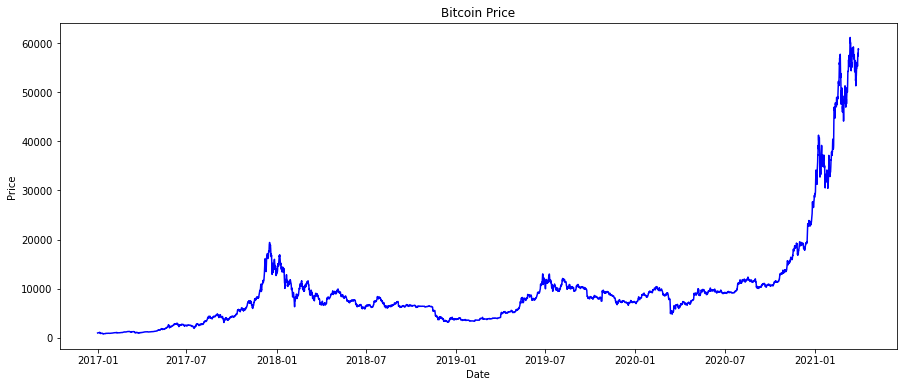

In [ ]:
#CO2 - pseudo
data_name = "bitcoin"
data = data_reader(data_name)

In [ ]:
def data_name2(data_name):

      if  (data_name == "CO2"):

            data_name2 = "CO2" 

      elif (data_name == "bitcoin"):

            data_name2 = "Bitcoin" 

      elif (data_name == "sinus"):

            data_name2 = "Pseudo Sinus"

      return data_name2

data_name2 = data_name2(data_name); print(data_name2)

Bitcoin


In [ ]:
def normalization(df1):

      time = DataFrame(df1.values)
      df1 = concat([time, time.shift(1), ], axis=1)
      df1.columns = ["time", "lag1"]
      df1["diff"]= df1["time"] - df1["lag1"]
      data = df1["diff"].values
      data = data[np.logical_not(np.isnan(data))]

      return data  

In [ ]:
if data_name == "CO2" or data_name == "bitcoin":

      data_norm = normalization(data)

else:
      
      data_norm = data.values

len(data_norm)

6200

In [ ]:
def train_test_split(data,val_ratio,test_ratio, new):

        n = len(data)
        print(n);
        if (new==1):

            train=data[0:int(np.round(n*(1-val_ratio-test_ratio))+1)];print(len(train))
            test=data[int(np.round(n*(1-val_ratio-test_ratio))):(n+1)];print(len(test))
            
            return (train, test)
        else:

            train=data[0:int(np.round(n*(1-val_ratio-test_ratio)))];print(len(train))
            val=data[int(np.round(n*(1-val_ratio-test_ratio))):int(np.round(n*(1-test_ratio)))];print(len(val))
            test=data[int(np.round(n*(1-test_ratio))):n];print(len(test))

            return (train, val, test)


In [ ]:
train, val, test = train_test_split(data, 0.15, 0.15, 0)
train_df = pd.DataFrame(train)

6201
4341
930
930


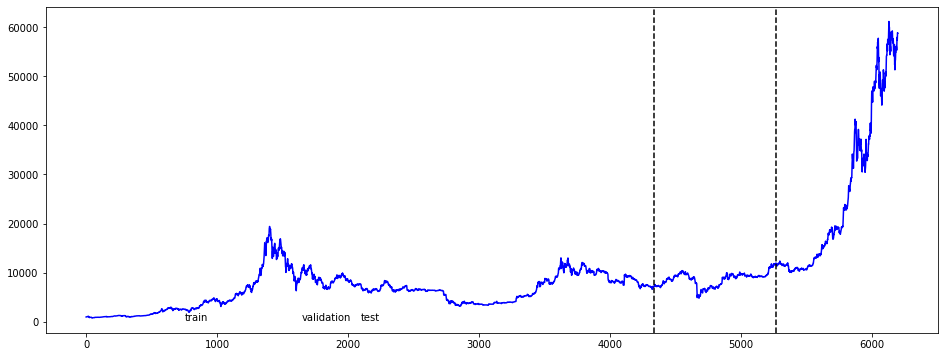

In [ ]:
all = pd.concat([train, val, test])
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(all.values,'b')
#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.axvline(x=len(train), color='black', linestyle='--')
plt.axvline(x=len(train)+len(val), color='black', linestyle='--')
if (data_name == "CO2"):
    
      x_pos = 750
      y_pos = 302
      plt.text(x_pos, y_pos, "train")
      plt.text(x_pos+900, y_pos, "validation")
      plt.text(x_pos+1350, y_pos, "test")

      plt.title('CO2 Data')
      plt.xlabel('Time')
      plt.ylabel("Value")

elif (data_name == "bitcoin"):
    
      x_pos = 750
      y_pos = 302
      plt.text(x_pos, y_pos, "train")
      plt.text(x_pos+900, y_pos, "validation")
      plt.text(x_pos+1350, y_pos, "test")

elif (data_name == "sinus"):
    
      x_pos = 1250
      y_pos = -3.8
      plt.text(x_pos, y_pos, "train")
      plt.text(x_pos+1780, y_pos, "validation")
      plt.text(x_pos+2450, y_pos, "test")

      plt.title('Sinus Data')
      plt.xlabel('Time')
      plt.ylabel("Value")

#plt.legend()
plt.show()

In [ ]:
train_norm, val_norm, test_norm = train_test_split(data_norm, 0.15, 0.15, 0)
train_norm_df = pd.DataFrame(train_norm)
train_norm_df.columns = ["Data"]

6200
4340
930
930


### 1. L-Moments

In [ ]:
def comb(n, k):
    k = min(k, n-k)
    num = reduce(op.mul, range(n, n-k, -1), 1)
    den = reduce(op.mul, range(1, k+1), 1)
    return num // den 

def pwm(seq, r):

      total = 0;
      n = len(seq)
      for i in range(n):

          total = (comb(n-i+1, r) * seq[i] / comb(n-1, r)) + total 
          #if i % 50 == 0:

      return total/n

def L1(seq):

      return pwm(seq, 0)

def L2(seq):

      return pwm(seq, 0) - 2 * pwm(seq, 1) 

def L3(seq):

      return pwm(seq, 0) - 6 * pwm(seq, 1) + 6 * pwm(seq, 2)

def L4(seq):

      return pwm(seq, 0) - 12 * pwm(seq, 1) + 30 * pwm(seq, 2) - 20 * pwm(seq, 3)

def L_skew(seq):

      return L3(seq)/L2(seq)

def L_kurt(seq):

      return L4(seq)/L2(seq)

def T3(shp):

    return (1+shp)/(3-shp)

def T4(shp):

    return T3(shp) * (1+5*T3(shp)) / (5+T3(shp))

In [ ]:
def L_sel(data, p1, p2, n, shp):

    L3_all = []
    L4_all = []
    dist_all_u1 = []
    dist_all_u2 = []
    p1_start = p1
    p2_start = p2

    for i in range(n):

        p1 = p1 - 0.01 
        p2 = p2 - 0.01 
        u1 = min(data["diff"].nlargest(int(round(len(data["diff"])*p1))));u1
        u2 = max(data["diff"].nsmallest(int(round(len(data["diff"])*p2))));u2
        '''data.loc[data["diff"] > u1, "extreme"] = int(1) #= davasına bir bak
        data.loc[data["diff"] <= u1, "extreme"] = int(0)
        data.loc[data["diff"] < u2, "extreme"] = int(-1)
        data.loc[data["extreme"] == 1, "d1"] = data["diff"] - u1
        data.loc[data["extreme"] == -1, "d2"] = u2 - data["diff"]'''
        
        #print(u1, u2)

        data.loc[:, "extreme1"] = float(0)
        data.loc[data["diff"] > u1, "extreme1"] = float(1)
        data.loc[:, "extreme2"] = float(0)        
        data.loc[data["diff"] < u2, "extreme2"] = float(-1)
        
        data.loc[data["extreme1"] == 1, "d1"] = data["diff"] - u1
        data.loc[data["extreme2"] == -1, "d2"] = u2 - data["diff"]
        
        d1 = np.round(data.sort_values(by=["d1"], ascending=True)["d1"].values,6) #data above threshold
        d1 = d1[np.logical_not(np.isnan(d1))]
        d1 = d1[d1 != 0]
        
        dist_d1 = math.sqrt(((L3(d1)-T3(shp)) ** 2) + ((L4(d1)-T4(shp)) ** 2))

        d2 = np.round(data.sort_values(by=["d2"], ascending=True)["d2"].values,6) 
        d2 = d2[np.logical_not(np.isnan(d2))]
        d2 = d2[d2 != 0]
        #print(d2)
        dist_d2 = math.sqrt(((L3(d2)-T3(shp)) ** 2) + ((L4(d2)-T4(shp)) ** 2))

        L3_all.append(L3(d1))
        L4_all.append(L4(d1))
        dist_all_u1.append(dist_d1)
        dist_all_u2.append(dist_d2)

        del data['d1']
        del data['d2']
        del data['extreme1']
        del data['extreme2']
    
    p1 = round(p1_start - (0.01 * int(np.argmin(dist_all_u1)+1)), 2)
    p2 = round(p2_start - (0.01 * int(np.argmin(dist_all_u2)+1)), 2)

    #r = 20
    #p1 = round(1 - p1_start + (0.01 * int(r)),2)
    #p2 = round(1 - p2_start + (0.01 * int(r)),2)
    p1 = 0.15
    p2 = 0.15
    u1 = round(min(data["diff"].nlargest(int(round(len(data["diff"])*p1)))),6);u1
    u2 = round(max(data["diff"].nsmallest(int(round(len(data["diff"])*p2)))),6);u2
    
    return (u1, u2, p1, p2)

In [ ]:
def L_moments(df1, p1, p2, n, shp):

      '''time = DataFrame(df1.values)
      df1 = concat([time, time.shift(1), ], axis=1)
      df1.columns = ["time", "lag1"]
      df1["diff"]= df1["time"] - df1["lag1"] ''' 

      df1.columns = ["diff"]

      result = L_sel(df1, p1, p2, n, shp)
      L_mom_u1 = result[0]
      L_mom_u2 = result[1]
      L_mom_p1 = result[2]
      L_mom_p2 = result[3]

      
      print(L_mom_u1, L_mom_u2)
      print(L_mom_p1, L_mom_p2) 

      return (L_mom_u1, L_mom_u2, L_mom_p1, L_mom_p2)

In [ ]:
p = 1.0; p1 = p; p2 = p; n = int((0.99-(1-p2))/0.01); 
shp = -0.5
opt = L_moments(train_norm_df, p1, p2, n, shp)
L_u1_opt = opt[0]
L_u2_opt = opt[1]

74.059189 -67.219225
0.15 0.15


In [ ]:
shp = -0.5
shp1 = -0.5
shp2 = -0.5

In [ ]:
#shp = -0.5

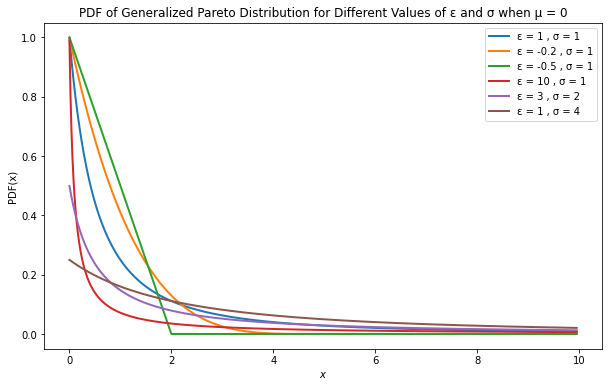

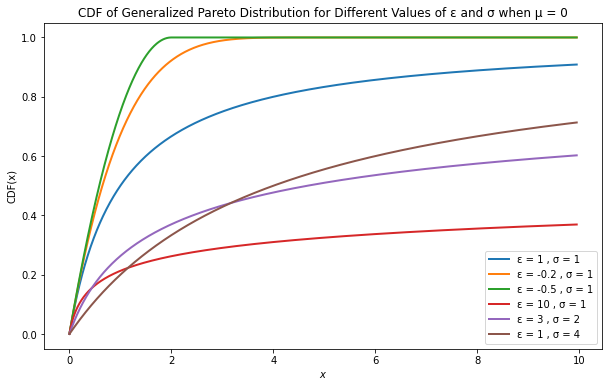

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(genpareto.ppf(0.001, 0.1),
                genpareto.ppf(0.999, 0.1), 1000)

cc = [1, -0.2, -0.5, 10, 3, 1]  #shape
ss = [1, 1, 1, 1, 2, 4]  #scale
for i in range(len(cc)):

    ax.plot(x, genpareto.pdf(x, cc[i], 0, ss[i]), lw=2,  label='\u03B5 = '+str(cc[i])+' , \u03C3 = '+str(ss[i]))

plt.legend()
plt.title('PDF of Generalized Pareto Distribution for Different Values of \u03B5 and \u03C3 when \u03BC = 0')
plt.xlabel('$x$')
plt.ylabel("PDF(x)")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(cc)):

    ax.plot(x, genpareto.cdf(x, cc[i], 0, ss[i]), lw=2,  label='\u03B5 = '+str(cc[i])+' , \u03C3 = '+str(ss[i]))

plt.legend()
plt.title('CDF of Generalized Pareto Distribution for Different Values of \u03B5 and \u03C3 when \u03BC = 0')
plt.xlabel('$x$')
plt.ylabel("CDF(x)")
plt.show()

findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


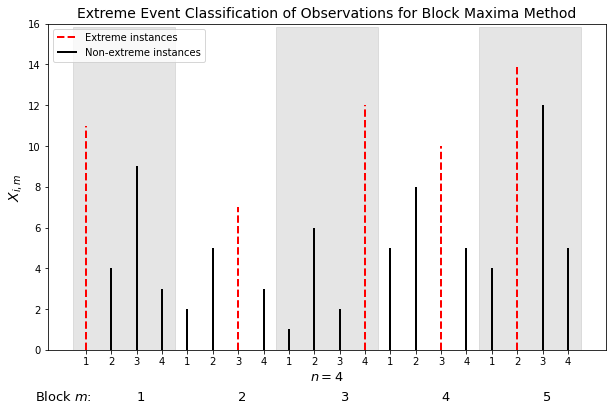

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xticks(np.arange(1, 21, 1))
ax.set_xticklabels([1, 2, 3, 4,1, 2, 3, 4,1, 2, 3, 4,1, 2, 3, 4,1, 2, 3, 4])
ax.set_yticks(np.arange(0, 21, 2))
plt.ylim([0, 16])
plt.vlines(x=[1, 7, 12, 15, 18], ymin=np.zeros(5), ymax=[11, 7, 12, 10, 14], colors='red', ls='--', lw=2, label='Extreme instances')
plt.vlines(x=np.arange(1,21,1), ymin=np.zeros(20), ymax=[0, 4, 9, 3, 2,5,0,3,1,6,2,0,5,8,0,5,4,0,12,5], colors='black', ls='-', lw=2, label='Non-extreme instances')
ax.axvspan(0.5, 4.5, ymin=0, ymax=0.99, alpha=0.2, color='gray')
ax.axvspan(8.5, 12.5, ymin=0, ymax=0.99, alpha=0.2, color='gray')
ax.axvspan(16.5, 20.5, ymin=0, ymax=0.99, alpha=0.2, color='gray')
plt.legend(loc="upper left")
plt.title('Extreme Event Classification of Observations for Block Maxima Method', fontsize=14)
plt.xlabel('$n = 4$', fontsize=13)
plt.ylabel("$X_{i,m}$", fontsize=14)
x_pos = -1.0
y_pos = -2.5
plt.text(x_pos, y_pos, "Block $m$:", fontsize=13)
plt.text(x_pos+4, y_pos, "1", fontsize=13)
plt.text(x_pos+8, y_pos, "2", fontsize=13)
plt.text(x_pos+12, y_pos, "3", fontsize=13)
plt.text(x_pos+16, y_pos, "4", fontsize=13)
plt.text(x_pos+20, y_pos, "5", fontsize=13)
plt.show()

findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


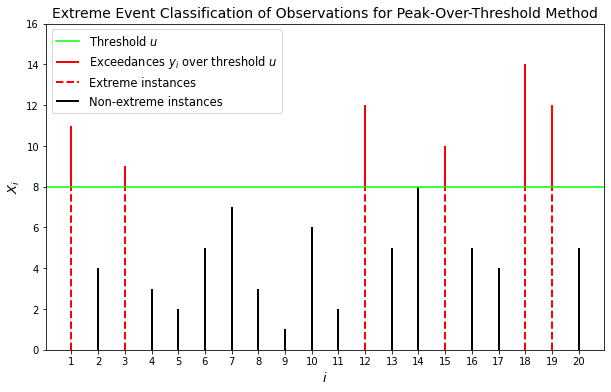

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xticks(np.arange(1, 21, 1))
ax.set_yticks(np.arange(0, 21, 2))
plt.ylim([0, 16])

plt.vlines(x=[1, 3, 12, 15, 18, 19], ymin=[8, 8, 8, 8, 8, 8], ymax=[11, 9, 12, 10, 14, 12], colors='red', ls='-', lw=2, label='Exceedances $y_{i}$ over threshold $u$')
plt.vlines(x=[1, 3, 12, 15, 18, 19], ymin=np.zeros(5), ymax=[8, 8, 8, 8, 8, 8], colors='red', ls='--', lw=2, label='Extreme instances')
plt.vlines(x=np.arange(1,21,1), ymin=np.zeros(20), ymax=[0, 4, 0, 3, 2,5,7,3,1,6,2,0,5,8,0,5,4,0,0,5], colors='black', ls='-', lw=2, label='Non-extreme instances')
plt.axhline(y=8, color='lime', linestyle='-', label="Threshold $u$")
plt.legend(loc="upper left", fontsize=11.5)
plt.title('Extreme Event Classification of Observations for Peak-Over-Threshold Method', fontsize=14)
plt.xlabel('$i$', fontsize=13)
plt.ylabel("$X_{i}$", fontsize=13)
plt.show()

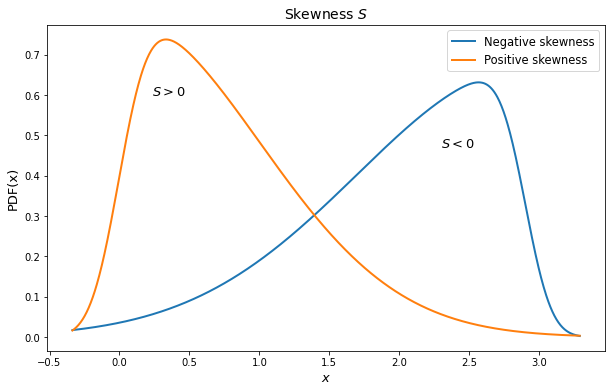

In [ ]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(figsize=(10, 6))
a = 6
x = np.linspace(skewnorm.ppf(0.001, a),
                skewnorm.ppf(0.999, a), 1000)

rv = skewnorm(a)
rv2 = skewnorm(-8, 2.9, 1.2)
plt.title('Skewness $S$', fontsize=14)
ax.plot(x, rv2.pdf(x), lw=2, label='Negative skewness')
x_pos = 2.3
y_pos = 0.47
plt.text(x_pos, y_pos, "$S < 0$", fontsize=13)
ax.plot(x, rv.pdf(x), lw=2, label='Positive skewness')
x_pos = 0.23
y_pos = 0.6
plt.text(x_pos, y_pos, "$S > 0$", fontsize=13)
plt.legend(fontsize=11.5)
plt.xlabel('$x$', fontsize=13)
plt.ylabel("PDF(x)", fontsize=13)
plt.show()

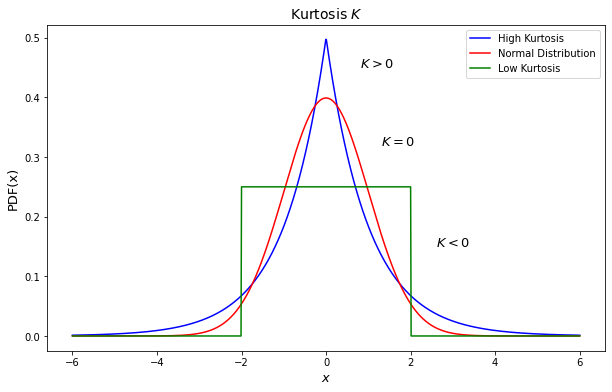

In [ ]:
from scipy.stats import norm, kurtosis
import scipy.stats as stats
from scipy.stats import norm

fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(-6, 6, 1000)

plt.title('Kurtosis $K$', fontsize=14)
distnames = ['laplace', 'norm', 'uniform']
dist = getattr(stats, 'laplace')
data = dist.rvs(size=1000)
kur = kurtosis(data, fisher=True)
  
y = dist.pdf(x)
ax.plot(x, y,   color='blue',label='High Kurtosis')
dist = getattr(stats, 'norm')  
y = dist.pdf(x)
ax.plot(x, y,  color='r', label='Normal Distribution')
dist = getattr(stats, 'uniform')(loc=-2, scale=4)
y = dist.pdf(x)
ax.plot(x, y, color='green', label='Low Kurtosis')
ax.legend()
x_pos = 0.8
y_pos = 0.45
plt.text(x_pos, y_pos, "$K > 0$", fontsize=13)
plt.text(x_pos+0.5, y_pos-0.13, "$K = 0$", fontsize=13)
plt.text(x_pos+1.8, y_pos-0.3, "$K < 0$", fontsize=13)
plt.xlabel('$x$', fontsize=13)
plt.ylabel("PDF(x)", fontsize=13)
plt.show()

Text(0, 0.5, 'Value')

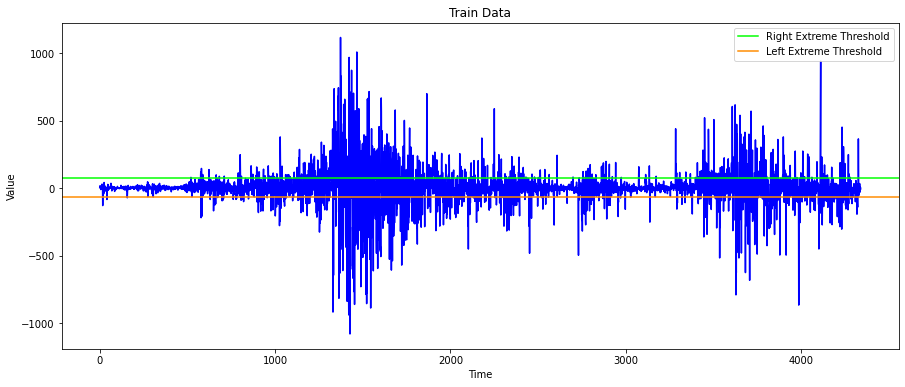

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(train_norm,'b')
plt.axhline(y=L_u1_opt, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
plt.axhline(y=L_u2_opt, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.legend()
plt.title('Train Data')
plt.xlabel('Time')
plt.ylabel("Value")

Text(0, 0.5, 'Value')

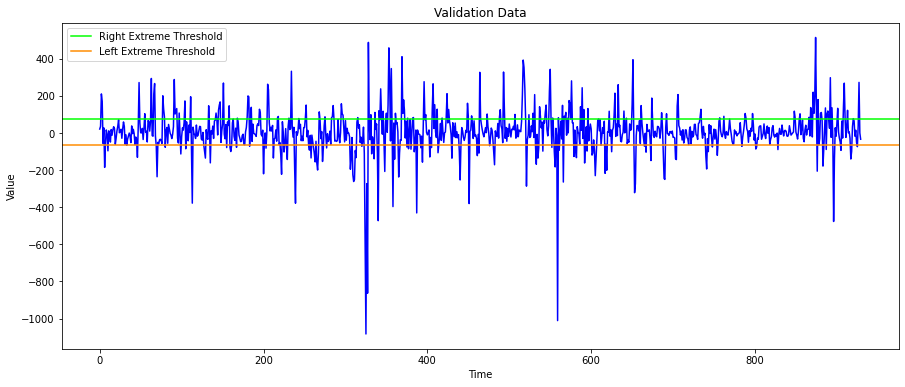

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(val_norm,'b')
plt.axhline(y=L_u1_opt, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
plt.axhline(y=L_u2_opt, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.legend()
plt.title('Validation Data')
#plt.title('Time Series')
plt.xlabel('Time')
plt.ylabel("Value")

Text(0, 0.5, 'Value')

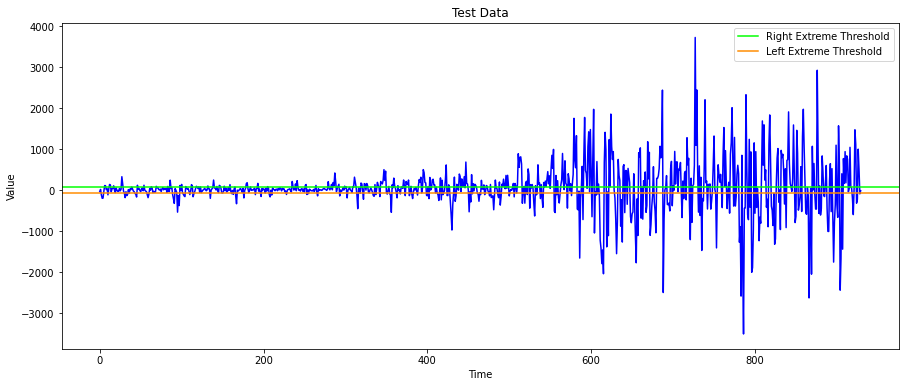

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(test_norm,'b')
plt.axhline(y=L_u1_opt, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
plt.axhline(y=L_u2_opt, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.legend()
plt.title('Test Data')
plt.xlabel('Time')
plt.ylabel("Value")

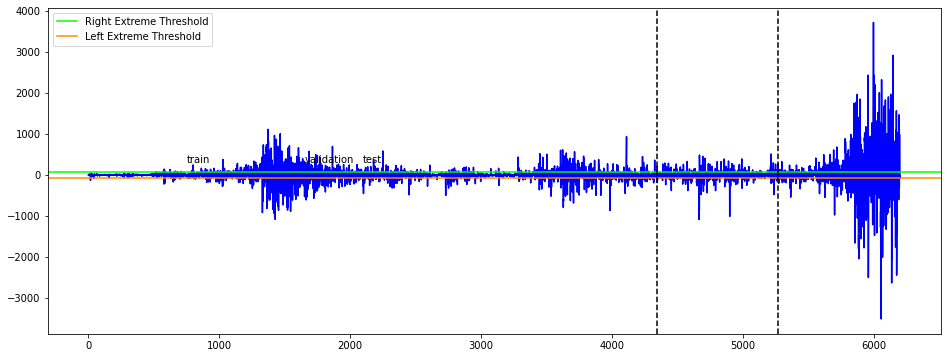

In [ ]:
all_norm = np.concatenate((train_norm, val_norm, test_norm) , axis=None)
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(all_norm,'b')
plt.axhline(y=L_u1_opt, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
plt.axhline(y=L_u2_opt, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.axvline(x=len(train_norm), color='black', linestyle='--')
plt.axvline(x=len(train_norm)+len(val_norm), color='black', linestyle='--')

if (data_name == "CO2"):
    
      x_pos = 750
      y_pos = -2.9
      plt.text(x_pos, y_pos, "train")
      plt.text(x_pos+900, y_pos, "validation")
      plt.text(x_pos+1350, y_pos, "test")

      plt.title('CO2 Differenced Data')
      plt.xlabel('Time')
      plt.ylabel("Value")

elif (data_name == "bitcoin"):
    
      x_pos = 750
      y_pos = 302
      plt.text(x_pos, y_pos, "train")
      plt.text(x_pos+900, y_pos, "validation")
      plt.text(x_pos+1350, y_pos, "test")

elif (data_name == "sinus"):
    
      x_pos = 1250
      y_pos = -3.8
      plt.text(x_pos, y_pos, "train")
      plt.text(x_pos+1780, y_pos, "validation")
      plt.text(x_pos+2450, y_pos, "test")

      plt.title('Sinus Data')
      plt.xlabel('Time')
      plt.ylabel("Value")

plt.legend()
plt.show()

In [ ]:
#Augmented Dickey - Fueller Test
from statsmodels.tsa.stattools import adfuller
#result = adfuller(all_norm)
result = adfuller(all.values.reshape(1, -1)[0])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.373437
p-value: 1.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

train_norm_scaled = scaler.fit_transform(train_norm.reshape(-1, 1))
#train_norm_scaled = torch.FloatTensor(train_norm_scaled).view(-1)
val_norm_scaled = scaler.transform(val_norm.reshape(-1, 1))
#val_norm_scaled = torch.FloatTensor(val_norm_scaled).view(-1)
test_norm_scaled = scaler.transform(test_norm.reshape(-1, 1))
#test_norm_scaled = torch.FloatTensor(test_norm_scaled).view(-1)

In [ ]:
train_norm_scaled_df = pd.DataFrame(train_norm_scaled)
train_norm_scaled_df.columns = ["Data"]
val_norm_scaled_df = pd.DataFrame(val_norm_scaled)
val_norm_scaled_df.columns = ["Data"]
test_norm_scaled_df = pd.DataFrame(test_norm_scaled)
test_norm_scaled_df.columns = ["Data"]

In [ ]:
L_u1 = round(min(train_norm_scaled_df["Data"].nlargest(int(round(len(train_norm_scaled_df["Data"])*opt[2])))),2) 
L_u2 = round(max(train_norm_scaled_df["Data"].nsmallest(int(round(len(train_norm_scaled_df["Data"])*opt[3])))),2)
print(L_u1, L_u2)

0.05 -0.08


Text(0, 0.5, 'Value')

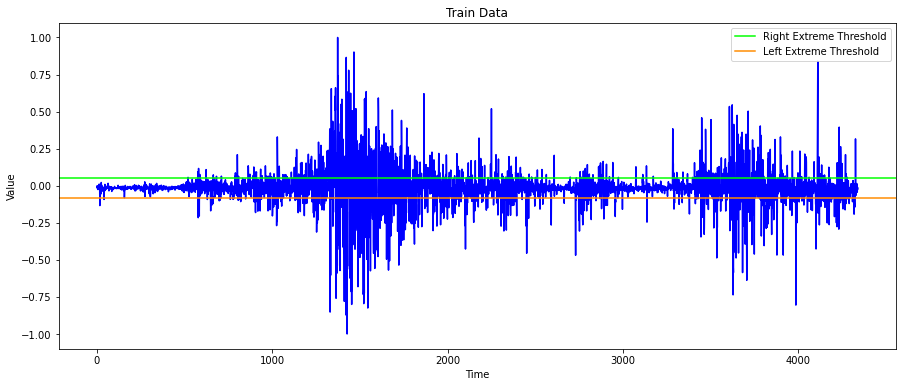

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(train_norm_scaled,'b')
plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.legend()
plt.title('Train Data')
plt.xlabel('Time')
plt.ylabel("Value")

Text(0, 0.5, 'Value')

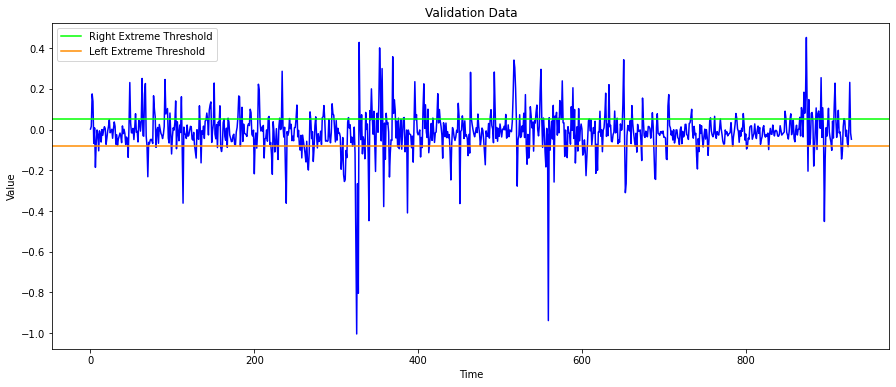

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(val_norm_scaled,'b')
plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.legend()
plt.title('Validation Data')
plt.xlabel('Time')
plt.ylabel("Value")

Text(0, 0.5, 'Value')

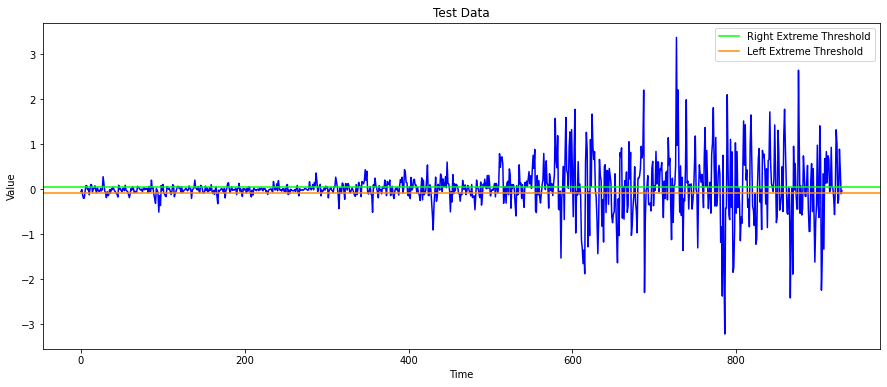

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(test_norm_scaled,'b')
plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.legend()
plt.title('Test Data')
plt.xlabel('Time')
plt.ylabel("Value")

In [ ]:
all_norm_scaled = np.concatenate((train_norm_scaled, val_norm_scaled, test_norm_scaled) , axis=None)
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(all_norm_scaled,'b')
plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.axvline(x=len(train_norm_scaled), color='black', linestyle='--')
plt.axvline(x=len(train_norm_scaled)+len(val_norm_scaled), color='black', linestyle='--')
if (data_name == "CO2"):
    
      x_pos = 750
      y_pos = -1.3
      plt.text(x_pos, y_pos, "train")
      plt.text(x_pos+900, y_pos, "validation")
      plt.text(x_pos+1350, y_pos, "test")

      plt.title('CO2 Scaled Data')
      plt.xlabel('Time')
      plt.ylabel("Value")

elif (data_name == "bitcoin"):
    
      x_pos = 750
      y_pos = 302
      plt.text(x_pos, y_pos, "train")
      plt.text(x_pos+900, y_pos, "validation")
      plt.text(x_pos+1350, y_pos, "test")

      plt.title('Bitcoin Scaled Data')
      plt.xlabel('Time')
      plt.ylabel("Value")

elif (data_name == "sinus"):
    
      x_pos = 1250
      y_pos = -1.4
      plt.text(x_pos, y_pos, "train")
      plt.text(x_pos+1780, y_pos, "validation")
      plt.text(x_pos+2450, y_pos, "test")

      plt.title('Sinus Scaled Data')
      plt.xlabel('Time')
      plt.ylabel("Value")

plt.legend()
plt.show()

In [ ]:
def extreme_labeling(input_data, tw, u1, u2, version):
    extreme = []
    L = len(input_data)

    if (version == 1):

        for i in range(L-tw):
            train_seq = input_data[i:i+tw]
            train_label = input_data[i+tw:i+tw+1]
            train_label1 = torch.tensor([0.])
            train_label2 = torch.tensor([0.])
            if (train_label>u1):
                train_label1 = torch.tensor([1.])
                train_label3 = torch.tensor([1.])
            elif (train_label<u2):
                train_label3 = torch.tensor([-1.])
                train_label2 = torch.tensor([-1.])
            else:
                train_label3 = torch.tensor([0.])

            extreme.append((train_seq ,train_label1, train_label2, train_label3))
        return extreme

    elif (version == 2):

        extreme_data = []
        q1 = []
        q2 = []
        q = []
        L = len(input_data)

        for i in range(L-tw):
            train_seq = input_data[i:i+tw]
            label = input_data[i+tw:i+tw+1]
            label1 = np.array([0.])
            label2 = np.array([0.])
            if (label>u1):
                label1 = np.array([1.])
                label = np.array([1.])
            elif (label<u2):
                label = np.array([-1.])
                label2 = np.array([-1.])
            else:
                label = np.array([0.])

            extreme_data.append(train_seq)
            q1.append(label1)
            q2.append(label2)
            q.append(label)

        extreme_data = np.asarray(extreme_data, dtype=np.float32)
        q1 = np.asarray(q1, dtype=np.float32)
        q2 = np.asarray(q2, dtype=np.float32)
        q = np.asarray(q, dtype=np.float32)

        return (extreme_data, q1, q2, q)







In [ ]:
tw = 60
#ew = 200
'''train_window = tw
train_extreme = extreme_labeling(train_norm_scaled, train_window, L_u2, L_u1)
val_extreme = extreme_labeling(val_norm_scaled, train_window, L_u2, L_u1)
test_extreme = extreme_labeling(test_norm_scaled, train_window, L_u2, L_u1)'''
ew = tw
all_extreme, q1_all, q2_all, q_all = extreme_labeling(all_norm_scaled, ew, L_u1, L_u2, 2)
train_extreme, q1_train, q2_train, q_train = extreme_labeling(train_norm_scaled, ew, L_u1, L_u2, 2)
val_extreme, q1_val, q2_val, q_val = extreme_labeling(val_norm_scaled, ew, L_u1, L_u2, 2)
test_extreme, q1_test, q2_test, q_test = extreme_labeling(test_norm_scaled, ew, L_u1, L_u2, 2)

In [ ]:
def extreme_data(data, u1, u2, version):

        n = len(data)
        q = np.zeros((n,), dtype=float)
        if (version == 1):

            q[data>u1] = 1.
            q[data<u2] = -1.

        elif (version == 2.):

            q[data>u1] = 1.

        return q

In [ ]:
q_all_data = extreme_data(all_norm_scaled.reshape(-1), L_u1, L_u2, 1)
q_train_data = extreme_data(train_norm_scaled.reshape(-1), L_u1, L_u2, 1)
q_val_data = extreme_data(val_norm_scaled.reshape(-1), L_u1, L_u2, 1)
q_test_data = extreme_data(test_norm_scaled.reshape(-1), L_u1, L_u2, 1)

In [ ]:
n1 = sum((q_train_data == 0) * 1).item()
n2 = sum((q_train_data == 1) * 1).item()
n3 = sum((q_train_data == -1) * 1).item()
print(n1)
print(n2)
print(n3)

3038
658
644


In [ ]:
B0 = round((n1 + n3) / (n1 + n2 + n3), 2)
B1 = round((n2) / (n1 + n2 + n3), 2)
B2 = round((n1 + n2) / (n1 + n2 + n3), 2)
B3 = round((n3) / (n1 + n2 + n3), 2)
eta = -(1/shp)
eta1 = -(1/shp1)
eta2 = -(1/shp2)
print(B0, B1 , B2 , B3, eta, eta1, eta2)

0.85 0.15 0.85 0.15 2.0 2.0 2.0


In [ ]:
def create_data(input_data, extreme_data, dw, ew, version):
    
    inout_seq = []
    
    if (version == 1):

        if (extreme_data == ""):

            L = len(input_data)
            for i in range(L-dw):
                train_seq = input_data[i:i+dw]
                train_label = input_data[i+dw:i+dw+1]
        
                inout_seq.append((train_seq ,train_label))

        elif (input_data == ""):

            L = len(extreme_data)
            for i in range(L-ew):
                extreme_seq = extreme_data[i:i+ew]
                extreme_label = extreme_data[i+ew:i+ew+1]
        
                inout_seq.append((extreme_seq, extreme_label))
        
        else:
            
            inout_seq_data = []
            extreme_seq_data = []
            inout_seq_ext1 = []
            inout_seq_ext2 = []
            inout_seq_ext = []
            L = len(input_data)
            for i in range(L-dw):
                train_seq = input_data[i:i+dw]
                train_label = input_data[i+dw:i+dw+1]
                inout_seq_data.append((train_seq ,train_label))

            #for i in range(L-ew):
                extreme_seq = input_data[i:i+ew]
                extreme_label = extreme_data[i+ew:i+ew+1]

                q1 = torch.clamp(extreme_label,min=0)
                q2 = torch.clamp(extreme_label,max=0)
          
                inout_seq.append((train_seq ,train_label, q1, q2, extreme_label))

        return inout_seq


    elif (version==2):

        if (extreme_data == ""):

            L = len(input_data)
            for i in range(L-dw):
                train_seq = input_data[i:i+dw]
                train_label = input_data[i+dw:i+dw+1]
        
                inout_seq.append((train_seq ,train_label))

        elif (input_data == ""):

            L = len(extreme_data)
            for i in range(L-ew):
                extreme_seq = extreme_data[i:i+ew]
                extreme_label = extreme_data[i+ew:i+ew+1]
        
                inout_seq.append((extreme_seq, extreme_label))
        
        else:
            
            data_seq_all = []
            data_label_all = []
            q1 = np.array([]).reshape(-1,1)
            q2 = np.array([]).reshape(-1,1)
            q = np.array([]).reshape(-1,1)
            '''q1 = []
            q2 = []
            q = []'''

            L = len(input_data)
            for i in range(L-dw):
                data_seq = input_data[i:i+dw]
                data_label = input_data[i+dw:i+dw+1]
                data_seq_all.append(data_seq)
                data_label_all.append(data_label)

            for i in range(L-ew):
                #extreme_seq = input_data[i:i+ew]
                label = extreme_data[(i+ew):(i+ew+1)]
                label1 = np.where(label == -1. ,0., label)
                label2 = np.where(label == 1. ,0., label)

                #print(q1)
                #print(label1)

                q1 = np.vstack([q1, label1])
                q2 = np.vstack([q2, label2])
                q = np.vstack([q, label])
                #q1.append(label1)
                #q2.append(label2)
                #q.append(label)

        data_seq_all = np.asarray(data_seq_all)
        data_label_all = np.asarray(data_label_all).reshape(-1,1)
        q1 = np.asarray(q1, dtype=np.float32).reshape(-1,1)
        q2 = np.asarray(q2, dtype=np.float32).reshape(-1,1)
        q = np.asarray(q, dtype=np.float32).reshape(-1,1)
                
                #inout_seq.append((train_seq ,train_label, q1, q2, extreme_label))

        
        return data_seq_all, data_label_all, q1, q2, q
            
    

In [ ]:
ew = tw
all_data, all_label, all_q1, all_q2, all_q = create_data(all_norm_scaled, q_all_data, tw, ew, 2)
train_data, train_label, train_q1, train_q2, train_q = create_data(train_norm_scaled, q_train_data, tw, ew, 2)
val_data, val_label, val_q1, val_q2, val_q = create_data(np.concatenate((train_norm_scaled[-tw:], val_norm_scaled), 0), np.concatenate((q_train_data[-tw:], q_val_data), 0), tw, ew, 2)
test_data, test_label, test_q1, test_q2, test_q = create_data(np.concatenate((val_norm_scaled[-tw:], test_norm_scaled), 0), np.concatenate((q_val_data[-tw:], q_test_data), 0), tw, ew, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [ ]:
batch_size = len(train_data)
batch_size = 1
train_input = TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_label), torch.from_numpy(train_q1), torch.from_numpy(train_q2), torch.from_numpy(train_q))
train_loader = DataLoader(train_input, shuffle=False, batch_size=batch_size, drop_last=True)
val_input = TensorDataset(torch.from_numpy(val_data), torch.from_numpy(val_label), torch.from_numpy(val_q1), torch.from_numpy(val_q2), torch.from_numpy(val_q))
val_loader = DataLoader(val_input, shuffle=False, batch_size=batch_size, drop_last=True)
test_input = TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_label), torch.from_numpy(test_q1), torch.from_numpy(test_q2), torch.from_numpy(test_q))
test_loader = DataLoader(test_input, shuffle=False, batch_size=batch_size, drop_last=True)

In [ ]:
#len(next(iter(train_loader))[4])

In [ ]:
M = 80
#H = 100
index = random.sample(range(len(train_extreme)), M)
ext_train_input = TensorDataset(torch.from_numpy(np.asarray(itemgetter(*index)(train_extreme))), torch.from_numpy(np.asarray(itemgetter(*index)(q1_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q2_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q_train))))
ext_train_loader = DataLoader(ext_train_input, shuffle=False, batch_size=1, drop_last=True)

'''ext_val_input = TensorDataset(torch.from_numpy(val_extreme), torch.from_numpy(q1_val), torch.from_numpy(q2_val), torch.from_numpy(q_val))
ext_val_loader = DataLoader(itemgetter(*index)(ext_val_input), shuffle=True, batch_size=batch_size, drop_last=True)

ext_test_input = TensorDataset(torch.from_numpy(test_extreme), torch.from_numpy(q1_test), torch.from_numpy(q2_test), torch.from_numpy(q_test))
ext_test_loader = DataLoader(itemgetter(*index)(ext_test_input), shuffle=True, batch_size=batch_size, drop_last=True)'''

'ext_val_input = TensorDataset(torch.from_numpy(val_extreme), torch.from_numpy(q1_val), torch.from_numpy(q2_val), torch.from_numpy(q_val))\next_val_loader = DataLoader(itemgetter(*index)(ext_val_input), shuffle=True, batch_size=batch_size, drop_last=True)\n\next_test_input = TensorDataset(torch.from_numpy(test_extreme), torch.from_numpy(q1_test), torch.from_numpy(q2_test), torch.from_numpy(q_test))\next_test_loader = DataLoader(itemgetter(*index)(ext_test_input), shuffle=True, batch_size=batch_size, drop_last=True)'

In [ ]:
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:
def model_save(model, optimizer, model_name, epoch, train_loss, val_loss, path):
        
        model_path = "results/" + data_name + "/"  + path + "/" + model_name + ".pt"
        torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'train_loss': train_loss,
                    'val_loss': val_loss,
                    }, model_path)
        
def model_save2(model, optimizer, model_name, epoch, train_loss, val_loss, b1, b2, y_pred_all, path):
        
        model_path = "results/" + data_name + "/" + path + "/" + model_name + ".pt"
        torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'train_loss': train_loss,
                    'val_loss': val_loss,
                    'b1': b1,
                    'b2': b2,
                    'y_pred_all': y_pred_all
                    }, model_path)

def model_save3(model, optimizer, model_name, epoch, train_loss, val_loss, b, y_pred_all, path):
        
        model_path = "results/" + data_name + "/" + path + "/" + model_name + ".pt"
        torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'train_loss': train_loss,
                    'val_loss': val_loss,
                    'b': b,
                    'y_pred_all': y_pred_all
                    }, model_path)

def model_load(model_name, model, optimizer, path):

        checkpoint = torch.load("results/" + data_name + "/" + path + "/" + model_name + ".pt")
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        train_loss = checkpoint['train_loss']
        val_loss = checkpoint['val_loss']

        return model, train_loss, val_loss 

def model_load2(model_name, model, optimizer, path):

        device = torch.device('cuda')
        checkpoint = torch.load("results/" + data_name + "/" + path + "/" + model_name + ".pt", map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        train_loss = checkpoint['train_loss']
        val_loss = checkpoint['val_loss']
        b1 = checkpoint['b1']
        b2 = checkpoint['b2']
        y_pred_all = checkpoint['y_pred_all']

        return model, train_loss, val_loss, b1, b2, y_pred_all 

def model_load3(model_name, model, optimizer, path):

        device = torch.device('cuda')
        checkpoint = torch.load("results/" + data_name + "/" + path + "/" + model_name + ".pt", map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        train_loss = checkpoint['train_loss']
        val_loss = checkpoint['val_loss']
        b = checkpoint['b']
        y_pred_all = checkpoint['y_pred_all']

        return model, train_loss, val_loss, b, y_pred_all 

def save_losses(a, b, file_name, path):

    loss_all = [a,b]
    with open("results/" + data_name + "/" + path + "/" + file_name + ".txt", "wb") as fp:   #Pickling
        pickle.dump(loss_all, fp)

def load_losses(file_name, path):

    with open("results/" + data_name + "/" + path + "/" + file_name + ".txt", "rb") as fp:   #Pickling
        
        loss_all = pickle.load(fp)
    
    return loss_all

def model_save_hidden(model, optimizer, model_name, path, index):
        
        model_path = "results/" + data_name + "/" + path + "/" + model_name + ".pt"
        torch.save({
                    'index': index,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    }, model_path)

def model_load_hidden(model, optimizer, model_name, path):
        
        device = torch.device('cuda')
        checkpoint = torch.load("results/" + data_name + "/" + path + "/" + model_name + ".pt", map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        index = checkpoint['index']

        return model, index 
        
def save_hidden(index, S1, S2, file_name, path):

    loss_all = [index, S1, S2]
    with open("results/" + data_name + "/" + path + "/" + file_name + ".txt", "wb") as fp:   #Pickling
        pickle.dump(loss_all, fp)

def save_hidden2(index, S1, S2, q1, q2, q, file_name, path):

    param_all = [index, S1, S2, q1, q2, q]
    with open("results/" + data_name + "/" + path + "/" + file_name + ".txt", "wb") as fp:   #Pickling
        pickle.dump(param_all, fp)

def load_hidden(file_name, path):

     with open("results/" + data_name + "/" + path + "/" + file_name + ".txt", "rb") as fp:   #Pickling
        
        param_all = pickle.load(fp)
    
     return param_all

def RMSE(pred,y):

    pred = np.array(pred).reshape(1, -1)
    y = np.array(y).reshape(1, -1)

    return np.sqrt(np.mean((pred-y)**2))


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(LSTMNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        out, h = self.lstm(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

class CE(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(CE, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
        '''out = nn.Sigmoid()(out)
        out2 = torch.tensor(1.-out , requires_grad=True)
        input = torch.tensor(torch.cat((out2, out), 1) , requires_grad=True)'''
        #print(input)
        #input = torch.tensor([[torch.log(1-out), torch.log(out)]], requires_grad=True)
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

class EVL(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(EVL, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.sm2 = nn.Softmax(dim=1)
        
    def forward(self, x, h, version):
        out, h = self.gru(x, h)
        
        #print(ou)
        #print(h)
        #print(ou.size())
        ou = out[:,-1]
        out = self.fc(self.relu(ou))
        '''out = nn.Sigmoid()(out)
        out2 = torch.tensor(1.-out , requires_grad=True)
        input = torch.tensor(torch.cat((out2, out), 1) , requires_grad=True)'''
        if (version == 1):

              k = self.sm2(out)[:,1]

        elif (version == 2):   

              k = -self.sm2(out)[:,0]

        #print(input)
        #input = torch.tensor([[torch.log(1-out), torch.log(out)]], requires_grad=True)
        return k, out, h, ou
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

class EVL11(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(EVL11, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.sm2 = nn.Softmax(dim=1)
        
    def forward(self, x, h):
        out, h = self.gru(x, h)
        #print(ou)
        #print(h)
        #print(ou.size())
        ou = out[:,-1]
        out = self.fc(self.relu(ou))

        k = self.sm2(out)[:,1]

        #print(input)
        #input = torch.tensor([[torch.log(1-out), torch.log(out)]], requires_grad=True)
        return k, out, h, ou
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

class EVL22(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(EVL22, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.sm2 = nn.Softmax(dim=1)
        
    def forward(self, x, h):
        out, h = self.gru(x, h)
        #print(ou)
        #print(h)
        #print(ou.size())
        ou = out[:,-1]
        out = self.fc(self.relu(ou))

        k = -self.sm2(out)[:,0]

        #print(input)
        #input = torch.tensor([[torch.log(1-out), torch.log(out)]], requires_grad=True)
        return k, out, h, ou
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

class EVLE(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(EVLE, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(50, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.sm2 = nn.Softmax(dim=1)
        self.emb = nn.Embedding(1, 256)
        
    def forward(self, x, h, version):
               
        embed = self.emb(x.view(50,1).type(torch.LongTensor))
        #print(x.view(50,1).size())
        #embed = embed.view(1, 256, 1)
        #print(embed.size())
        #print(h.size())
        out, h = self.gru(embed.view(1, 256, 50), h)
        out = self.fc(self.relu(out[:,-1]))
        '''out = nn.Sigmoid()(out)
        out2 = torch.tensor(1.-out , requires_grad=True)
        input = torch.tensor(torch.cat((out2, out), 1) , requires_grad=True)'''
        if (version == 1):

              k = self.sm2(out)[:,1]

        elif (version == 2):   

              k = -self.sm2(out)[:,0]

        #print(input)
        #input = torch.tensor([[torch.log(1-out), torch.log(out)]], requires_grad=True)
        return k, out, h, ou
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

class CL1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(CL1, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
 
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

class CL2(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(CL2, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
 
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

class REG(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(REG, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
        
        self.gru1 = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc1 = nn.Linear(hidden_dim, 2)
        self.relu1 = nn.ReLU()
        self.sm1 = nn.Sigmoid()
        

        self.gru2 = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc2 = nn.Linear(hidden_dim, 2)
        self.relu2 = nn.ReLU()
        #self.sm2 = nn.Sigmoid()
        self.sm2 = nn.Sigmoid()

        self.conv1 = nn.Conv1d(50, 1, 1)
        self.fc1 = nn.Linear(1, 2)
        self.conv2 = nn.Conv1d(50, 1, 1)
        self.fc2 = nn.Linear(1, 2)

        self.B1 = torch.nn.Parameter(torch.FloatTensor([0.0]))
        self.B2 = torch.nn.Parameter(torch.FloatTensor([0.0]))      
        
    def forward(self, x, h, h1, h2):
        out, h = self.gru(x, h)
        p = self.fc(self.relu(out[:,-1]))

        #out1, h1 = self.gru1(x, h1)
        h1 = torch.tensor([1.])
        out1 = self.conv1(x)
        #print(out1)
        k1_input = self.fc1(self.relu1(out1[:,-1]))
        k1 = self.sm1(k1_input)[:,1]

        #out2, h2 = self.gru2(x, h2)
        h2 = torch.tensor([1.])
        out2 = self.conv2(x)
        k2_input = self.fc2(self.relu2(out2[:,-1]))
        k2 = -self.sm2(k2_input)[:,0]

        o = p + self.B1 * k1 + self.B2 * k2 

        #print(o, p)

        return o, p, h, h1, h2, k1_input, k2_input, k1, k2, self.B1, self.B2
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

class REG2(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.8):
        super(REG2, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        

        self.B1 = torch.nn.Parameter(torch.FloatTensor([0.0]))
        self.B2 = torch.nn.Parameter(torch.FloatTensor([0.0]))      
        
    def forward(self, x, h, k1, k2):
        out, h = self.gru(x, h)
        #p = self.fc(self.relu(out[:,-1]))
        p = self.fc(self.relu(out[:,-1]))
        o = p + self.B1 * k1 + self.B2 * k2 
        #o = self.B1 * k1 + self.B2 * k2

        #print(o, p)

        return o, p, h, self.B1, self.B2
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

class DEL(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.8):
        super(DEL, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
        self.B = torch.nn.Parameter(torch.FloatTensor([0.0]))    
        
    def forward(self, x, h, k):
        out, h = self.gru(x, h)
        #p = self.fc(self.relu(out[:,-1]))
        p = self.fc(self.relu(out[:,-1]))
        o = p + self.B * k
        #o = self.B1 * k1 + self.B2 * k2

        #print(o, p)

        return o, p, h, self.B
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

class MEM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(MEM, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        #self.sm = nn.Softmax(dim=2)
        self.sm = nn.Softmax(dim=0)
        self.sm2 = nn.Softmax(dim=0)
        #self.sm2 = nn.Softmax(dim=1)

        self.B1 = torch.nn.Parameter(torch.FloatTensor([0.0]))
        self.B2 = torch.nn.Parameter(torch.FloatTensor([0.0]))

        self.linear2 = nn.Linear(1, 2)
        self.linear3 = nn.Linear(1, 2)
        
    def forward(self, x, h, S1, S2, q1, q2):
        out, h = self.gru(x, h)

        #print(h)
        #print(S1.size())

        #hidden = self.hidden_cell.view(1, H)

        #print(h.size())
        #print(S1.size())
        #c1 = torch.matmul(h.transpose(0,1), S1.transpose(1,2))
        #c2 = torch.matmul(h.transpose(0,1), S2.transpose(1,2))

        c1 = torch.matmul(h, S1)
        c2 = torch.matmul(h, S2)
        #print(c1*torch.tensor([100]).to(device).float())
        #print(c1.size())

        #print(q1)
        '''print(q1.size())'''

        a1 = self.sm(c1*torch.tensor([1.0]).to(device).float())#*torch.tensor([100]).to(device).float())
        a2 = self.sm2(c2*torch.tensor([1.0]).to(device).float())#*torch.tensor([100]).to(device).float())

        #print(torch.sum(a1, dim=0))
  

        #print(torch.cat((a1.T, q1), dim=0))

        p = self.fc(self.relu(out[:,-1]))

        #print(p.size())
        #print(a1.size())
        #print(q1.size())
        #print(torch.mul(a1, q1).size())

        k1 = torch.sum(torch.mul(a1.T, q1) , dim=2) 
        k2 = torch.sum(torch.mul(a2.T, q2) , dim=2)

        #print(k1)
        #print(k1.size())

        #k1_input = self.linear2(k1) 
        #k2_input = self.linear3(k2) 

        k1_input = torch.tensor([[torch.log(torch.tensor([1-k1])), torch.log(torch.tensor([k1]))]] ,dtype=torch.float).to(device).float()
        k2_input = torch.tensor([[torch.log(torch.tensor([-k2])), torch.log(torch.tensor([1+k2]))]],dtype=torch.float).to(device).float()

        #print(k1_input)
        #print(k1_input.size())
        
        #print(self.sm2(k1_input).size())

        #k12 = self.sm2(k1_input)[:,1]
        #k22 = -self.sm2(k2_input)[:,0]
        
        #p = predictions[-1].view(1, self.output_size)

        o = p + self.B1.to(device) * k1.view(-1,1) + self.B2.to(device) * k2.view(-1,1)
        #o = p + b1 * k1.view(-1,1) + b2 * k2.view(-1,1) + k12.view(-1,1) + k22.view(-1,1)

        '''print("-----")
        print(o)'''

        return o, h, k1_input , k2_input, self.B1, self.B2, k1, k2
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

In [ ]:
def training2(train_loader, val_loader, learn_rate, tw, path, model_type, n, hidden_dim=256, EPOCHS=1000): 


    file_name = str(n)+ ". " + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5"  
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 1
    n_layers = 1
    # Instantiating the models
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)   
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "MEM_CE":
       
        fn = "ce_hiddens3"
        index, S1, S2, q1, q2, q = load_hidden(fn, "ce")
        
        S1 = S1.T.view(hidden_dim, -1).to(device).float()
        S2 = S2.T.view(hidden_dim, -1).to(device).float()

        b1 = torch.rand(1 , requires_grad=True).to(device).float()
        b2 = torch.rand(1 , requires_grad=True).to(device).float()

        model = MEM(input_dim, hidden_dim, output_dim, n_layers) 

    elif model_type == "MEM_EVL":
      

        b1 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()
        b2 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()

        model = REG2(input_dim, hidden_dim, output_dim, n_layers) 
    model.to(device)
  
    # Defining loss function and optimizer
    criterion = nn.MSELoss()
    CE = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    model.train()

    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    train_loss_all = []
    val_loss_all = []
    k = 0
    L2 = 1.0
    L3 = 1.0

    b1 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()
    b2 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()

    #train_loss = 0
    #val_loss = 0

    y_pred_all = []

    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = perf_counter()
        h = model.init_hidden(batch_size)
        h1 = model.init_hidden(batch_size)
        h2 = model.init_hidden(batch_size)
        avg_loss = 0.
        avg_los1 = 0.
        avg_los2 = 0.
        avg_los3 = 0.
        #avg_val_los1_all = 0.
        #avg_val_los2_all = 0.
        #avg_val_los3_all = 0.
        counter = 0

        for x, label, v1, v2, v in train_loader:

            model.train()

            counter += 1
            if model_type == "LSTM":
                h = tuple([e.data for e in h])          
            else:
                h = h.data
                h1 = h1.data
                h2 = h2.data

            model.zero_grad()
            
            if (model_type == "LSTM" or model_type == "GRU"):

                out, h = model(x.to(device).float(), h)
                loss = criterion(out, label.to(device).float())

                loss.backward()
                optimizer.step()
                avg_loss += loss.item()
                if counter%50 == 0:
                    print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6)))
                #current_time = perf_counter()
                train_loss = avg_loss/len(train_loader)

                #print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))
                #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
                
                #epoch_times.append(current_time-start_time)    
                #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
                

            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

          
                out, p, h, b1, b2 = model(x.to(device).float(), h, k1, k2)

                #print(out, p, k1_input, k2_input, k1, k2, b1, b2);

                v1 = v1.type(torch.LongTensor)
                v2 = v2.type(torch.LongTensor)

            
                if (model_type == "MEM_CE"):

                      los2 = CE(k1_input, v1.to(device).view(-1))
                      los3 = CE(k2_input, (v2+1).to(device).view(-1))

                elif (model_type == "MEM_EVL"):
                      
                      ones = torch.ones(len(k1)).to(device).float()
                      a = B1 * (torch.pow((ones - ((ones-k1)/eta1)), eta1)).view(-1,1)   
                      b = B0 * (torch.pow((ones - (k1/eta1)), eta1)).view(-1,1)
                      weights1 = torch.FloatTensor ([a, b]).to(device).float()
                      #EVL1 = nn.NLLLoss(weight = weights1)
                      EVL1 = torch.nn.CrossEntropyLoss(weight = weights1, reduction = 'none')

                      ones = torch.ones(len(k2)).to(device).float()
                      c = B3 * (torch.pow((ones - ((ones+k2)/eta2)), eta2))
                      d = B2 * (torch.pow((ones - (-k2/eta2)), eta2))
                      weights2 = torch.FloatTensor([d, c]).to(device).float()
                      #EVL2 = nn.NLLLoss(weight = weights2)
                      EVL2 = torch.nn.CrossEntropyLoss(weight = weights2, reduction = 'none')

                      los2 = EVL1(k1_input, v1.to(device).view(-1))
                      los3 = EVL2(k2_input, (v2+1).to(device).view(-1))

                los1 = criterion(out, label.to(device).float())
                los2 = L2*los2
                los3 = L3*los3
                #los1_all = los1_all + los1
                #los2_all = los2_all + L2*los2
                #los3_all = los3_all + L3*los3

                loss = los1 + los2 + los3
                #loss = los2

                loss.backward()
                optimizer.step()
                avg_los1 += los1.item()
                avg_los2 += los2.item()
                avg_los3 += los3.item()
                avg_loss += loss.item()
                if counter%100 == 0:
                    print(out, label.to(device).float(), k1, k1_input, v1.to(device).view(-1), k2, k2_input, (v2+1).to(device).view(-1))
                    print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}....... Average Loss1 for Epoch: {}....... Average Loss2 for Epoch: {}....... Average Loss3 for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6), round((avg_los1/counter),6), round((avg_los2/counter),6), round((avg_los3/counter),6)))
                    print("Weights1:" , weights1 , "-" , "Weights2: " , weights2, "-" , "b1: " , b1, "-" , "b2: " , b2)
                #current_time = perf_counter()
        train_loss = avg_loss/len(train_loader)

        print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))
        #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        
        #epoch_times.append(current_time-start_time)    
        #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
            
        if (model_type == "LSTM" or model_type == "GRU"):

                val_pred, targets, val_RMSE, val_MSE = validate(model, test_data, test_label, tw)

                val_loss = val_MSE
                print("MSE of val_data: {}".format(val_MSE))

                train_loss_all.append(train_loss)
                val_loss_all.append(val_loss)
                          

        elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                val_pred, targets, val_RMSE, val_MSE, val_CL1, val_CL2 = validate3(model, test_data, test_label, test_q1, test_q2, tw, L2, L3)

                val_loss = val_MSE + val_CL1 + val_CL2
                #val_loss = val_CL1
                print("Total val_data loss: {} - MSE of val_data: {} - CL1 of val_data: {} - CL2 of val_data: {}".format(val_loss, val_MSE, val_CL1, val_CL2))

                train_loss_all.append(train_loss)
                val_loss_all.append(val_loss)       
                

        if (min(val_loss_all) < val_loss):

            k += 1
            print("k: ",k)
            
        else:

            k = 0  
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path)  
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save2(model, optimizer, file_name, epoch, train_loss, val_loss, b1, b2, y_pred_all, path)

        if (k == 50 or epoch == EPOCHS+1):
            
            print("========")
            file_name = str(n)+ "._ " + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5" 
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path)  
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save2(model, optimizer, file_name, epoch, train_loss, val_loss, b1, b2, y_pred_all, path)
                  save_losses(train_loss_all, val_loss_all, file_name, path)
                  break

    return model

In [ ]:
def training3(train_loader, val_loader, learn_rate, tw, path, model_type, n, hidden_dim=256, EPOCHS=1000):

    device = torch.device("cuda")
    model_EVL = EVL11(1, 256, 2, 1)
    optimizer = torch.optim.Adam(model_EVL.parameters(), lr=lr)
    model_name = "1. evl_model1-EVL1_60_256_0_5"
    path = "regevl"
    model1_EVL, index = model_load_hidden(model_EVL, optimizer, model_name, path)

    model_EVL = EVL22(1, 256, 2, 1)
    model_name = "1. evl_model1-EVL2_60_256_0_5"
    model2_EVL, index = model_load_hidden(model_EVL, optimizer, model_name, path)

    y_all = []
    k1_all = []
    k2_all = []

    for x, y, v1, v2, v in train_loader:

                model1_EVL.eval().to(device)
                h1 = model1_EVL.init_hidden(1)
                h1 = h1.data
                model1_EVL.zero_grad()
                k1, out, h1, em1 = model1_EVL(x.to(device).float(), h1)
      
                model2_EVL.eval().to(device)
                h2 = model2_EVL.init_hidden(1)
                h2 = h2.data
                model2_EVL.zero_grad()
                k2, out, h2, em2 = model2_EVL(x.to(device).float(), h2)

                '''print(y, k1, v1)
                print(y, k2, v2)

                print("====")'''

                y_all.append(y.numpy().reshape(1, -1)[0][0])
                k1_all.append(k1.cpu().detach().numpy().reshape(-1)[0])
                k2_all.append(k2.cpu().detach().numpy().reshape(-1)[0])

    device = torch.device("cuda")
    file_name = str(n)+ ". " + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5"  
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 1
    n_layers = 1
    # Instantiating the models
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)   
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "MEM_CE":
       
        fn = "ce_hiddens3"
        index, S1, S2, q1, q2, q = load_hidden(fn, "ce")
        
        S1 = S1.T.view(hidden_dim, -1).to(device).float()
        S2 = S2.T.view(hidden_dim, -1).to(device).float()

        b1 = torch.rand(1 , requires_grad=True).to(device).float()
        b2 = torch.rand(1 , requires_grad=True).to(device).float()

        model = MEM(input_dim, hidden_dim, output_dim, n_layers) 

    elif model_type == "MEM_EVL":

        #b1 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()
        #b2 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()

        model = REG2(input_dim, hidden_dim, output_dim, n_layers) 
    
    model.to(device)
  
    # Defining loss function and optimizer
    criterion = nn.MSELoss()
    CE = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    model.train()

    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    train_loss_all = []
    val_loss_all = []
    k = 0
    L2 = 1.0
    L3 = 1.0

    #b1 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()
    #b2 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()

    #train_loss = 0
    #val_loss = 0

    y_pred_all = []

    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = perf_counter()
        h = model.init_hidden(batch_size)
        avg_loss = 0.
        avg_los1 = 0.
        avg_los2 = 0.
        avg_los3 = 0.
        #avg_val_los1_all = 0.
        #avg_val_los2_all = 0.
        #avg_val_los3_all = 0.
        counter = 0

        for x, label, v1, v2, v in train_loader:

            model.train()

            counter += 1
            if model_type == "LSTM":
                h = tuple([e.data for e in h])          
            else:
                h = h.data
                h1 = h1.data
                h2 = h2.data

            model.zero_grad()
            
            if (model_type == "LSTM" or model_type == "GRU"):

                out, h = model(x.to(device).float(), h)
                loss = criterion(out, label.to(device).float())

                loss.backward()
                optimizer.step()
                avg_loss += loss.item()
                if counter%50 == 0:
                    print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6)))
                #current_time = perf_counter()
                train_loss = avg_loss/len(train_loader)

                #print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))
                #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
                
                #epoch_times.append(current_time-start_time)    
                #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
                

            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):
                                        
                #out, p, h, h1, h2, k1_input, k2_input, k1, k2, b1, b2 = model(x.to(device).float(), h, h1, h2)  

                k1 = torch.tensor([k1_all[counter-1]]).to(device).float()
                k2 = torch.tensor([k2_all[counter-1]]).to(device).float()

                k1_input = torch.tensor([[1-k1, k1]]).to(device).float()
                k2_input = torch.tensor([[-k2, 1+k2]]).to(device).float()

                #print(k1, k2)

                out, p, h, b1, b2 = model(x.to(device).float(), h, k1, k2)

                #print(out, p, k1_input, k2_input, k1, k2, b1, b2);

                v1 = v1.type(torch.LongTensor)
                v2 = v2.type(torch.LongTensor)

            
                if (model_type == "MEM_CE"):

                      los2 = CE(k1_input, v1.to(device).view(-1))
                      los3 = CE(k2_input, (v2+1).to(device).view(-1))

                elif (model_type == "MEM_EVL"):
                      
                      ones = torch.ones(len(k1)).to(device).float()
                      a = B1 * (torch.pow((ones - ((ones-k1)/eta1)), eta1)).view(-1,1)   
                      b = B0 * (torch.pow((ones - (k1/eta1)), eta1)).view(-1,1)
                      weights1 = torch.FloatTensor ([a, b]).to(device).float()
                      #EVL1 = nn.NLLLoss(weight = weights1)
                      EVL1 = torch.nn.NLLLoss(weight = weights1, reduction = 'none')

                      ones = torch.ones(len(k2)).to(device).float()
                      c = B3 * (torch.pow((ones - ((ones+k2)/eta2)), eta2))
                      d = B2 * (torch.pow((ones - (-k2/eta2)), eta2))
                      weights2 = torch.FloatTensor([d, c]).to(device).float()
                      #EVL2 = nn.NLLLoss(weight = weights2)
                      EVL2 = torch.nn.NLLLoss(weight = weights2, reduction = 'none')

                      los2 = -EVL1(k1_input, v1.to(device).view(-1))
                      los3 = -EVL2(k2_input, (v2+1).to(device).view(-1))

                los1 = criterion(out, label.to(device).float())
                los2 = L2*los2
                los3 = L3*los3
                #los1_all = los1_all + los1
                #los2_all = los2_all + L2*los2
                #los3_all = los3_all + L3*los3

                loss = los1 + los2 + los3
                #loss = los2

                loss.backward()
                optimizer.step()
                '''avg_los1 = 0 #avg_los1 += los1.item()
                avg_los2 = 0 #avg_los2 += los2.item()
                avg_los3 = 0''' #avg_los3 += los3.item()
                avg_los1 += los1.item()
                avg_los2 += los2.item()
                avg_los3 += los3.item()

                avg_loss += loss.item()
                if counter%100 == 0:
                    print(out, label.to(device).float(), k1, v1.to(device).view(-1), k2, (v2+1).to(device).view(-1))
                    print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}....... Average Loss1 for Epoch: {}....... Average Loss2 for Epoch: {}....... Average Loss3 for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6), round((avg_los1/counter),6), round((avg_los2/counter),6), round((avg_los3/counter),6)))
                    print("b1: " , b1, "-" , "b2: " , b2)
                #current_time = perf_counter()
        train_loss = avg_loss/len(train_loader)

        print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))
        #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        
        #epoch_times.append(current_time-start_time)    
        #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
            
        if (model_type == "LSTM" or model_type == "GRU"):

                val_pred, targets, val_RMSE, val_MSE = validate(model, test_data, test_label, tw)

                val_loss = val_MSE
                print("MSE of val_data: {}".format(val_MSE))

                train_loss_all.append(train_loss)
                val_loss_all.append(val_loss)
                          

        elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                val_pred, targets, val_RMSE, val_MSE, val_CL1 , val_CL2 = validate4(model, model1_EVL, model2_EVL, val_data, val_label, val_q1, val_q2, tw, L2, L3, 2)

                val_loss = val_MSE + val_CL1 + val_CL2
                #val_loss = val_CL1
                #print("Total val_data loss: {} - MSE of val_data: {} - CL1 of val_data: {} - CL2 of val_data: {}".format(val_loss, val_MSE, val_CL1, val_CL2))
                
                print("Total val_data loss: {} - MSE of val_data: {}".format(val_loss, val_MSE))

                train_loss_all.append(train_loss)
                val_loss_all.append(val_loss)       
                

        if (min(val_loss_all) < val_loss):

            k += 1
            print("k: ",k)
            
        else:

            k = 0  
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path)  
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save2(model, optimizer, file_name, epoch, train_loss, val_loss, b1, b2, y_pred_all, path)

        if (k == 20 or epoch == EPOCHS+1):
            
            print("========")
            file_name = str(n)+ "._ " + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5" 
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path)  
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save2(model, optimizer, file_name, epoch, train_loss, val_loss, b1, b2, y_pred_all, path)
                  save_losses(train_loss_all, val_loss_all, file_name, path)
                  break

    return model

In [ ]:
def training(train_loader, val_loader, learn_rate, tw, path, model_type, n, hidden_dim=256, EPOCHS=5000):


    file_name = str(n)+ ". " + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5"  
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 1
    n_layers = 1
    # Instantiating the models
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)   
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "MEM_CE":

        b1 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()
        b2 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()

        model = MEM(input_dim, hidden_dim, output_dim, n_layers) 

    elif model_type == "MEM_EVL":

        b1 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()
        b2 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()

        model = MEM(input_dim, hidden_dim, output_dim, n_layers) 

    model.to(device)
    
    # Defining loss function and optimizer
    criterion = nn.MSELoss()
    CE = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    train_loss_all = []
    val_loss_all = []
    k = 0
    L2 = 1.0
    L3 = 1.0

    #train_loss = 0
    #val_loss = 0

    y_pred_all = []

    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = perf_counter()
        h = model.init_hidden(batch_size)
        avg_loss = 0.
        avg_los1 = 0.
        avg_los2 = 0.
        avg_los3 = 0.
        #avg_val_los1_all = 0.
        #avg_val_los2_all = 0.
        #avg_val_los3_all = 0.
        counter = 0

        if (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                    #M = 50
                    #H = 100
                    index = random.sample(range(len(train_extreme)), M)
                    ext_train_input = TensorDataset(torch.from_numpy(np.asarray(itemgetter(*index)(train_extreme))), torch.from_numpy(np.asarray(itemgetter(*index)(q1_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q2_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q_train))))
                    ext_train_loader = DataLoader(ext_train_input, shuffle=False, batch_size=1, drop_last=False)

                    lr = 0.0001
                    #file_name = "evl_hidden_"
                    path = "memevl"
                    S1 = memorize_extreme2(ext_train_loader, lr, tw, "EVL1", path, index, file_name,  hidden_dim=hidden_dim, EPOCHS=5000)
                    q1 = torch.from_numpy(np.asarray(itemgetter(*index)(q1_train))).to(device).float()

                    S1 = S1.view(hidden_dim, -1, 1).to(device).float()
                    S1 = S1.transpose(0, 1)
                    S1 = S1.detach()
                    q1 = q1.detach()

                    index = random.sample(range(len(train_extreme)), M)
                    ext_train_input = TensorDataset(torch.from_numpy(np.asarray(itemgetter(*index)(train_extreme))), torch.from_numpy(np.asarray(itemgetter(*index)(q1_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q2_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q_train))))
                    ext_train_loader = DataLoader(ext_train_input, shuffle=False, batch_size=1, drop_last=False)

                    S2 = memorize_extreme2(ext_train_loader, lr, tw, "EVL2", path, index, file_name,  hidden_dim=hidden_dim, EPOCHS=5000)
                    q2 = torch.from_numpy(np.asarray(itemgetter(*index)(q2_train))).to(device).float()
                    #q = torch.from_numpy(np.asarray(itemgetter(*index)(q2_train)))

                    
                    S2 = S2.view(hidden_dim, -1, 1).to(device).float()              
                    S2 = S2.transpose(0, 1)
                    S2 = S2.detach()                  
                    q2 = q2.detach()


        for x, label, v1, v2, v in train_loader:

            model.train()

            counter += 1
            if model_type == "LSTM":
                h = tuple([e.data for e in h])          
            else:
                h = h.data

            model.zero_grad()
            
            if (model_type == "LSTM" or model_type == "GRU"):

                out, h = model(x.to(device).float(), h)
                loss = criterion(out, label.to(device).float())

                loss.backward()
                optimizer.step()
                avg_loss += loss.item()
                if counter%50 == 0:
                    print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6)))
                #current_time = perf_counter()
                train_loss = avg_loss/len(train_loader)

                #print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))
                #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
                
                #epoch_times.append(current_time-start_time)    
                #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
                

            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                q1_in = q1.T.repeat(len(x), 1).to(device).view(len(x), 1, -1)
                q2_in = q2.T.repeat(len(x), 1).to(device).view(len(x), 1, -1)
                
                #S2 = S1
                #q2_in = q1_in
                #print(q1_in.size())

                out, h, k1_input, k2_input, b1, b2, k1, k2 = model(x.to(device).float(), h, S1, S2, q1_in, q2_in)

                v1 = v1.type(torch.LongTensor)
                v2 = v2.type(torch.LongTensor)

                #print(k1_input.size())
                #print(v1.to(device).size())
                #print(label.to(device).float())

                if (model_type == "MEM_CE"):

                      ones = torch.ones(len(k1)).to(device).float()
                      weights1 = torch.FloatTensor ([1.0, 1.0]).to(device).float()
                      EVL1 = nn.NLLLoss(weight = weights1 , reduction = 'none')
                      #EVL1 = nn.CrossEntropyLoss(weight = weights1)

                      ones = torch.ones(len(k2)).to(device).float()
                      weights2 = torch.FloatTensor([1.0, 1.0]).to(device).float()
                      EVL2 = nn.NLLLoss(weight = weights2 , reduction = 'none')

                      los2 = EVL1(k1_input, v1.to(device).view(-1))
                      los3 = EVL2(k2_input, (v2+1).to(device).view(-1))

                elif (model_type == "MEM_EVL"):
                      
                      ones = torch.ones(len(k1)).to(device).float()
                      a = B1 * (torch.pow((ones - ((ones-k1)/eta1)), eta1)).view(-1,1)   
                      b = B0 * (torch.pow((ones- (k1/eta1)), eta1)).view(-1,1)
                      weights1 = torch.FloatTensor ([a, b]).to(device).float()
                      EVL1 = nn.NLLLoss(weight = weights1 , reduction = 'none')
                      #EVL1 = nn.CrossEntropyLoss(weight = weights1)

                      ones = torch.ones(len(k2)).to(device).float()
                      c = B3 * (torch.pow((ones - ((ones+k2)/eta2)), eta2))
                      d = B2 * (torch.pow((ones - (-k2/eta2)), eta2))
                      weights2 = torch.FloatTensor([d, c]).to(device).float()
                      EVL2 = nn.NLLLoss(weight = weights2 , reduction = 'none')

                      los2 = EVL1(k1_input, v1.to(device).view(-1))
                      los3 = EVL2(k2_input, (v2+1).to(device).view(-1))

                los1 = criterion(out, label.to(device).float())
                los2 = L2*los2
                los3 = L3*los3
                #los1_all = los1_all + los1
                #los2_all = los2_all + L2*los2
                #los3_all = los3_all + L3*los3

                loss = los1 + los2 + los3
                #loss = los2

                loss.backward()
                optimizer.step()
                avg_los1 += los1.item()
                avg_los2 += los2.item()
                avg_los3 += los3.item()
                avg_loss += loss.item()
                if counter%500 == 0:
                    print(out, label.to(device).float(), k1, k1_input, v1.to(device).view(-1), k2, k2_input, (v2+1).to(device).view(-1))
                    print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}....... Average Loss1 for Epoch: {}....... Average Loss2 for Epoch: {}....... Average Loss3 for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6), round((avg_los1/counter),6), round((avg_los2/counter),6), round((avg_los3/counter),6)))
                    print("Weights1:" , weights1 , "-" , "Weights2: " , weights2, "-" , "b1: " , b1, "-" , "b2: " , b2)
                #current_time = perf_counter()
        train_loss = avg_loss/len(train_loader)

        print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))
        #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        
        #epoch_times.append(current_time-start_time)    
        #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
            
        if (model_type == "LSTM" or model_type == "GRU"):

                val_pred, targets, val_RMSE, val_MSE = validate(model, val_data, val_label, tw)

                val_loss = val_MSE
                print("MSE of val_data: {}".format(val_MSE))

                train_loss_all.append(train_loss)
                val_loss_all.append(val_loss)
                          

        elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                val_pred, targets, val_RMSE, val_MSE, val_CL1, val_CL2 = validate2(model, val_data, val_label, val_q1, val_q2, tw, S1, S2, q1_in, q2_in, L2, L3)

                val_loss = val_MSE + val_CL1 + val_CL2
                #val_loss = val_CL1
                print("Total val_data loss: {} - MSE of val_data: {} - CL1 of val_data: {} - CL2 of val_data: {}".format(val_loss, val_MSE, val_CL1, val_CL2))

                train_loss_all.append(train_loss)
                val_loss_all.append(val_loss)       
                

        if (min(val_loss_all) < val_loss):

            k += 1
            print("k: ",k)
            
        else:

            k = 0  
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path) 
                   
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save2(model, optimizer, file_name, epoch, train_loss, val_loss, b1, b2, y_pred_all, path)

        if (k == 20 or epoch == EPOCHS+1):
            
            print("========")
            file_name = str(n)+ "._ " + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5" 
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path)  
                  save_losses(train_loss_all, val_loss_all, file_name, path)
                  break
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save2(model, optimizer, file_name, epoch, train_loss, val_loss, b1, b2, y_pred_all, path)
                  save_losses(train_loss_all, val_loss_all, file_name, path)
                  break
            
            

    return model

In [ ]:
!pip install tslearn
from tslearn.metrics import dtw, dtw_path

     |████████████████████████████████| 793 kB 7.9 MB/s 


### DTW

In [ ]:
def training_dtw(train_loader, val_loader, learn_rate, tw, path, model_type, n, hidden_dim=256, EPOCHS=1000):

    
    '''y_all.append(y.numpy().reshape(1, -1)[0][0])
    k1_all.append(k1.cpu().detach().numpy().reshape(-1)[0])
    k2_all.append(k2.cpu().detach().numpy().reshape(-1)[0])'''

    device = torch.device("cuda")
    file_name = str(n)+ ". " + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5"  
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 1
    n_layers = 1
    # Instantiating the models
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)   
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "MEM_CE":
       
        fn = "ce_hiddens3"
        index, S1, S2, q1, q2, q = load_hidden(fn, "ce")
        
        S1 = S1.T.view(hidden_dim, -1).to(device).float()
        S2 = S2.T.view(hidden_dim, -1).to(device).float()

        b1 = torch.rand(1 , requires_grad=True).to(device).float()
        b2 = torch.rand(1 , requires_grad=True).to(device).float()

        model = MEM(input_dim, hidden_dim, output_dim, n_layers) 

    elif model_type == "MEM_EVL":

        #b1 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()
        #b2 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()

        model = REG2(input_dim, hidden_dim, output_dim, n_layers) 
    
    model.to(device)
  
    # Defining loss function and optimizer
    criterion = nn.MSELoss()
    CE = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    model.train()

    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    train_loss_all = []
    val_loss_all = []
    k = 0
    L2 = 1.0
    L3 = 1.0

    #b1 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()
    #b2 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()

    #train_loss = 0
    #val_loss = 0

    y_pred_all = []
    dtw_all = []
    v12_all = []
    v22_all = []

    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = perf_counter()
        h = model.init_hidden(batch_size)
        avg_loss = 0.
        avg_los1 = 0.
        avg_los2 = 0.
        avg_los3 = 0.
        #avg_val_los1_all = 0.
        #avg_val_los2_all = 0.
        #avg_val_los3_all = 0.
        counter = 0
      
        index = random.sample(range(len(train_data)), round(len(train_data)/3))
        train_input2 = TensorDataset(torch.from_numpy(np.asarray(itemgetter(*index)(train_data))), torch.from_numpy(np.asarray(itemgetter(*index)(train_label))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q1))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q2))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q))))
        train_loader2 = DataLoader(train_input2, shuffle=False, batch_size=1, drop_last=False)

        for x, label, v1, v2, v in train_loader:

            #print(x)
            dtw_all = []
            v12_all = []
            v22_all = []
            for x2, label2, v12, v22, vv in train_loader2:
                
                x = torch.squeeze(x, 0)
                x2 = torch.squeeze(x2, 0)
                #x = x.unsqueze(0)
                #x2 = x2.unsqueze(0)
                '''print(x.size())
                print("====")
                print(x2.size())'''
                dtw1 = dtw(x, x2)
                #print(dtw1)
                dtw_all.append(dtw1)
                #print(dtw_all)
                v12_all.append(v12.numpy().reshape(1, -1)[0][0])
                v22_all.append(v22.numpy().reshape(1, -1)[0][0])

            #print(round(len(dtw_all)/3))
            #min_index = np.argpartition(dtw_all, round(len(dtw_all)/3))
            min_index = np.array(dtw_all).argsort()[:round(len(dtw_all)/3)]
            #print(np.mean(np.array(v12_all)[min_index]))
            #print(dtw_all)
            k1 = torch.tensor([np.mean(np.array(v12_all)[min_index])]).to(device).float()
            #print(v12_min)
            k2 = torch.tensor([np.mean(np.array(v22_all)[min_index])]).to(device).float()
            #print(np.mean(v12_min))
            #print(k1, k2)
            #torch.tensor([k1_all[counter-1]]).to(device).float()
            model.train()

            counter += 1
            if model_type == "LSTM":
                h = tuple([e.data for e in h])          
            else:
                h = h.data

            model.zero_grad()
            
            if (model_type == "LSTM" or model_type == "GRU"):

                out, h = model(x.to(device).float(), h)
                loss = criterion(out, label.to(device).float())

                loss.backward()
                optimizer.step()
                avg_loss += loss.item()
                if counter%50 == 0:
                    print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6)))
                #current_time = perf_counter()
                train_loss = avg_loss/len(train_loader)

                #print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))
                #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
                
                #epoch_times.append(current_time-start_time)    
                #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
                

            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):
                                        
                #out, p, h, h1, h2, k1_input, k2_input, k1, k2, b1, b2 = model(x.to(device).float(), h, h1, h2)  

                #k1 = torch.tensor([k1_all[counter-1]]).to(device).float()
                #k2 = torch.tensor([k2_all[counter-1]]).to(device).float()
                x = torch.unsqueeze(x, 0)
                k1_input = torch.tensor([[1-k1, k1]]).to(device).float()
                k2_input = torch.tensor([[-k2, 1+k2]]).to(device).float()

                #print(k1, k2)

                out, p, h, b1, b2 = model(x.to(device).float(), h, k1, k2)

                #print(out, p, k1_input, k2_input, k1, k2, b1, b2);

                v1 = v1.type(torch.LongTensor)
                v2 = v2.type(torch.LongTensor)

            
                if (model_type == "MEM_CE"):

                      los2 = CE(k1_input, v1.to(device).view(-1))
                      los3 = CE(k2_input, (v2+1).to(device).view(-1))

                elif (model_type == "MEM_EVL"):
                      
                      ones = torch.ones(len(k1)).to(device).float()
                      a = B1 * (torch.pow((ones - ((ones-k1)/eta)), eta)).view(-1,1)   
                      b = B0 * (torch.pow((ones - (k1/eta)), eta)).view(-1,1)
                      weights1 = torch.FloatTensor ([a, b]).to(device).float()
                      #EVL1 = nn.NLLLoss(weight = weights1)
                      EVL1 = torch.nn.NLLLoss(weight = weights1, reduction = 'none')

                      ones = torch.ones(len(k2)).to(device).float()
                      c = B3 * (torch.pow((ones - ((ones+k2)/eta)), eta))
                      d = B2 * (torch.pow((ones - (-k2/eta)), eta))
                      weights2 = torch.FloatTensor([d, c]).to(device).float()
                      #EVL2 = nn.NLLLoss(weight = weights2)
                      EVL2 = torch.nn.NLLLoss(weight = weights2, reduction = 'none')

                      los2 = -EVL1(k1_input, v1.to(device).view(-1))
                      los3 = -EVL2(k2_input, (v2+1).to(device).view(-1))

                los1 = criterion(out, label.to(device).float())
                los2 = L2*los2
                los3 = L3*los3
                #los1_all = los1_all + los1
                #los2_all = los2_all + L2*los2
                #los3_all = los3_all + L3*los3

                loss = los1 + los2 + los3
                #loss = los2

                loss.backward()
                optimizer.step()
                '''avg_los1 = 0 #avg_los1 += los1.item()
                avg_los2 = 0 #avg_los2 += los2.item()
                avg_los3 = 0''' #avg_los3 += los3.item()
                avg_los1 += los1.item()
                avg_los2 += los2.item()
                avg_los3 += los3.item()

                avg_loss += loss.item()
                if counter%100 == 0:
                    print(out, label.to(device).float(), k1, v1.to(device).view(-1), k2, (v2+1).to(device).view(-1))
                    print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}....... Average Loss1 for Epoch: {}....... Average Loss2 for Epoch: {}....... Average Loss3 for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6), round((avg_los1/counter),6), round((avg_los2/counter),6), round((avg_los3/counter),6)))
                    print("b1: " , b1, "-" , "b2: " , b2)
                #current_time = perf_counter()
        train_loss = avg_loss/len(train_loader)

        print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))
        #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        
        #epoch_times.append(current_time-start_time)    
        #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
            
        if (model_type == "LSTM" or model_type == "GRU"):

                val_pred, targets, val_RMSE, val_MSE = validate(model, test_data, test_label, tw)

                val_loss = val_MSE
                print("MSE of val_data: {}".format(val_MSE))

                train_loss_all.append(train_loss)
                val_loss_all.append(val_loss)
                          

        elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                val_pred, targets, val_RMSE, val_MSE, val_CL1 , val_CL2 = validate_dtw(model, val_data, val_label, val_q1, val_q2, tw, train_loader2, L2, L3)

                val_loss = val_MSE + val_CL1 + val_CL2
                #val_loss = val_CL1
                #print("Total val_data loss: {} - MSE of val_data: {} - CL1 of val_data: {} - CL2 of val_data: {}".format(val_loss, val_MSE, val_CL1, val_CL2))
                
                print("Total val_data loss: {} - MSE of val_data: {}".format(val_loss, val_MSE))

                train_loss_all.append(train_loss)
                val_loss_all.append(val_loss)       
                

        if (min(val_loss_all) < val_loss):

            k += 1
            print("k: ",k)
            
        else:

            k = 0  
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path)  
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save2(model, optimizer, file_name, epoch, train_loss, val_loss, b1, b2, y_pred_all, path)

        if (k == 20 or epoch == EPOCHS+1):
            
            print("========")
            file_name = str(n)+ "._ " + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5" 
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path)  
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save2(model, optimizer, file_name, epoch, train_loss, val_loss, b1, b2, y_pred_all, path)
                  save_losses(train_loss_all, val_loss_all, file_name, path)
                  break

    return model


def validate_dtw(model, test_x, test_y, test_q1, test_q2, tw, train_loader2, L1, L2): #For loss function manipulation and there is no scaler

    model.eval()
    outputs = []
    targets = []
    start_time = perf_counter()

    dtw_all = []
    v12_all = []
    v22_all = []

    los2 = 0.
    los3 = 0.

    for i in range(len(test_x)):

        x = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        h = model.init_hidden(x.shape[0])
        for x2, label2, v12, v22, vv in train_loader2:
            
            x = torch.squeeze(x, 0)
            x2 = torch.squeeze(x2, 0)
            #x = x.unsqueze(0)
            #x2 = x2.unsqueze(0)
            '''print(x.size())
            print("====")
            print(x2.size())'''
            dtw1 = dtw(x, x2)
            #print(dtw1)
            dtw_all.append(dtw1)
            #print(dtw_all)
            v12_all.append(v12.numpy().reshape(1, -1)[0][0])
            v22_all.append(v22.numpy().reshape(1, -1)[0][0])

        #print(round(len(dtw_all)/3))
        min_index = np.array(dtw_all).argsort()[:round(len(dtw_all)/3)]
        k1 = torch.tensor([np.mean(np.array(v12_all)[min_index])]).to(device).float()
        #print(v12_min)
        k2 = torch.tensor([np.mean(np.array(v22_all)[min_index])]).to(device).float()

        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        
        x = torch.unsqueeze(x, 0)
        out, p, h, b1, b2 = model(x.to(device).float(), h, k1, k2)

        outputs.append(out.cpu().detach().numpy().reshape(-1)[0])
        #print(outputs)
        targets.append(labs.numpy().reshape(1, -1)[0][0])
        #print(targets)

        v1 = torch.from_numpy(np.array(test_q1[i]))
        v2 = torch.from_numpy(np.array(test_q2[i]))

        v1 = v1.type(torch.LongTensor)
        v2 = v2.type(torch.LongTensor)

        k1_input = torch.tensor([[1-k1, k1]]).to(device).float()
        k2_input = torch.tensor([[-k2, 1+k2]]).to(device).float()
              
        ones = torch.ones(len(k1)).to(device).float()
        a = B1 * (torch.pow((ones - ((ones-k1)/eta)), eta)).view(-1,1)   
        b = B0 * (torch.pow((ones - (k1/eta)), eta)).view(-1,1)
        weights1 = torch.FloatTensor ([a, b]).to(device).float()
        #EVL1 = nn.NLLLoss(weight = weights1)
        EVL1 = torch.nn.NLLLoss(weight = weights1, reduction = 'none')

        ones = torch.ones(len(k2)).to(device).float()
        c = B3 * (torch.pow((ones - ((ones+k2)/eta)), eta))
        d = B2 * (torch.pow((ones - (-k2/eta)), eta))
        weights2 = torch.FloatTensor([d, c]).to(device).float()
        #EVL2 = nn.NLLLoss(weight = weights2)
        EVL2 = torch.nn.NLLLoss(weight = weights2, reduction = 'none')

        los2 += (L1 * EVL1(k1_input, v1.to(device).view(-1)))
        los3 += (L2 * EVL2(k2_input, (v2+1).to(device).view(-1)))
        #print(targets)

    print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs)), 6)
    RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

    return outputs, targets, RMSE, MSE, -los2/len(outputs), -los3/len(outputs)


def evaluate_dtw(model, test_x, test_y, label_scalers, test_q1, test_q2, tw, train_loader2, L1, L2): #For loss function manipulation and there is no scaler

    model.eval()
    outputs = []
    targets = []
    start_time = perf_counter()

    dtw_all = []
    v12_all = []
    v22_all = []

    los2 = 0.
    los3 = 0.

    for i in range(len(test_x)):

        x = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        h = model.init_hidden(x.shape[0])
        for x2, label2, v12, v22, vv in train_loader2:
            
            x = torch.squeeze(x, 0)
            x2 = torch.squeeze(x2, 0)
            #x = x.unsqueze(0)
            #x2 = x2.unsqueze(0)
            '''print(x.size())
            print("====")
            print(x2.size())'''
            dtw1 = dtw(x, x2)
            #print(dtw1)
            dtw_all.append(dtw1)
            #print(dtw_all)
            v12_all.append(v12.numpy().reshape(1, -1)[0][0])
            v22_all.append(v22.numpy().reshape(1, -1)[0][0])

        #print(round(len(dtw_all)/3))
        min_index = np.array(dtw_all).argsort()[:round(len(dtw_all)/3)]
        k1 = torch.tensor([np.mean(np.array(v12_all)[min_index])]).to(device).float()
        #print(v12_min)
        k2 = torch.tensor([np.mean(np.array(v22_all)[min_index])]).to(device).float()

        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        
        x = torch.unsqueeze(x, 0)
        out, p, h, b1, b2 = model(x.to(device).float(), h, k1, k2)

        outputs.append(label_scalers.inverse_transform(out.cpu().detach().numpy()).reshape(-1)[0])
        targets.append(label_scalers.inverse_transform(labs.numpy().reshape(1, -1))[0][0])

    print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs)), 6)
    RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

    return outputs, targets, RMSE, MSE

In [ ]:
def prediction_dtw(model, test_x, test_y, test_q1, test_q2, scaled_data, norm_data, data, start_value, scalers, tw, train_loader2, version):

        if (version == 1):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate_dtw(model, test_x, test_y, test_q1, test_q2, tw, train_loader2, 1., 1.)                      
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate_dtw(model, test_x, test_y, scalers, test_q1, test_q2, tw, train_loader2, 1., 1.)         
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
           
            real_predictions = inverse_original(start_value, pred2)
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

            RMSE3 = RMSE(real_predictions, data[tw+1:])
            #RMSE3 = RMSE(real_predictions, data[tw:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw+1:], real_predictions)
      
        elif (version == 2):

            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate_dtw(model, test_x, test_y, test_q1, test_q2, tw, train_loader2, 1., 1.)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)


            pred2, targets2, RMSE2, MSE2 = evaluate_dtw(model, test_x, test_y, scalers, test_q1, test_q2, tw, train_loader2, 1., 1.) 
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = inverse_original(start_value, pred2)
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3, 6))
            evaluater(data, real_predictions)

        elif (version == 3):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate_dtw(model, test_x, test_y, test_q1, test_q2, tw, train_loader2, 1., 1.)                    
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate_dtw(model, test_x, test_y, scalers, test_q1, test_q2, tw, train_loader2, 1., 1.)          
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
           
            real_predictions = pred2
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

            RMSE3 = RMSE(real_predictions, data[tw:])
            #RMSE3 = RMSE(real_predictions, data[tw:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw:], real_predictions)
      
        elif (version == 4):

            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate_dtw(model, test_x, test_y, test_q1, test_q2, tw, train_loader2, 1., 1.)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)


            pred2, targets2, RMSE2, MSE2 = evaluate_dtw(model, test_x, test_y, scalers, test_q1, test_q2, tw, train_loader2, 1., 1.) 
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = pred2
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3, 6))
            evaluater(data, real_predictions)

        return pred1, pred2, real_predictions

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  "num_layers={}".format(dropout, num_layers))



----------------------  All Data --------------------------

----------------------  Train Data --------------------------

----------------------  Validation Data --------------------------

----------------------  Test Data --------------------------
Evaluation Time: 595.5303777709996
RMSE: 0.575787 - R2: -0.1372 - MAE: 0.334052 - SMAPE: 146.481624 - PCOR: 0.083522 - F1_MI: 0.483871 - F1_MA: 0.455989 - F1_W: 0.457009


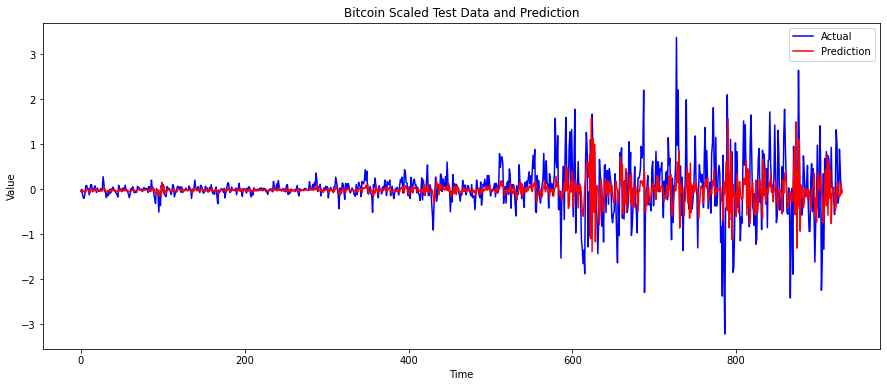

MSE1:  0.33153 RMSE1:  0.575787 CL1:  tensor([0.054605]) CL2:  tensor([0.051435])
Evaluation Time: 599.0373056259996
RMSE: 632.021319 - R2: -0.1372 - MAE: 366.677307 - SMAPE: 150.403613 - PCOR: 0.083522 - F1_MI: 0.544086 - F1_MA: 0.362883 - F1_W: 0.546171


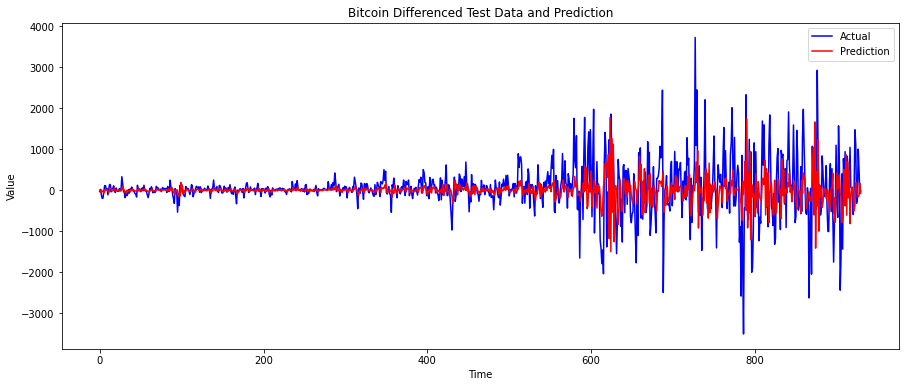

MSE2:  399450.947628 RMSE2:  632.021319


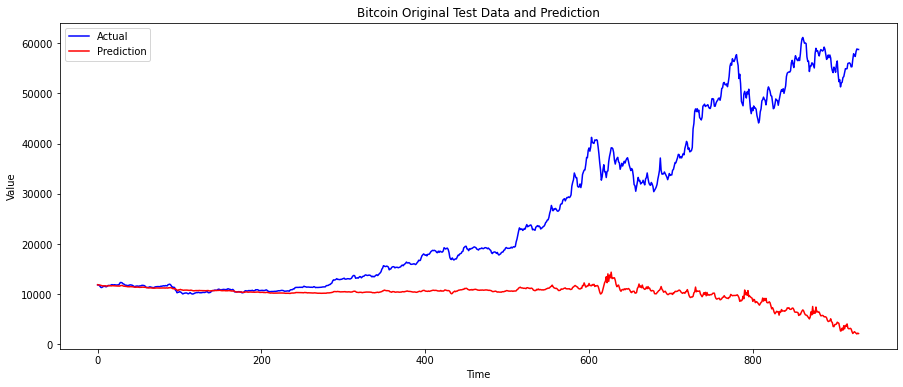

MSE3:  572954416.338407 RMSE3:  23936.466246
RMSE: 23936.466246 - R2: -1.172625 - MAE: 16316.698768 - SMAPE: 66.808764 - PCOR: -0.655585


In [ ]:
folder = "dtwevl"
fn = "1.3.. MEM_EVL_60_256_0_5"
model_REG = REG2(next(iter(train_loader))[0].shape[2], 256, 1, 1)
optimizer = torch.optim.Adam(model_REG.parameters(), lr=0.001)

model, train_loss, val_loss, b1, b2, y_pred_all = model_load2(fn, model_REG, optimizer, folder)
#print(train_loss, val_loss[0])

'''fn = "6.2.._ MEM_EVL_60_256_0_5"
loss_all = load_losses(fn, folder)
train_loss_all = loss_all[0]
val_loss_all = loss_all[1]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.array(train_loss_all), 'b', label="Train Loss")
ax.plot(np.array(val_loss_all), 'r' , label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()'''

lr = 0.0001


index = random.sample(range(len(train_data)), round(len(train_data)/3))
train_input2 = TensorDataset(torch.from_numpy(np.asarray(itemgetter(*index)(train_data))), torch.from_numpy(np.asarray(itemgetter(*index)(train_label))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q1))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q2))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q))))
train_loader2 = DataLoader(train_input2, shuffle=False, batch_size=1, drop_last=False)

device = torch.device("cpu")
print()
print("----------------------  All Data --------------------------")
data_part = "Full"
#all_dtw1, all_dtw2, all_dtw3 = prediction_dtw(model, all_data, all_label, all_q1, all_q2, all_norm_scaled, all_norm, all, all.values[tw].item(), scaler, tw, train_loader2, 1)
print()
print("----------------------  Train Data --------------------------")
data_part = "Train"
#train_dtw1, train_dtw2, train_dtw3 = prediction_dtw(model, train_data, train_label, train_q1, train_q2, train_norm_scaled, train_norm, train, train.values[tw].item(), scaler, tw, train_loader2, 1)
print()
print("----------------------  Validation Data --------------------------")
data_part = "Validation"
#val_dtw1, val_dtw2, val_dtw3 = prediction_dtw(model, val_data, val_label, val_q1, val_q2, val_norm_scaled, val_norm, val, train.values[-1].item(), scaler, tw, train_loader2, 2)
print()
print("----------------------  Test Data --------------------------")
data_part = "Test"
test_dtw1, test_dtw2, test_dtw3 = prediction_dtw(model, test_data, test_label, test_q1, test_q2, test_norm_scaled, test_norm, test, val.values[-1].item(), scaler, tw, train_loader2, 2)

In [ ]:
#data_name = "all"
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
lr = 0.0001
dtwevl_model = training_dtw(train_loader, val_loader, lr, tw, "dtwevl", "MEM_EVL", "6.2.") # My approach

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Starting Training of MEM_EVL model
tensor([[-0.017785]], device='cuda:0', grad_fn=<AddBackward0>) tensor([[-0.012597]], device='cuda:0') tensor([0.], device='cuda:0') tensor([0], device='cuda:0') tensor([-0.008403], device='cuda:0') tensor([1], device='cuda:0')
Epoch 1......Step: 100/4280....... Average Loss for Epoch: 0.000958....... Average Loss1 for Epoch: 0.000441....... Average Loss2 for Epoch: 0.0....... Average Loss3 for Epoch: 0.000517
b1:  Parameter containing:
tensor([0.], device='cuda:0', requires_grad=True) - b2:  Parameter containing:
tensor([0.002095], device='cuda:0', requires_grad=True)
tensor([[-0.015546]], device='cuda:0', grad_fn=<AddBackward0>) tensor([[-0.019060]], device='cuda:0') tensor([0.], device='cuda:0') tensor([0], device='cuda:0') tensor([-0.008403], device='cuda:0') tensor([1], device='cuda:0')
Epoch 1......Step: 200/4280....... Average Loss for Epoch: 0.00078....... Average Loss1 for Epoch: 0.000259....... Average Loss2 for Epoch: 0.0....... Average Loss

# DEL

In [ ]:
def training_del(train_loader, val_loader, learn_rate, tw, path, model_type, n, hidden_dim=256, EPOCHS=1000):

    
    '''y_all.append(y.numpy().reshape(1, -1)[0][0])
    k1_all.append(k1.cpu().detach().numpy().reshape(-1)[0])
    k2_all.append(k2.cpu().detach().numpy().reshape(-1)[0])'''

    device = torch.device("cuda")
    file_name = str(n)+ ". " + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5"  
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 1
    n_layers = 1
    # Instantiating the models
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)   
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "MEM_CE":
       
        fn = "ce_hiddens3"
        index, S1, S2, q1, q2, q = load_hidden(fn, "ce")
        
        S1 = S1.T.view(hidden_dim, -1).to(device).float()
        S2 = S2.T.view(hidden_dim, -1).to(device).float()

        b1 = torch.rand(1 , requires_grad=True).to(device).float()
        b2 = torch.rand(1 , requires_grad=True).to(device).float()

        model = MEM(input_dim, hidden_dim, output_dim, n_layers) 

    elif model_type == "MEM_EVL":

        #b1 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()
        #b2 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()

    model = DEL(input_dim, hidden_dim, output_dim, n_layers) 
    
    model.to(device)
  
    # Defining loss function and optimizer
    criterion = nn.MSELoss()
    CE = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    model.train()

    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    train_loss_all = []
    val_loss_all = []
    r = 0
    L2 = 0.0
    L3 = 0.0

    #b1 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()
    #b2 = Variable(torch.ones(1, 1, 1), requires_grad=True).to(device).float()

    #train_loss = 0
    #val_loss = 0

    y_pred_all = []
    dtw_all = []
    v12_all = []
    v22_all = []

    los2 = 0.0
    los3 = 0.0

    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = perf_counter()
        h = model.init_hidden(batch_size)
        avg_loss = 0.
        avg_los1 = 0.
        avg_los2 = 0.
        avg_los3 = 0.
        #avg_val_los1_all = 0.
        #avg_val_los2_all = 0.
        #avg_val_los3_all = 0.
        counter = 0
      
        index = random.sample(range(len(train_data)), round(len(train_data)/3))
        train_input2 = TensorDataset(torch.from_numpy(np.asarray(itemgetter(*index)(train_data))), torch.from_numpy(np.asarray(itemgetter(*index)(train_label))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q1))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q2))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q))))
        train_loader2 = DataLoader(train_input2, shuffle=False, batch_size=1, drop_last=False)

        for x, label, v1, v2, v in train_loader:

            #print(x)
            dtw_all = []
            label2_all = []

            for x2, label2, v12, v22, vv in train_loader2:
                
                x = torch.squeeze(x, 0)
                x2 = torch.squeeze(x2, 0)
                #x = x.unsqueze(0)
                #x2 = x2.unsqueze(0)
                '''print(x.size())
                print("====")
                print(x2.size())'''
                dtw1 = dtw(x, x2)
                #print(dtw1)
                dtw_all.append(dtw1)
                #print(dtw_all)
                label2_all.append(label2.numpy().reshape(1, -1)[0][0])

            #print(round(len(dtw_all)/3))
            #min_index = np.argpartition(dtw_all, round(len(dtw_all)/3))
            min_index = np.array(dtw_all).argsort()[:round(len(dtw_all)/3)]
            #print(np.mean(np.array(v12_all)[min_index]))
            #print(dtw_all)
            k = torch.tensor([np.mean(np.array(label2_all)[min_index])]).to(device).float()
            #print(v12_min)
            #print(np.mean(v12_min))
            #print(k1, k2)
            #torch.tensor([k1_all[counter-1]]).to(device).float()
            model.train()

            counter += 1
            if model_type == "LSTM":
                h = tuple([e.data for e in h])          
            else:
                h = h.data

            model.zero_grad()
            
            if (model_type == "LSTM" or model_type == "GRU"):

                out, h = model(x.to(device).float(), h)
                loss = criterion(out, label.to(device).float())

                loss.backward()
                optimizer.step()
                avg_loss += loss.item()
                if counter%50 == 0:
                    print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6)))
                #current_time = perf_counter()
                train_loss = avg_loss/len(train_loader)

                #print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))
                #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
                
                #epoch_times.append(current_time-start_time)    
                #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
                

            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):
                                        
                #out, p, h, h1, h2, k1_input, k2_input, k1, k2, b1, b2 = model(x.to(device).float(), h, h1, h2)  

                #k1 = torch.tensor([k1_all[counter-1]]).to(device).float()
                #k2 = torch.tensor([k2_all[counter-1]]).to(device).float()
                x = torch.unsqueeze(x, 0)

                #print(k1, k2)

                out, p, h, b = model(x.to(device).float(), h, k)

                #print(out, p, k1_input, k2_input, k1, k2, b1, b2);
            
                if (model_type == "MEM_CE"):

                      los2 = CE(k1_input, v1.to(device).view(-1))
                      los3 = CE(k2_input, (v2+1).to(device).view(-1))

                elif (model_type == "MEM_EVL"):

                los1 = criterion(out, label.to(device).float())
                los2 = L2*los2
                los3 = L3*los3
                #los1_all = los1_all + los1
                #los2_all = los2_all + L2*los2
                #los3_all = los3_all + L3*los3

                loss = los1 + los2 + los3
                #loss = los2

                los1.backward()
                optimizer.step()
                '''avg_los1 = 0 #avg_los1 += los1.item()
                avg_los2 = 0 #avg_los2 += los2.item()
                avg_los3 = 0''' #avg_los3 += los3.item()
                avg_los1 += los1.item()
                avg_los2 = 0
                avg_los3 = 0

                avg_loss += loss.item()
                if counter%100 == 0:
                    print(out, label.to(device).float(), k)
                    print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6)))
                    print("b: " , b)
                #current_time = perf_counter()
        train_loss = avg_loss/len(train_loader)

        print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))
        #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        
        #epoch_times.append(current_time-start_time)    
        #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
            
        if (model_type == "LSTM" or model_type == "GRU"):

                val_pred, targets, val_RMSE, val_MSE = validate(model, test_data, test_label, tw)

                val_loss = val_MSE
                print("MSE of val_data: {}".format(val_MSE))

                train_loss_all.append(train_loss)
                val_loss_all.append(val_loss)
                          

        elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                val_pred, targets, val_RMSE, val_MSE,  val_CL1, val_CL2 = validate_del(model, val_data, val_label, val_q1, val_q2, tw, train_loader2, L2, L3)

                val_loss = val_MSE + val_CL1 + val_CL2
                #val_loss = val_CL1
                #print("Total val_data loss: {} - MSE of val_data: {} - CL1 of val_data: {} - CL2 of val_data: {}".format(val_loss, val_MSE, val_CL1, val_CL2))
                
                print("Total val_data loss: {} - MSE of val_data: {}".format(val_loss, val_MSE))

                train_loss_all.append(train_loss)
                val_loss_all.append(val_loss)       
                

        if (min(val_loss_all) < val_loss):

            r += 1
            print("r: ",r)
            
        else:

            r = 0  
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path)  
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save3(model, optimizer, file_name, epoch, train_loss, val_loss, b, y_pred_all, path)

        if (r == 20 or epoch == EPOCHS+1):
            
            print("========")
            file_name = str(n)+ "._ " + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5" 
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path)  
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save3(model, optimizer, file_name, epoch, train_loss, val_loss, b, y_pred_all, path)
                  save_losses(train_loss_all, val_loss_all, file_name, path)
                  break

    return model


def validate_del(model, test_x, test_y, test_q1, test_q2, tw, train_loader2, L1, L2): #For loss function manipulation and there is no scaler

    model.eval()
    outputs = []
    targets = []
    start_time = perf_counter()

    dtw_all = []
    label2_all = []

    for i in range(len(test_x)):

        x = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        h = model.init_hidden(x.shape[0])
        for x2, label2, v12, v22, vv in train_loader2:
            
            x = torch.squeeze(x, 0)
            x2 = torch.squeeze(x2, 0)
            #x = x.unsqueze(0)
            #x2 = x2.unsqueze(0)
            '''print(x.size())
            print("====")
            print(x2.size())'''
            dtw1 = dtw(x, x2)
            #print(dtw1)
            dtw_all.append(dtw1)
            #print(dtw_all)
            label2_all.append(label2.numpy().reshape(1, -1)[0][0])

        #print(round(len(dtw_all)/3))
        min_index = np.array(dtw_all).argsort()[:round(len(dtw_all)/3)]
        k = torch.tensor([np.mean(np.array(label2_all)[min_index])]).to(device).float()

        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        
        x = torch.unsqueeze(x, 0)
        out, p, h, b = model(x.to(device).float(), h, k)

        outputs.append(out.cpu().detach().numpy().reshape(-1)[0])
        #print(outputs)
        targets.append(labs.numpy().reshape(1, -1)[0][0])
        #print(targets)

    print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs)), 6)
    RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

    return outputs, targets, RMSE, MSE, 0, 0


def evaluate_del(model, test_x, test_y, label_scalers, test_q1, test_q2, tw, train_loader2, L1, L2): #For loss function manipulation and there is no scaler

    model.eval()
    outputs = []
    targets = []
    start_time = perf_counter()

    dtw_all = []
    label2_all = []

    for i in range(len(test_x)):

        x = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        h = model.init_hidden(x.shape[0])
        for x2, label2, v12, v22, vv in train_loader2:
            
            x = torch.squeeze(x, 0)
            x2 = torch.squeeze(x2, 0)
            #x = x.unsqueze(0)
            #x2 = x2.unsqueze(0)
            '''print(x.size())
            print("====")
            print(x2.size())'''
            dtw1 = dtw(x, x2)
            #print(dtw1)
            dtw_all.append(dtw1)
            #print(dtw_all)
            label2_all.append(label2.numpy().reshape(1, -1)[0][0])

        #print(round(len(dtw_all)/3))
        min_index = np.array(dtw_all).argsort()[:round(len(dtw_all)/3)]
        k = torch.tensor([np.mean(np.array(label2_all)[min_index])]).to(device).float()

        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        
        x = torch.unsqueeze(x, 0)
        out, p, h, b = model(x.to(device).float(), h, k)

        outputs.append(label_scalers.inverse_transform(out.cpu().detach().numpy()).reshape(-1)[0])
        targets.append(label_scalers.inverse_transform(labs.numpy().reshape(1, -1))[0][0])

    print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs)), 6)
    RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

    return outputs, targets, RMSE, MSE

In [ ]:
def prediction_del(model, test_x, test_y, test_q1, test_q2, scaled_data, norm_data, data, start_value, scalers, tw, train_loader2, version):

        if (version == 1):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate_del(model, test_x, test_y, test_q1, test_q2, tw, train_loader2, 1., 1.)                      
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate_del(model, test_x, test_y, scalers, test_q1, test_q2, tw, train_loader2, 1., 1.)         
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
           
            real_predictions = inverse_original(start_value, pred2)
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

            RMSE3 = RMSE(real_predictions, data[tw+1:])
            #RMSE3 = RMSE(real_predictions, data[tw:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw+1:], real_predictions)
      
        elif (version == 2):

            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate_del(model, test_x, test_y, test_q1, test_q2, tw, train_loader2, 1., 1.)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)


            pred2, targets2, RMSE2, MSE2 = evaluate_del(model, test_x, test_y, scalers, test_q1, test_q2, tw, train_loader2, 1., 1.) 
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = inverse_original(start_value, pred2)
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3, 6))
            evaluater(data, real_predictions)

        elif (version == 3):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate_del(model, test_x, test_y, test_q1, test_q2, tw, train_loader2, 1., 1.)                    
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate_del(model, test_x, test_y, scalers, test_q1, test_q2, tw, train_loader2, 1., 1.)          
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
           
            real_predictions = pred2
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

            RMSE3 = RMSE(real_predictions, data[tw:])
            #RMSE3 = RMSE(real_predictions, data[tw:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw:], real_predictions)
      
        elif (version == 4):

            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate_del(model, test_x, test_y, test_q1, test_q2, tw, train_loader2, 1., 1.)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)


            pred2, targets2, RMSE2, MSE2 = evaluate_del(model, test_x, test_y, scalers, test_q1, test_q2, tw, train_loader2, 1., 1.) 
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = pred2
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3, 6))
            evaluater(data, real_predictions)

        return pred1, pred2, real_predictions

In [ ]:
#data_name = "all"
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
lr = 0.0001
dtwevl_model = training_del(train_loader, val_loader, lr, tw, "del", "MEM_EVL", "1.3.") # My approach

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  "num_layers={}".format(dropout, num_layers))



----------------------  All Data --------------------------

----------------------  Train Data --------------------------

----------------------  Validation Data --------------------------

----------------------  Test Data --------------------------
Evaluation Time: 486.7743344599994
RMSE: 0.534971 - R2: 0.018311 - MAE: 0.311494 - SMAPE: 149.166267 - PCOR: 0.190247 - F1_MI: 0.606452 - F1_MA: 0.408392 - F1_W: 0.522734


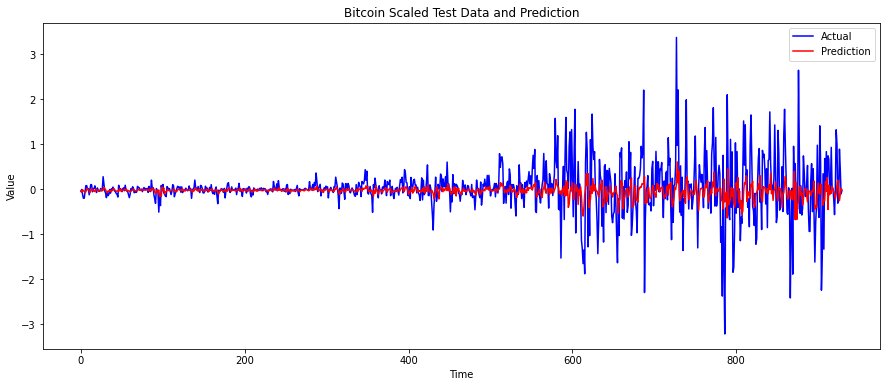

MSE1:  0.286194 RMSE1:  0.534971 CL1:  0 CL2:  0
Evaluation Time: 485.49116996700013
RMSE: 587.219199 - R2: 0.018311 - MAE: 341.91639 - SMAPE: 154.062931 - PCOR: 0.190247 - F1_MI: 0.55914 - F1_MA: 0.374574 - F1_W: 0.559361


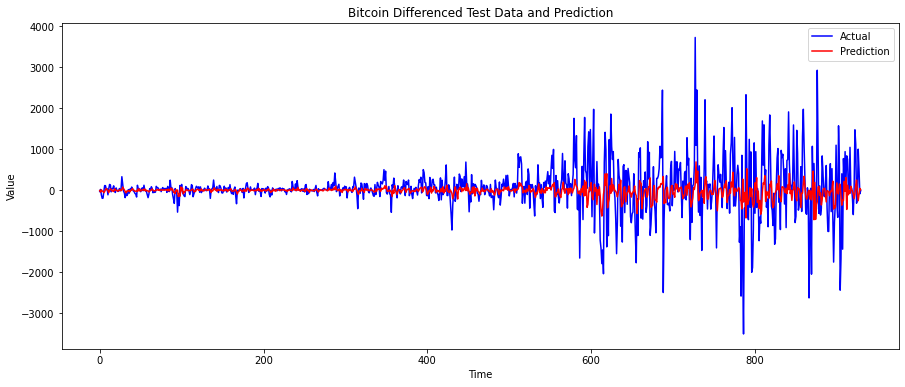

MSE2:  344826.387663 RMSE2:  587.219199


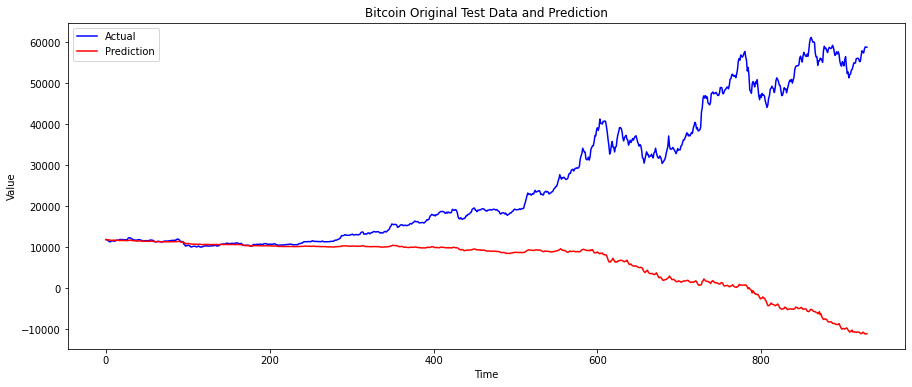

MSE3:  893096736.098841 RMSE3:  29884.724126
RMSE: 29884.724126 - R2: -2.386595 - MAE: 20143.873004 - SMAPE: 87.794931 - PCOR: -0.921883


In [ ]:
folder = "del"
fn = "1.3.. MEM_EVL_60_256_0_5"
model_REG = DEL(next(iter(train_loader))[0].shape[2], 256, 1, 1)
optimizer = torch.optim.Adam(model_REG.parameters(), lr=0.001)

model, train_loss, val_loss, b, y_pred_all = model_load3(fn, model_REG, optimizer, folder)
#print(train_loss, val_loss[0])

'''fn = "1.4.._ MEM_EVL_50_256_0_5"
loss_all = load_losses(fn, folder)
train_loss_all = loss_all[0]
val_loss_all = loss_all[1]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.array(train_loss_all), 'b', label="Train Loss")
ax.plot(np.array(val_loss_all), 'r' , label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()'''

lr = 0.0001


index = random.sample(range(len(train_data)), round(len(train_data)/3))
train_input2 = TensorDataset(torch.from_numpy(np.asarray(itemgetter(*index)(train_data))), torch.from_numpy(np.asarray(itemgetter(*index)(train_label))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q1))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q2))), torch.from_numpy(np.asarray(itemgetter(*index)(train_q))))
train_loader2 = DataLoader(train_input2, shuffle=False, batch_size=1, drop_last=False)

device = torch.device("cpu")
print()
print("----------------------  All Data --------------------------")
data_part = "Full"
#all_del1, all_del2, all_del3 = prediction_del(model, all_data, all_label, all_q1, all_q2, all_norm_scaled, all_norm, all, all.values[tw].item(), scaler, tw, train_loader2, 1)
print()
print("----------------------  Train Data --------------------------")
data_part = "Train"
#train_del1, train_del2, train_del3 = prediction_del(model, train_data, train_label, train_q1, train_q2, train_norm_scaled, train_norm, train, train.values[tw].item(), scaler, tw, train_loader2, 1)
print()
print("----------------------  Validation Data --------------------------")
data_part = "Validation"
#val_del1, val_del2, val_del3 = prediction_del(model, val_data, val_label, val_q1, val_q2, val_norm_scaled, val_norm, val, train.values[-1].item(), scaler, tw, train_loader2, 2)
print()
print("----------------------  Test Data --------------------------")
data_part = "Test"
test_del1, test_del2, test_del3 = prediction_del(model, test_data, test_label, test_q1, test_q2, test_norm_scaled, test_norm, test, val.values[-1].item(), scaler, tw, train_loader2, 2)

Evaluation Time: 42.13274098599868
RMSE: 0.179892 - R2: 0.406908 - MAE: 0.135952 - SMAPE: 106.6243 - PCOR: 0.642732 - F1_MI: 0.745509 - F1_MA: 0.420261 - F1_W: 0.687647


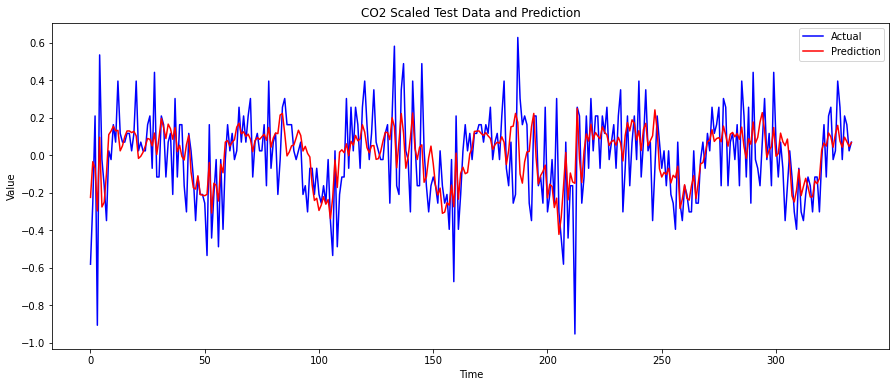

MSE1:  0.032361 RMSE1:  0.179892 CL1:  0 CL2:  0
Evaluation Time: 41.501367499997286
RMSE: 0.386767 - R2: 0.406908 - MAE: 0.292298 - SMAPE: 105.160267 - PCOR: 0.642732 - F1_MI: 0.598802 - F1_MA: 0.603181 - F1_W: 0.600296


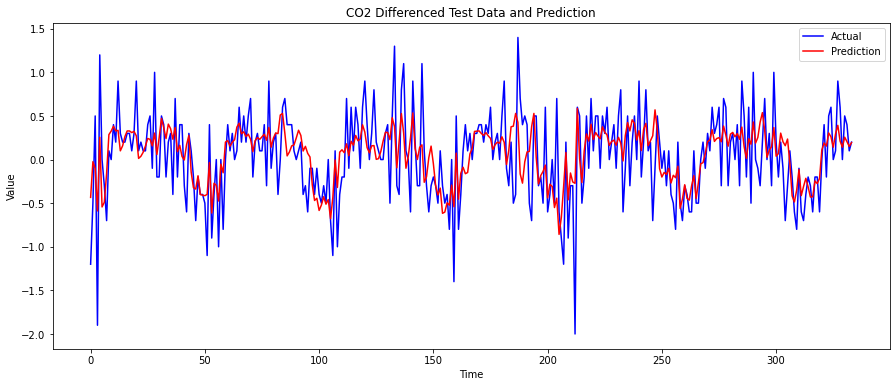

MSE2:  0.149589 RMSE2:  0.386767


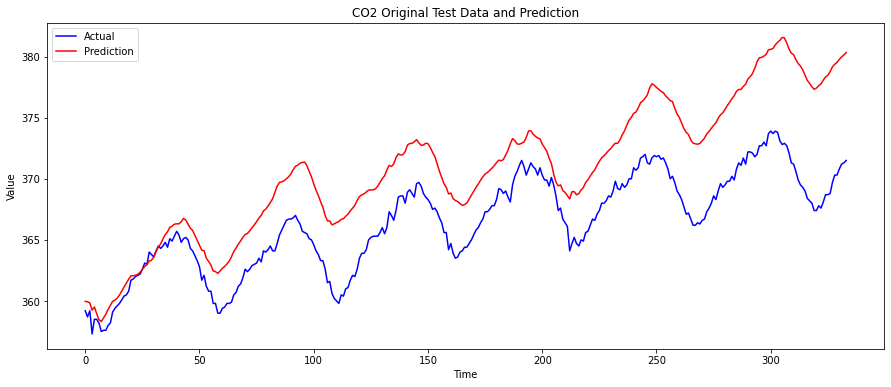

MSE3:  24.265904 RMSE3:  4.926043
RMSE: 4.926043 - R2: -0.590421 - MAE: 4.311859 - SMAPE: 1.164487 - PCOR: 0.928228


In [ ]:
test_del1, test_del2, test_del3 = prediction_del(model, test_data, test_label, test_q1, test_q2, test_norm_scaled, test_norm, test, val.values[-1].item(), scaler, tw, train_loader2, 2)

In [ ]:
def validate(model, test_x, test_y, tw): #For loss function manipulation and there is no scaler

    model.eval()
    outputs = []
    targets = []
    start_time = perf_counter()
    for i in range(len(test_x)):
        inp = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        h = model.init_hidden(inp.shape[0])
        out, h = model(inp.to(device).float(), h)
        outputs.append(out.cpu().detach().numpy().reshape(-1)[0])
        #print(outputs)
        targets.append(labs.numpy().reshape(1, -1)[0][0])
        #print(targets)
    print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs)), 6)
    RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

    return outputs, targets, RMSE, MSE

def validate2(model, test_x, test_y, test_q1, test_q2, tw, S1, S2, q1, q2, L2, L3):

    model.eval()
    outputs = []
    targets = []
    start_time = perf_counter()

    S1 = S1.to(device)
    S2 = S2.to(device)

    q1 = q1.to(device).view(1, 1, -1)
    q2 = q2.to(device).view(1, 1, -1)

    los2 = 0.
    los3 = 0.

    #q1 = q1.T.repeat(len(x), 1).to(device).view(len(x), 1, -1)
    #q2 = q2.T.repeat(len(x), 1).to(device).view(len(x), 1, -1)

    for i in range(len(test_x)):
        inp = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        h = model.init_hidden(inp.shape[0])
        out, h, k1_input, k2_input, b1, b2, k1, k2  = model(inp.to(device).float(), h, S1, S2, q1, q2)
        outputs.append(out.cpu().detach().numpy().reshape(-1)[0])
        #print(outputs)
        targets.append(labs.numpy().reshape(1, -1)[0][0])
     
        v1 = torch.from_numpy(np.array(test_q1[i]))
        v2 = torch.from_numpy(np.array(test_q2[i]))

        v1 = v1.type(torch.LongTensor)
        v2 = v2.type(torch.LongTensor)

        ones = torch.ones(len(k1)).to(device).float()
        a = B1 * (torch.pow((ones - ((ones-k1)/eta1)), eta1)).view(-1,1)   
        b = B0 * (torch.pow((ones- (k1/eta1)), eta1)).view(-1,1)
        weights1 = torch.FloatTensor ([a, b]).to(device).float()
        EVL1 = nn.NLLLoss(weight = weights1 , reduction = 'none')

        ones = torch.ones(len(k2)).to(device).float()
        c = B3 * (torch.pow((ones - ((ones+k2)/eta2)), eta2))
        d = B2 * (torch.pow((ones - (-k2/eta2)), eta2))
        weights2 = torch.FloatTensor([d, c]).to(device).float()
        EVL2 = nn.NLLLoss(weight = weights2 , reduction = 'none')

        los2 += (L2 * EVL1(k1_input, v1.to(device).view(-1)))
        los3 += (L3 * EVL2(k2_input, (v2+1).to(device).view(-1)))
 
    print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs)), 6)
    RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

    los2 = np.round(los2.cpu().detach().numpy()/len(test_x), 6)
    los3 = np.round(los3.cpu().detach().numpy()/len(test_x), 6)

    return outputs, targets, RMSE, MSE, los2, los3

def validate3(model, test_x, test_y, test_q1, test_q2, tw, L2 , L3):

    model.eval()
    outputs = []
    targets = []
    start_time = perf_counter()

    los2 = 0.
    los3 = 0.

    #q1 = q1.T.repeat(len(x), 1).to(device).view(len(x), 1, -1)
    #q2 = q2.T.repeat(len(x), 1).to(device).view(len(x), 1, -1)

    for i in range(len(test_x)):
        inp = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        h = model.init_hidden(inp.shape[0])
        h1 = model.init_hidden(inp.shape[0])
        h2 = model.init_hidden(inp.shape[0])
        out, p, h, h1, h2, k1_input, k2_input, k1, k2, b1, b2 = model(inp.to(device).float(), h, h1, h2)
        outputs.append(out.cpu().detach().numpy().reshape(-1)[0])
        #print(outputs)
        targets.append(labs.numpy().reshape(1, -1)[0][0])
     
        v1 = torch.from_numpy(np.array(test_q1[i]))
        v2 = torch.from_numpy(np.array(test_q2[i]))

        v1 = v1.type(torch.LongTensor)
        v2 = v2.type(torch.LongTensor)

        ones = torch.ones(len(k1)).to(device).float()
        a = B1 * (torch.pow((ones - ((ones-k1)/eta1)), eta1)).view(-1,1)   
        b = B0 * (torch.pow((ones - (k1/eta1)), eta1)).view(-1,1)
        weights1 = torch.FloatTensor ([a, b]).to(device).float()
        #EVL1 = nn.NLLLoss(weight = weights1)
        EVL1 = nn.CrossEntropyLoss(weight = weights1, reduction = 'none')

        ones = torch.ones(len(k2)).to(device).float()
        c = B3 * (torch.pow((ones - ((ones+k2)/eta2)), eta2))
        d = B2 * (torch.pow((ones - (-k2/eta2)), eta2))
        weights2 = torch.FloatTensor([d, c]).to(device).float()
        EVL2 = nn.CrossEntropyLoss(weight = weights1, reduction = 'none')

        los2 += (L2 * EVL1(k1_input, v1.to(device).view(-1)))
        los3 += (L3 * EVL2(k2_input, (v2+1).to(device).view(-1)))
 
    #print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs)), 6)
    RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

    return outputs, targets, RMSE, MSE, los2, los3

def validate_CL(model, test_x, test_y, test_q1, test_q2, tw, model_type):

    #model.eval()
    outputs = []
    targets = []
    start_time = perf_counter()

    loss_all = 0.

    #q1 = q1.T.repeat(len(x), 1).to(device).view(len(x), 1, -1)
    #q2 = q2.T.repeat(len(x), 1).to(device).view(len(x), 1, -1)

    for i in range(len(test_x)):
        x = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        h = model.init_hidden(x.shape[0])     
        #print(outputs)
        targets.append(labs.numpy().reshape(1, -1)[0][0])
     
        v1 = torch.from_numpy(np.array(test_q1[i]))
        v2 = torch.from_numpy(np.array(test_q2[i]))

        v1 = v1.type(torch.LongTensor)
        v2 = v2.type(torch.LongTensor)

        if (model_type == "CE1"):

            out, h = model(x.to(device).float(), h)
            outputs.append(out.cpu().detach().numpy().reshape(-1)[0])
            v1 = v1.type(torch.LongTensor)
            #print(q1.to(device).view(-1))
            loss = criterion(out, v1.to(device).view(-1))

        elif (model_type == "CE2"):

            out, h = model(x.to(device).float(), h)
            outputs.append(out.cpu().detach().numpy().reshape(-1)[0])
            v2 = v2.type(torch.LongTensor)+1
            #print(q1.to(device).view(-1))
            loss = criterion(out, v2.to(device).view(-1))

        elif (model_type == "EVL1"):

            #em = torch.zeros(1,hidden_dim)
            k1, out, h, em = model(x.to(device).float(), h)
            outputs.append(k1.cpu().detach().numpy().reshape(-1)[0])
            v1 = v1.type(torch.LongTensor)
            #print(v1.to(device).view(-1))
            #print(k1.size())
            '''a = B1 * (torch.pow((1 - ((1-k1)/eta1)), eta1))
            b = B0 * (torch.pow((1 - (k1/eta1)), eta1))'''

            ones = torch.ones(len(k1)).to(device).float()
            a = B1 * (torch.pow((ones - ((ones-k1)/eta1)), eta1)).view(-1,1)
            #print(a)
            b = B0 * (torch.pow((ones - (k1/eta1)), eta1)).view(-1,1)

            #weights1 = torch.cat((a, b),1)
            weights1 = torch.FloatTensor([a, b]).to(device).float()
            EVL1 = nn.CrossEntropyLoss(weight = weights1 , reduction = 'none')
            loss = EVL1(out, v1.to(device).view(-1))

            #print(loss)

        elif (model_type == "EVL2"):

            k2, out, h, em = model(x.to(device).float(), h)
            outputs.append(k2.cpu().detach().numpy().reshape(-1)[0])
            v2 = v2.type(torch.LongTensor)+1
            #print(q1.to(device).view(-1))

            '''c = B3 * (torch.pow((1 - ((1+k2)/eta2)), eta2))((ones- (k1/eta1)), eta1)).view(-1,1)
            d = B2 * (torch.pow((1 - (-k2/eta2)), eta2))'''

            ones = torch.ones(len(k2)).to(device).float()
            c = B3 * (torch.pow((ones - ((ones+k2)/eta2)), eta2))
            d = B2 * (torch.pow((ones - (-k2/eta2)), eta2))

            weights2 = torch.FloatTensor([d, c]).to(device).float()
            EVL2 = nn.CrossEntropyLoss(weight = weights2 , reduction = 'none')
            loss = EVL2(out, (v2).to(device).view(-1)) 

        loss_all += loss
    
    #print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    #print(targets)
    #print(outputs)
    #targets = np.array(targets).reshape(1,-1)
    #outputs = np.array(outputs).reshape(1,-1)

    loss_all = np.round(loss_all.cpu().detach().numpy()/len(test_x), 6)

    RMSE = 0.
    MSE = 0.
    #print("RMSE: {} - sMAPE: {}% - R2: {} - MAE: {}".format(RMSE, sMAPE*100, R2, MAE))
    return outputs, targets, RMSE, MSE, loss_all

def validate4(model, model1, model2, test_x, test_y, test_q1, test_q2, tw, L1, L2, v): #For loss function manipulation and there is no scaler

    device = torch.device("cuda")
    model.eval().to(device)
    model1.eval().to(device)
    model2.eval().to(device)
    outputs = []
    targets = []
    start_time = perf_counter()

    '''h1 = model1_EVL.init_hidden(1)
    h1 = h1.data
    model1_EVL.zero_grad()
    k1, out1, h1 = model1_EVL(x.to(device).float(), h1)

    h2 = model2_EVL.init_hidden(1)
    h2 = h2.data
    model2_EVL.zero_grad()
    k2, out2, h2 = model2_EVL(x.to(device).float(), h2)'''

    loss = 0.
    los2 = 0.
    los3 = 0.

    print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    if (v == 2): #REGDCL için val_los hepsinin toplamı ise

        for i in range(len(test_x)):

              x = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
              #print(inp.size())
              labs = torch.from_numpy(np.array(test_y[i]))
              h = model.init_hidden(x.shape[0])

              h1 = model1.init_hidden(1)
              h1 = h1.data
              model1.zero_grad()
              k1, out1, h1, em1 = model1(x.to(device).float(), h1)

              h2 = model2.init_hidden(1)
              h2 = h2.data
              model2.zero_grad()
              k2, out2, h2, em2 = model2(x.to(device).float(), h2)

              out, p, h, b1, b2 = model(x.to(device).float(), h, k1, k2)

              outputs.append(out.cpu().detach().numpy().reshape(-1)[0])
              #print(outputs)
              targets.append(labs.numpy().reshape(1, -1)[0][0])
              #print(targets)

              v1 = torch.from_numpy(np.array(test_q1[i]))
              v2 = torch.from_numpy(np.array(test_q2[i]))

              v1 = v1.type(torch.LongTensor)
              v2 = v2.type(torch.LongTensor)

              k1_input = torch.tensor([[1-k1, k1]]).to(device).float()
              k2_input = torch.tensor([[-k2, 1+k2]]).to(device).float()
                    
              ones = torch.ones(len(k1)).to(device).float()
              a = B1 * (torch.pow((ones - ((ones-k1)/eta1)), eta1)).view(-1,1)   
              b = B0 * (torch.pow((ones - (k1/eta1)), eta1)).view(-1,1)
              weights1 = torch.FloatTensor ([a, b]).to(device).float()
              #EVL1 = nn.NLLLoss(weight = weights1)
              EVL1 = torch.nn.NLLLoss(weight = weights1, reduction = 'none')

              ones = torch.ones(len(k2)).to(device).float()
              c = B3 * (torch.pow((ones - ((ones+k2)/eta2)), eta2))
              d = B2 * (torch.pow((ones - (-k2/eta2)), eta2))
              weights2 = torch.FloatTensor([d, c]).to(device).float()
              #EVL2 = nn.NLLLoss(weight = weights2)
              EVL2 = torch.nn.NLLLoss(weight = weights2, reduction = 'none')

              los2 += (L1 * EVL1(k1_input, v1.to(device).view(-1)))
              los3 += (L2 * EVL2(k2_input, (v2+1).to(device).view(-1)))
  

    else:

        for i in range(len(test_x)):

          x = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
          #print(inp.size())
          labs = torch.from_numpy(np.array(test_y[i]))
          h = model.init_hidden(x.shape[0])
          h1 = model1.init_hidden(1)
          h1 = h1.data
          model1.zero_grad()
          k1, out1, h1, em1 = model1(x.to(device).float(), h1)

          h2 = model2.init_hidden(1)
          h2 = h2.data
          model2.zero_grad()
          k2, out2, h2, em2 = model2(x.to(device).float(), h2)

          out, p, h, b1, b2 = model(x.to(device).float(), h, k1, k2)

          outputs.append(out.cpu().detach().numpy().reshape(-1)[0])
          #print(outputs)
          targets.append(labs.numpy().reshape(1, -1)[0][0])
          #print(targets)
  
    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs)), 6)
    RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

    if (v == 2):

        return outputs, targets, RMSE, MSE, -los2/len(outputs), -los3/len(outputs)

    return outputs, targets, RMSE, MSE


def evaluate(model, test_x, test_y, label_scalers, tw):
    model.eval()
    outputs = []
    targets = []
    start_time = perf_counter()
    for i in range(len(test_x)):
        inp = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        h = model.init_hidden(inp.shape[0])
        out, h = model(inp.to(device).float(), h)

        outputs.append(label_scalers.inverse_transform(out.cpu().detach().numpy()).reshape(-1)[0])
        targets.append(label_scalers.inverse_transform(labs.numpy().reshape(1, -1))[0][0])
        #print(targets)
    #print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs)), 6)
    RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

    return outputs, targets, RMSE, MSE

def evaluate2(model, test_x, test_y, label_scalers, tw, S1, S2, q1, q2, b1, b2):
    model.eval()
    outputs = []
    targets = []
    start_time = perf_counter()

    S1 = S1.to(device)
    S2 = S2.to(device)

    q1 = q1.to(device).view(1, 1, -1)
    q2 = q2.to(device).view(1, 1, -1)

    for i in range(len(test_x)):
        inp = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        h = model.init_hidden(inp.shape[0])
        out, h, k1_input, k2_input, b1, b2, k1, k2  = model(inp.to(device).float(), h, S1, S2, q1, q2)
        outputs.append(label_scalers.inverse_transform(out.cpu().detach().numpy()).reshape(-1))
        #print(outputs)
        targets.append(label_scalers.inverse_transform(labs.numpy().reshape(1, -1)))

        #print(targets)
    #print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs))[0][0], 6)
    RMSE = np.round((np.sqrt(SE/len(outputs)))[0][0], 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

    return outputs, targets, RMSE, MSE

def evaluate3(model, test_x, test_y, label_scalers, tw):
    model.eval()
    outputs = []
    targets = []
    start_time = perf_counter()

    for i in range(len(test_x)):
        inp = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        h = model.init_hidden(inp.shape[0])
        h1 = model.init_hidden(inp.shape[0])
        h2 = model.init_hidden(inp.shape[0])
        out, p, h, h1, h2, k1_input, k2_input, k1, k2, b1, b2 = model(inp.to(device).float(), h, h1, h2)
        outputs.append(label_scalers.inverse_transform(out.cpu().detach().numpy()).reshape(-1))
        #print(outputs)
        targets.append(label_scalers.inverse_transform(labs.numpy().reshape(1, -1)))

        #print(targets)
    #print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs))[0][0], 6)
    RMSE = np.round((np.sqrt(SE/len(outputs)))[0][0], 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

    #print("RMSE: {}%".format(RMSE))
    return outputs, targets, RMSE, MSE

def evaluate4(model, model1, model2, test_x, test_y, test_q1, test_q2, label_scalers, tw): #For loss function manipulation and there is no scaler

    device = torch.device("cuda")
    model.eval().to(device)
    model1.eval().to(device)
    model2.eval().to(device)
    outputs = []
    targets = []
    start_time = perf_counter()

    '''h1 = model1_EVL.init_hidden(1)
    h1 = h1.data
    model1_EVL.zero_grad()
    k1, out1, h1 = model1_EVL(x.to(device).float(), h1)

    h2 = model2_EVL.init_hidden(1)
    h2 = h2.data
    model2_EVL.zero_grad()
    k2, out2, h2 = model2_EVL(x.to(device).float(), h2)'''


    for i in range(len(test_x)):
        x = torch.from_numpy(np.array(test_x[i])).view(1, tw, -1)
        #print(inp.size())
        labs = torch.from_numpy(np.array(test_y[i]))
        h = model.init_hidden(x.shape[0])
        h1 = model1.init_hidden(1)
        h1 = h1.data
        model1.zero_grad()
        k1, out1, h1, em1 = model1(x.to(device).float(), h1)

        h2 = model2.init_hidden(1)
        h2 = h2.data
        model2.zero_grad()
        k2, out2, h2, em2 = model2(x.to(device).float(), h2)

        out, p, h, b1, b2 = model(x.to(device).float(), h, k1, k2)
        outputs.append(label_scalers.inverse_transform(out.cpu().detach().numpy()).reshape(-1))
        #print(outputs)
        targets.append(label_scalers.inverse_transform(labs.numpy().reshape(1, -1)))
        #print(targets)
    print("Evaluation Time: {}".format(str(perf_counter()-start_time)))

    real_label = np.zeros(len(outputs))
    pred_label = np.zeros(len(outputs))
            
    SE = 0
    for i in range(len(outputs)):

        SE += (outputs[i]-targets[i])**2

        if (targets[i]>L_u1):
                real_label[i] = np.array([1])

        elif (targets[i]<L_u2):
                real_label[i] = np.array([-1])
        else:
                real_label[i] = np.array([0])


        if (outputs[i]>L_u1):
                pred_label[i] = np.array([1])

        elif (outputs[i]<L_u2):
                pred_label[i] = np.array([-1])
        else:
                pred_label[i] = np.array([0])

    MSE = np.round((SE/len(outputs))[0][0], 6)
    RMSE = np.round((np.sqrt(SE/len(outputs)))[0][0], 6)

    R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
    PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

    F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
    F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
    F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

    print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE, R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))
    return outputs, targets, RMSE, MSE

def prediction(model, test_x, test_y, scaled_data, norm_data, data, start_value, scalers, tw, version):

        if (version == 1):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1 = validate(model, test_x, test_y, tw)                      
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate(model, test_x, test_y, scalers, tw)          
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
            real_predictions = inverse_original(start_value, pred2)
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            #RMSE3 = RMSE(real_predictions, data[tw:])
            RMSE3 = RMSE(real_predictions, data[tw+1:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw+1:], real_predictions)
      
        elif (version == 2):

            pred1, targets1, RMSE1, MSE1 = validate(model, test_x, test_y, tw)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1)


            pred2, targets2, RMSE2, MSE2 = evaluate(model, test_x, test_y, scalers, tw)
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = inverse_original(start_value, pred2)
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data, real_predictions)

        elif (version == 3):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1 = validate(model, test_x, test_y, tw)                      
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate(model, test_x, test_y, scalers, tw)          
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
            real_predictions = pred2
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            #RMSE3 = RMSE(real_predictions, data[tw:])
            RMSE3 = RMSE(real_predictions, data[tw:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw:], real_predictions)
      
        elif (version == 4):

            pred1, targets1, RMSE1, MSE1 = validate(model, test_x, test_y, tw)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1)


            pred2, targets2, RMSE2, MSE2 = evaluate(model, test_x, test_y, scalers, tw)
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = pred2
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data, real_predictions)

        return pred1, pred2, real_predictions

def prediction2(model, test_x, test_y, test_q1, test_q2, scaled_data, norm_data, data, start_value, scalers, tw, version, S1, S2, q1, q2):

        if (version == 1):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate2(model, test_x, test_y, test_q1, test_q2, tw, S1, S2, q1, q2, 1., 1.)                      
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate2(model, test_x, test_y, scalers, tw, S1, S2, q1, q2, b1, b2)          
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
           
            real_predictions = inverse_original(start_value, pred2)
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

            RMSE3 = RMSE(real_predictions, data[tw+1:])
            #RMSE3 = RMSE(real_predictions, data[tw:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw+1:], real_predictions)
      
        elif (version == 2):

            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate2(model, test_x, test_y, test_q1, test_q2, tw, S1, S2, q1, q2, 1., 1.)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)


            pred2, targets2, RMSE2, MSE2 = evaluate2(model, test_x, test_y, scalers, tw, S1, S2, q1, q2, b1, b2)
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = inverse_original(start_value, pred2)
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3, 6))
            evaluater(data, real_predictions)

        elif (version == 3):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate2(model, test_x, test_y, test_q1, test_q2, tw, S1, S2, q1, q2, 1., 1.)                      
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate2(model, test_x, test_y, scalers, tw, S1, S2, q1, q2, b1, b2)          
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
           
            real_predictions = pred2
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

            RMSE3 = RMSE(real_predictions, data[tw:])
            #RMSE3 = RMSE(real_predictions, data[tw:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw:], real_predictions)
      
        elif (version == 4):

            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate2(model, test_x, test_y, test_q1, test_q2, tw, S1, S2, q1, q2, 1., 1.)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)


            pred2, targets2, RMSE2, MSE2 = evaluate2(model, test_x, test_y, scalers, tw, S1, S2, q1, q2, b1, b2)
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = pred2
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3, 6))
            evaluater(data, real_predictions)

        return pred1, pred2, real_predictions

def prediction3(model, test_x, test_y, test_q1, test_q2, scaled_data, norm_data, data, start_value, scalers, tw, version):

        if (version == 1):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate3(model, test_x, test_y, test_q1, test_q2, tw, 1., 1.)                      
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate3(model, test_x, test_y, scalers, tw)          
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
           
            real_predictions = inverse_original(start_value, pred2)
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

            RMSE3 = RMSE(real_predictions, data[tw+1:])
            #RMSE3 = RMSE(real_predictions, data[tw:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw+1:], real_predictions)
      
        elif (version == 2):

            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate3(model, test_x, test_y, test_q1, test_q2, tw, 1., 1.)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)


            pred2, targets2, RMSE2, MSE2 = evaluate3(model, test_x, test_y, scalers, tw)
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = inverse_original(start_value, pred2)
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3, 6))
            evaluater(data, real_predictions)

        elif (version == 3):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate3(model, test_x, test_y, test_q1, test_q2, tw, 1., 1.)                      
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate3(model, test_x, test_y, scalers, tw)          
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
           
            real_predictions = inverse_original(start_value, pred2)
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

            RMSE3 = RMSE(real_predictions, data[tw:])
            #RMSE3 = RMSE(real_predictions, data[tw:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw:], real_predictions)
      
        elif (version == 4):

            pred1, targets1, RMSE1, MSE1, CL1, CL2 = validate3(model, test_x, test_y, test_q1, test_q2, tw, 1., 1.)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1, 'CL1: ', CL1, 'CL2: ', CL2)


            pred2, targets2, RMSE2, MSE2 = evaluate3(model, test_x, test_y, scalers, tw)
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = pred2
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3, 6))
            evaluater(data, real_predictions)

        return pred1, pred2, real_predictions

def prediction4(model, test_x, test_y, test_q1, test_q2, scaled_data, norm_data, data, start_value, scalers, tw, version):

        device = torch.device("cuda")
        model_EVL = EVL11(1, 256, 2, 1)
        optimizer = torch.optim.Adam(model_EVL.parameters(), lr=lr)
        model_name = "1. evl_model1-EVL1_60_256_0_5"
        path = "regevl"
        model1_EVL, index = model_load_hidden(model_EVL, optimizer, model_name, path)

        model_EVL = EVL22(1, 256, 2, 1)
        model_name = "1. evl_model1-EVL2_60_256_0_5"
        model2_EVL, index = model_load_hidden(model_EVL, optimizer, model_name, path)

        if (version == 1):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1 = validate4(model, model1_EVL, model2_EVL, test_x, test_y, test_q1, test_q2, tw, 0, 0, 1)                      
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate4(model, model1_EVL, model2_EVL, test_x, test_y, test_q1, test_q2, scalers, tw)          
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
           
            real_predictions = inverse_original(start_value, pred2)
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

            RMSE3 = RMSE(real_predictions, data[tw+1:])
            #RMSE3 = RMSE(real_predictions, data[tw:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw+1:], real_predictions)
      
        elif (version == 2):

            pred1, targets1, RMSE1, MSE1 = validate4(model, model1_EVL, model2_EVL, test_x, test_y, test_q1, test_q2, tw, 0, 0, 1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1)


            pred2, targets2, RMSE2, MSE2 = evaluate4(model, model1_EVL, model2_EVL, test_x, test_y, test_q1, test_q2, scalers, tw) 
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = inverse_original(start_value, pred2)
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3, 6))
            evaluater(data, real_predictions)

        elif (version == 3):

            scaled_data = scaled_data.reshape(len(scaled_data))
            pred1, targets1, RMSE1, MSE1 = validate4(model, model1_EVL, model2_EVL, test_x, test_y, test_q1, test_q2, tw, 0 , 0, 1)                      
            pred1 = pd.DataFrame(pred1)
            pred1.index = pd.RangeIndex(start=tw, stop=(len(pred1)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(scaled_data, 'b', label="Actual")
            plt.plot(pred1, 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1)

            norm_data = norm_data.reshape(len(norm_data))
            pred2, targets2, RMSE2, MSE2 = evaluate4(model, model1_EVL, model2_EVL, test_x, test_y, test_q1, test_q2, scalers, tw)          
            pred2_df = pd.DataFrame(pred2)
            pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(norm_data, 'b', label="Actual")
            plt.plot(pred2_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))      
           
            real_predictions = pred2
            real_predictions_df = pd.DataFrame(real_predictions)
            real_predictions_df.index = pd.RangeIndex(start=tw, stop=(len(real_predictions_df)+tw), step=1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions_df, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

            RMSE3 = RMSE(real_predictions, data[tw:])
            #RMSE3 = RMSE(real_predictions, data[tw:])

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3,6))
            evaluater(data[tw:], real_predictions)
      
        elif (version == 4):

            pred1, targets1, RMSE1, MSE1 = validate4(model, model1_EVL, model2_EVL, test_x, test_y, test_q1, test_q2, tw, 0, 0, 1)
            
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')
            
            plt.plot(np.asarray(targets1).reshape(len(targets1)), 'b', label="Actual")
            plt.plot(np.asarray(pred1).reshape(len(pred1)), 'r', label="Prediction")
            plt.legend()
            plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE1: ', MSE1, 'RMSE1: ', RMSE1)


            pred2, targets2, RMSE2, MSE2 = evaluate4(model, model1_EVL, model2_EVL, test_x, test_y, test_q1, test_q2, scalers, tw) 
            targets2 = np.asarray(targets2).reshape(len(targets2))
            pred2 = np.asarray(pred2).reshape(len(pred2))
            
            fig, ax = plt.subplots(figsize=(15, 6))
            plt.plot(targets2, 'b', label="Actual")
            plt.plot(pred2, 'r', label="Prediction")
            plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            print('MSE2: ', MSE2, 'RMSE2: ', RMSE2)

            data = data.values.reshape(len(data))
            
            real_predictions = pred2
            fig, ax = plt.subplots(figsize=(15, 6))
            #ax.plot(x, test_data,'b')     
            plt.plot(data, 'b', label="Actual")
            plt.plot(real_predictions, 'r', label="Prediction")
            plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()
            RMSE3 = RMSE(real_predictions, data)

            print('MSE3: ', round(RMSE3**2,6), 'RMSE3: ', round(RMSE3, 6))
            evaluater(data, real_predictions)

        return pred1, pred2, real_predictions

def inverse_original(start_value, actual_predictions):

        orig_val_pred = []
        for i in range(len(actual_predictions)):

              if (i == 0):

                    orig_val_pred.append(start_value + actual_predictions[i]) 

              else:

                    orig_val_pred.append(actual_predictions[i] + orig_val_pred[i-1]) 

        return orig_val_pred

def evaluater(targets, outputs):

      rmse = round(np.sqrt(mean_squared_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))) ,6)
      R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
      MAE = round(mean_absolute_error(np.array(targets).reshape(1,-1), np.array(outputs).reshape(1,-1)),6)
      SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
      PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

      print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(rmse, R2, MAE, SMAPE, PCOR))

In [ ]:
def memorize_extreme(train_loader, learn_rate, tw, model_type, path, index, file_name, hidden_dim=256, EPOCHS=5000): #Sadece 1 tane hidden
 
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 2
    n_layers = 1
    # Instantiating the models
    if (model_type == "CE1" or model_type == "CE2"):

        model = CE(input_dim, hidden_dim, output_dim, n_layers)

    elif (model_type == "EVL1"):

        model = EVL11(input_dim, hidden_dim, output_dim, n_layers)

    elif (model_type == "EVL2"):

        model = EVL22(input_dim, hidden_dim, output_dim, n_layers)

    model.to(device)
    
    # Defining loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    train_loss_all = []
    val_loss_all = []
    k = 0
    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = perf_counter()
        h = model.init_hidden(1)
        avg_loss = 0.
        counter = 0
        for x, y, v1, v2, v in train_loader:

            #print(next(iter(q1)))

            counter += 1
            h = h.data
            model.zero_grad()
                  
            #print(out.shape)
            if (model_type == "CE1"):

                out, h = model(x.to(device).float(), h)
                v1 = v1.type(torch.LongTensor)
                #print(q1.to(device).view(-1))
                loss = criterion(out, v1.to(device).view(-1))

            elif (model_type == "CE2"):

                out, h = model(x.to(device).float(), h)
                v2 = v2.type(torch.LongTensor)+1
                #print(q1.to(device).view(-1))
                loss = criterion(out, v2.to(device).view(-1))

            elif (model_type == "EVL1"):

                k1, out, h, em1 = model(x.to(device).float(), h)
                v1 = v1.type(torch.LongTensor)
                #print(v1.to(device).view(-1))
                #print(k1.size())
                '''a = B1 * (torch.pow((1 - ((1-k1)/eta1)), eta1))
                b = B0 * (torch.pow((1 - (k1/eta1)), eta1))'''

                ones = torch.ones(len(k1)).to(device).float()
                a = B1 * (torch.pow((ones - ((ones-k1)/eta1)), eta1)).view(-1,1)
                #print(a)
                b = B0 * (torch.pow((ones - (k1/eta1)), eta1)).view(-1,1)

                #weights1 = torch.cat((a, b),1)
                weights1 = torch.FloatTensor([a, b]).to(device).float()
                EVL1 = nn.CrossEntropyLoss(weight = weights1, reduction="none")
                loss = EVL1(out, v1.to(device).view(-1))                    

            elif (model_type == "EVL2"):

                k2, out, h, em2 = model(x.to(device).float(), h)
                v2 = v2.type(torch.LongTensor)+1
                #print(q1.to(device).view(-1))

                '''c = B3 * (torch.pow((1 - ((1+k2)/eta2)), eta2))((ones- (k1/eta1)), eta1)).view(-1,1)
                d = B2 * (torch.pow((1 - (-k2/eta2)), eta2))'''

                ones = torch.ones(len(k2)).to(device).float()
                c = B3 * (torch.pow((ones - ((ones+k2)/eta2)), eta2))
                d = B2 * (torch.pow((ones - (-k2/eta2)), eta2))

                weights2 = torch.FloatTensor([d, c]).to(device).float()
                EVL2 = nn.CrossEntropyLoss(weight = weights2, reduction="none")
                loss = EVL2(out, (v2).to(device).view(-1))                   

            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
            if counter%200 == 0:
                print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6)))
                if (model_type == "EVL1"):

                      print(out, k1, (v1).to(device).view(-1), weights1)

                elif (model_type == "EVL2"):

                      print(out, k2, (v2).to(device).view(-1), weights2)

        #current_time = perf_counter()
        train_loss = avg_loss/len(train_loader)
        #print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))
        
        pred1, targets1, RMSE1, MSE1, val_loss = validate_CL(model, val_data, val_label, val_q1, val_q2, tw, model_type)
        if epoch%1 == 0:
               print("Epoch {}/{} Done, Total Loss: {}, Val Loss: {}".format(epoch, EPOCHS, train_loss, val_loss))
               #print("===")
               #print(pred1)
               #print("===")
               #print(targets1)

        val_loss_all.append(val_loss)       
                
        if (min(val_loss_all) < val_loss):

            k += 1
            print("k: ",k)
        else:

            k = 0
            model_name = "1. " + file_name + "-" + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5" 
            model_save_hidden(model, optimizer, model_name, path, index)

        if (k == 20):
            
            
            break

        #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        
        #epoch_times.append(current_time-start_time)    
        #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))

    return h

In [ ]:
def memorize_extreme2(train_loader, learn_rate, tw, model_type, path, index, file_name, hidden_dim=256, EPOCHS=5000): #Her epochda 1 tane hidden
 
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 2
    n_layers = 1
    # Instantiating the models
    if (model_type == "CE1" or model_type == "CE2"):

        model = CE(input_dim, hidden_dim, output_dim, n_layers)

    elif (model_type == "EVL1"):

        model = EVL11(input_dim, hidden_dim, output_dim, n_layers)

    elif (model_type == "EVL2"):

        model = EVL22(input_dim, hidden_dim, output_dim, n_layers)

    model.to(device)
    
    # Defining loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    train_loss_all = []
    val_loss_all = []
    
    k = 0
    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = perf_counter()
        h = model.init_hidden(1)
        
        avg_loss = 0.
        counter = 0
        S = []
        for x, v1, v2, v in train_loader:

            #print(next(iter(q1)))

            counter += 1
            h = h.data
            model.zero_grad()
                  
            #print(out.shape)
            if (model_type == "CE1"):

                out, h = model(x.to(device).float(), h)
                v1 = v1.type(torch.LongTensor)
                #print(q1.to(device).view(-1))
                loss = criterion(out, v1.to(device).view(-1))

            elif (model_type == "CE2"):

                out, h = model(x.to(device).float(), h)
                v2 = v2.type(torch.LongTensor)+1
                #print(q1.to(device).view(-1))
                loss = criterion(out, v2.to(device).view(-1))

            elif (model_type == "EVL1"):

                #em = torch.zeros(1,hidden_dim)
                k1, out, h, em = model(x.to(device).float(), h)
                v1 = v1.type(torch.LongTensor)
                #print(v1.to(device).view(-1))
                #print(k1.size())
                '''a = B1 * (torch.pow((1 - ((1-k1)/eta1)), eta1))
                b = B0 * (torch.pow((1 - (k1/eta1)), eta1))'''

                ones = torch.ones(len(k1)).to(device).float()
                a = B1 * (torch.pow((ones - ((ones-k1)/eta1)), eta1)).view(-1,1)
                #print(a)
                b = B0 * (torch.pow((ones- (k1/eta1)), eta1)).view(-1,1)

                #weights1 = torch.cat((a, b),1)
                weights1 = torch.FloatTensor([a, b]).to(device).float()
                EVL1 = nn.CrossEntropyLoss(weight = weights1)
                loss = EVL1(out, v1.to(device).view(-1))

                S.append(h.view(1, 1, hidden_dim))

            elif (model_type == "EVL2"):

                k2, out, h, em = model(x.to(device).float(), h)
                v2 = v2.type(torch.LongTensor)+1
                #print(q1.to(device).view(-1))

                '''c = B3 * (torch.pow((1 - ((1+k2)/eta2)), eta2))((ones- (k1/eta1)), eta1)).view(-1,1)
                d = B2 * (torch.pow((1 - (-k2/eta2)), eta2))'''

                ones = torch.ones(len(k2)).to(device).float()
                c = B3 * (torch.pow((ones - ((ones+k2)/eta2)), eta2))
                d = B2 * (torch.pow((ones - (-k2/eta2)), eta2))

                weights2 = torch.FloatTensor([d, c]).to(device).float()
                EVL2 = nn.CrossEntropyLoss(weight = weights2)
                loss = EVL2(out, (v2).to(device).view(-1)) 

                S.append(h.view(1, 1, hidden_dim))

            loss.backward(retain_graph=True)
            optimizer.step()
            avg_loss += loss.item()
            #if counter%50 == 0:
             #   print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6)))
        #current_time = perf_counter()
    
        S_ = torch.stack(S)
        S = S_.view(M, hidden_dim, 1)
        #print(S)

        train_loss = avg_loss/len(train_loader)
        

        pred1, targets1, RMSE1, MSE1, val_loss = validate_CL(model, val_data, val_label, val_q1, val_q2, tw, model_type)

        if epoch%1 == 0:
               print("Epoch {}/{} Done, Total Loss: {}, Val Loss: {}".format(epoch, EPOCHS, train_loss, val_loss))
               #print("===")
               #print(pred1)
               #print("===")
               #print(targets1)

        val_loss_all.append(val_loss)       
                
        if (min(val_loss_all) < val_loss):

            k += 1
            print("k: ",k)
        else:

            k = 0
            S_opt = S

        if (k == 20):
            
            #model_name = "1. " + file_name + "-" + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5" 
            #model_save_hidden(model, optimizer, model_name, path, index)
            return S_opt
        #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        
        #epoch_times.append(current_time-start_time)    
        #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))


In [ ]:
def memorize_extreme3(train_loader, learn_rate, tw, model_type, path, index, file_name, hidden_dim=256, EPOCHS=5000): #Val_stoplu öğrene
 
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 2
    n_layers = 1
    # Instantiating the models
    if (model_type == "CE1" or model_type == "CE2"):

        model = CE(input_dim, hidden_dim, output_dim, n_layers)

    elif (model_type == "EVL1" or model_type == "EVL2"):

        model = EVL(input_dim, hidden_dim, output_dim, n_layers)

    model.to(device)
    
    # Defining loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    train_loss_all = []
    val_loss_all = []
    
    k = 0
    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = perf_counter()
        h = model.init_hidden(1)
        
        avg_loss = 0.
        counter = 0
        S = []
        for x, v1, v2, v in train_loader:

            #print(next(iter(q1)))

            counter += 1
            h = h.data
            model.zero_grad()
                  
            #print(out.shape)
            if (model_type == "CE1"):

                out, h = model(x.to(device).float(), h)
                v1 = v1.type(torch.LongTensor)
                #print(q1.to(device).view(-1))
                loss = criterion(out, v1.to(device).view(-1))

            elif (model_type == "CE2"):

                out, h = model(x.to(device).float(), h)
                v2 = v2.type(torch.LongTensor)+1
                #print(q1.to(device).view(-1))
                loss = criterion(out, v2.to(device).view(-1))

            elif (model_type == "EVL1"):

                #em = torch.zeros(1,hidden_dim)
                k1, out, h, em = model(x.to(device).float(), h, 1)
                v1 = v1.type(torch.LongTensor)
                #print(v1.to(device).view(-1))
                #print(k1.size())
                '''a = B1 * (torch.pow((1 - ((1-k1)/eta1)), eta1))
                b = B0 * (torch.pow((1 - (k1/eta1)), eta1))'''

                ones = torch.ones(len(k1)).to(device).float()
                a = B1 * (torch.pow((ones - ((ones-k1)/eta1)), eta1)).view(-1,1)
                #print(a)
                b = B0 * (torch.pow((ones- (k1/eta1)), eta1)).view(-1,1)

                #weights1 = torch.cat((a, b),1)
                weights1 = torch.FloatTensor([a, b]).to(device).float()
                EVL1 = nn.CrossEntropyLoss(weight = weights1)
                loss = EVL1(out, v1.to(device).view(-1))

                S.append(h.view(1, 1, hidden_dim))

            elif (model_type == "EVL2"):

                k2, out, h, em = model(x.to(device).float(), h, 2)
                v2 = v2.type(torch.LongTensor)+1
                #print(q1.to(device).view(-1))

                '''c = B3 * (torch.pow((1 - ((1+k2)/eta2)), eta2))((ones- (k1/eta1)), eta1)).view(-1,1)
                d = B2 * (torch.pow((1 - (-k2/eta2)), eta2))'''

                ones = torch.ones(len(k2)).to(device).float()
                c = B3 * (torch.pow((ones - ((ones+k2)/eta2)), eta2))
                d = B2 * (torch.pow((ones - (-k2/eta2)), eta2))

                weights2 = torch.FloatTensor([d, c]).to(device).float()
                EVL2 = nn.CrossEntropyLoss(weight = weights2)
                loss = EVL2(out, (v2).to(device).view(-1)) 

                S.append(h.view(1, 1, hidden_dim))

            loss.backward(retain_graph=True)
            optimizer.step()
            avg_loss += loss.item()
            #if counter%50 == 0:
             #   print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), round((avg_loss/counter),6)))
        #current_time = perf_counter()
    
        S_ = torch.stack(S)
        S = S_.view(M, hidden_dim, 1)
        #print(S)

        train_loss = avg_loss/len(train_loader)
        if epoch%100 == 0:
               print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, train_loss))

        pred1, targets1, RMSE1, MSE1, val_loss = validate_CL(model, test_x, test_y, test_q1, test_q2, tw, model_type)

        val_loss_all.append(val_loss)       
                

        if (min(val_loss_all) < val_loss):

            k += 1
            print("k: ",k)
            
        else:

            k = 0  
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path) 
                   
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save2(model, optimizer, file_name, epoch, train_loss, val_loss, b1, b2, y_pred_all, path)

        if (k == 200 or epoch == EPOCHS+1):
            
            print("========")
            file_name = str(n)+ "._ " + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5" 
            if (model_type == "LSTM" or model_type == "GRU"):

                  model_save(model, optimizer, file_name, EPOCHS, train_loss, val_loss, path)  
                  save_losses(train_loss_all, val_loss_all, file_name, path)
                  break
            elif (model_type == "MEM_CE" or model_type == "MEM_EVL"):

                  #print("amk")
                  model_save2(model, optimizer, file_name, epoch, train_loss, val_loss, b1, b2, y_pred_all, path)
                  save_losses(train_loss_all, val_loss_all, file_name, path)
                  break

        '''if (train_loss < 0.1):
            return S'''
            #model_name = "1. " + file_name + "-" + str(model_type) + "_" + str(tw) + "_" + str(hidden_dim) + "_0_5" 
            #model_save_hidden(model, optimizer, model_name, path, index)
            
        #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        
        #epoch_times.append(current_time-start_time)    
        #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))


In [ ]:
#Multiple Plots
#Scaled
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(all_norm_scaled, 'b', label="Actual")

test_gru1_df = pd.DataFrame(test_gru1)
test_gru1_df.index = pd.RangeIndex(start=len(all_norm_scaled)-len(test_gru1), stop=len(all_norm_scaled), step=1)


test_lstm1_df = pd.DataFrame(test_lstm1)
test_lstm1_df.index = pd.RangeIndex(start=len(all_norm_scaled)-len(test_lstm1), stop=len(all_norm_scaled), step=1)

plt.plot(test_gru1_df, 'r', label="gru")
plt.plot(test_lstm1_df, 'green', label="lstm")
plt.legend()
plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#Differenced
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(all_norm, 'b', label="Actual")

test_gru2_df = pd.DataFrame(test_gru2)
test_gru2_df.index = pd.RangeIndex(start=len(all_norm)-len(test_gru2), stop=len(all_norm_scaled), step=1)


test_lstm2_df = pd.DataFrame(test_lstm2)
test_lstm2_df.index = pd.RangeIndex(start=len(all_norm)-len(test_lstm2), stop=len(all_norm_scaled), step=1)

plt.plot(test_gru2_df, 'r', label="gru")
plt.plot(test_lstm2_df, 'green', label="lstm")
plt.legend()
plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#Original
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(all.values, 'b', label="Actual")

test_gru3_df = pd.DataFrame(test_gru3)
test_gru3_df.index = pd.RangeIndex(start=len(all.values)-len(test_gru3), stop=len(all.values), step=1)


test_lstm3_df = pd.DataFrame(test_lstm3)
test_lstm3_df.index = pd.RangeIndex(start=len(all.values)-len(test_lstm3), stop=len(all.values), step=1)

plt.plot(test_gru3_df,  label="Gru")
plt.plot(test_lstm3_df,  label="Lstm")
plt.legend()
plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# 3. Model_Train

In [ ]:
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
#device = torch.device("cpu")

In [ ]:
# 1. GRU_20_256_0_5
lr = 0.0001
gru_model = training(train_loader, val_loader, lr, tw, "gru", "GRU", "3.")
lstm_model = training(train_loader, val_loader, lr, tw, "lstm", "LSTM", "3.")

In [ ]:
# 1. GRU_20_256_0_5
lr = 0.0001
gru_model = training(train_loader, val_loader, lr, tw, "gru", "GRU", "5.")
lstm_model = training(train_loader, val_loader, lr, tw, "lstm", "LSTM", "5.")

In [ ]:
#data_name = "all"
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
lr = 0.0001
memevl_model = training3(train_loader, val_loader, lr, tw, "regevl", "MEM_EVL", "5.3.") # My approach

In [ ]:
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
lr = 0.0001
memevl_model = training(train_loader, val_loader, lr, tw, "memevl", "MEM_EVL", "5.3.")

# 3. Model_Loads

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


0.03430580091682783 0.039426


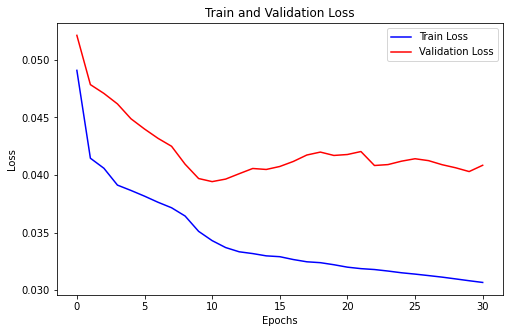


----------------------  All Data --------------------------
Evaluation Time: 8.741026625000814
RMSE: 0.185897 - R2: 0.361088 - MAE: 0.142756 - SMAPE: 107.113779 - PCOR: 0.602885 - F1_MI: 0.698712 - F1_MA: 0.384253 - F1_W: 0.645816


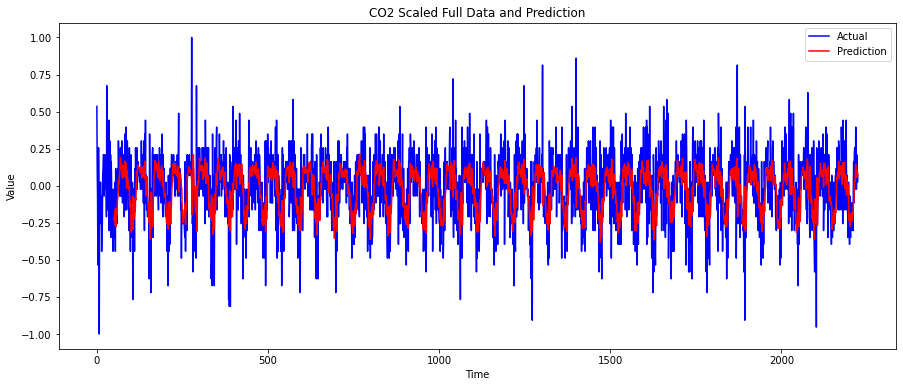

MSE1:  0.034558 RMSE1:  0.185897
RMSE: 0.39968 - R2: 0.361088 - MAE: 0.306925 - SMAPE: 106.845287 - PCOR: 0.602885 - F1_MI: 0.600276 - F1_MA: 0.578022 - F1_W: 0.595988


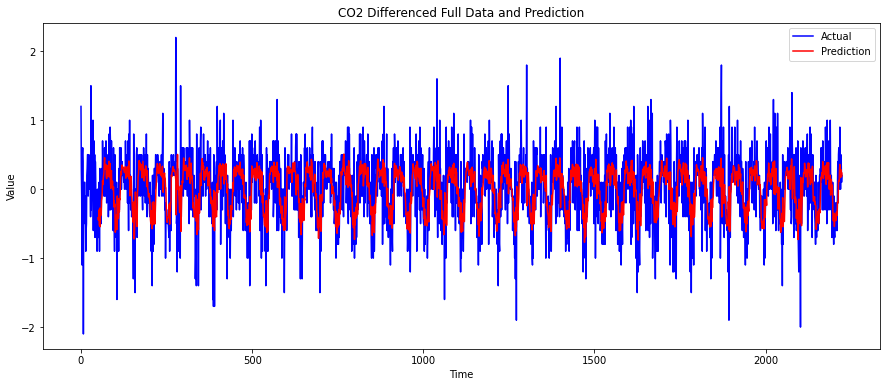

MSE2:  0.159744 RMSE2:  0.39968


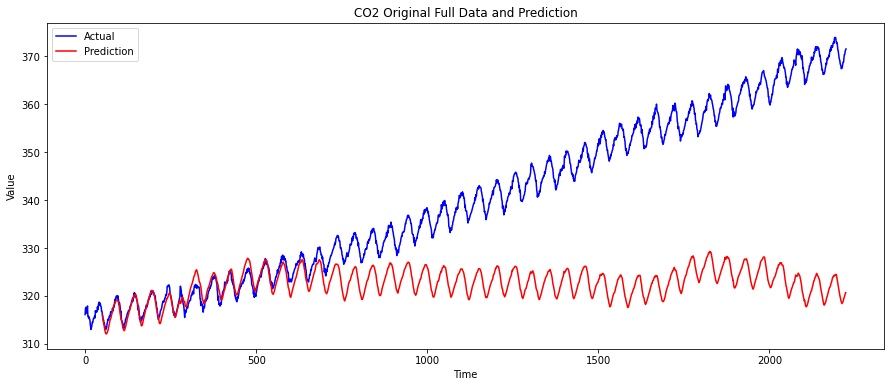

MSE3:  583.605495 RMSE3:  24.157928
RMSE: 24.157928 - R2: -1.069238 - MAE: 18.463874 - SMAPE: 5.451268 - PCOR: 0.358887
----------------------  Train Data --------------------------
Evaluation Time: 6.227796520000993
RMSE: 0.182813 - R2: 0.354517 - MAE: 0.14022 - SMAPE: 106.761676 - PCOR: 0.596937 - F1_MI: 0.704048 - F1_MA: 0.388742 - F1_W: 0.65727


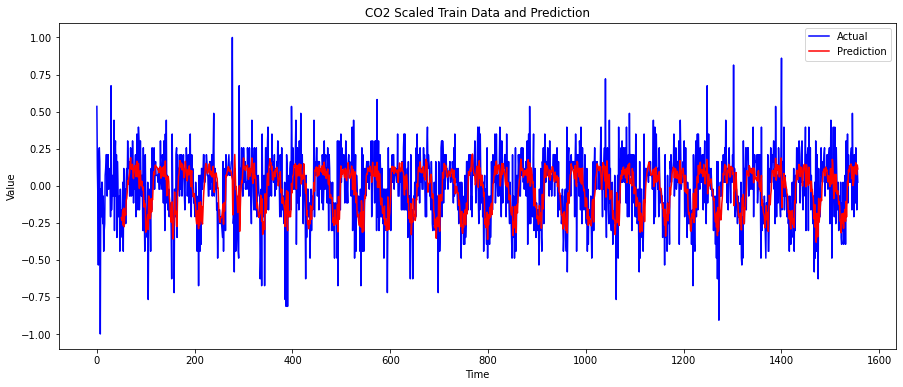

MSE1:  0.03342 RMSE1:  0.182813
RMSE: 0.393047 - R2: 0.354517 - MAE: 0.301472 - SMAPE: 106.537108 - PCOR: 0.596937 - F1_MI: 0.590577 - F1_MA: 0.571533 - F1_W: 0.586192


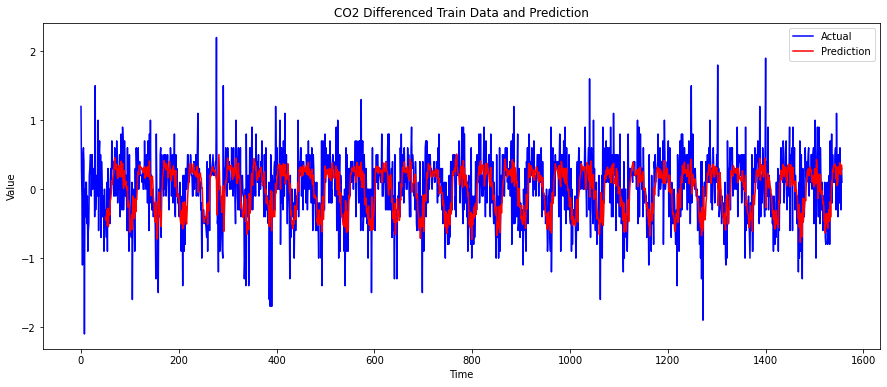

MSE2:  0.154486 RMSE2:  0.393047


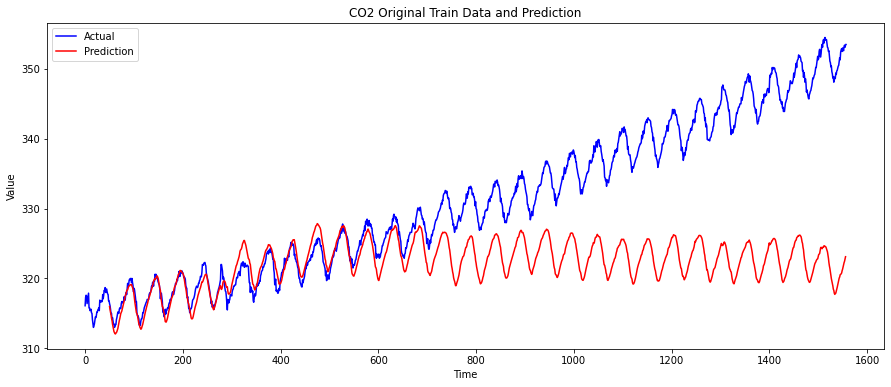

MSE3:  181.480431 RMSE3:  13.471467
RMSE: 13.471467 - R2: -0.572875 - MAE: 9.768997 - SMAPE: 2.942947 - PCOR: 0.450098

----------------------  Validation Data --------------------------
Evaluation Time: 1.3630700029989384
RMSE: 0.198559 - R2: 0.384551 - MAE: 0.154402 - SMAPE: 108.391339 - PCOR: 0.629233 - F1_MI: 0.681682 - F1_MA: 0.388354 - F1_W: 0.610839


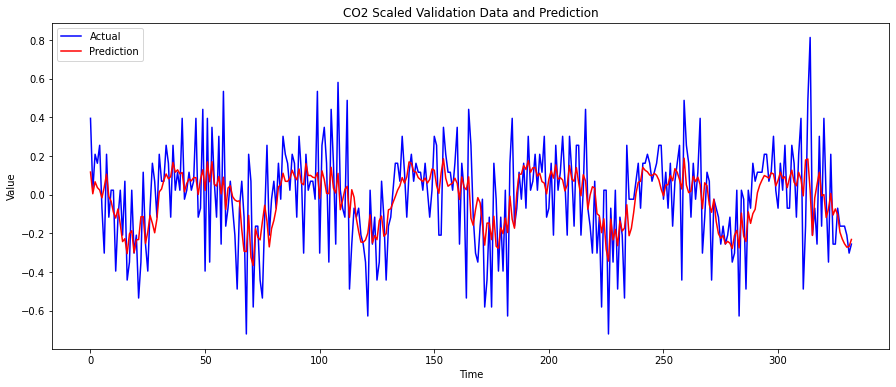

MSE1:  0.039426 RMSE1:  0.198559
RMSE: 0.426902 - R2: 0.384551 - MAE: 0.331965 - SMAPE: 107.672098 - PCOR: 0.629233 - F1_MI: 0.618619 - F1_MA: 0.581047 - F1_W: 0.610821


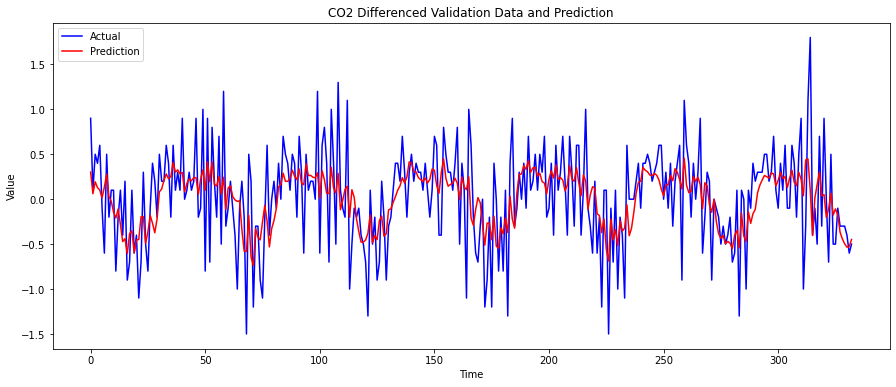

MSE2:  0.182245 RMSE2:  0.426902


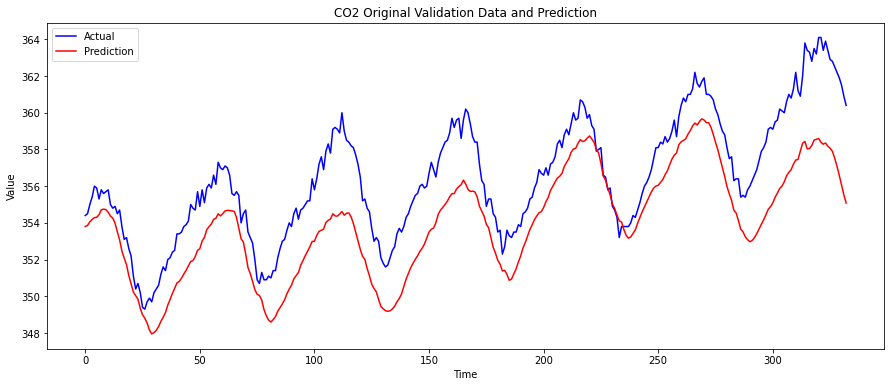

MSE3:  7.73101 RMSE3:  2.780469
RMSE: 2.780469 - R2: 0.272573 - MAE: 2.471074 - SMAPE: 0.694739 - PCOR: 0.918423

----------------------  Test Data --------------------------
Evaluation Time: 1.4055866630005767
RMSE: 0.186645 - R2: 0.361539 - MAE: 0.142587 - SMAPE: 107.428727 - PCOR: 0.608969 - F1_MI: 0.691617 - F1_MA: 0.359342 - F1_W: 0.628371


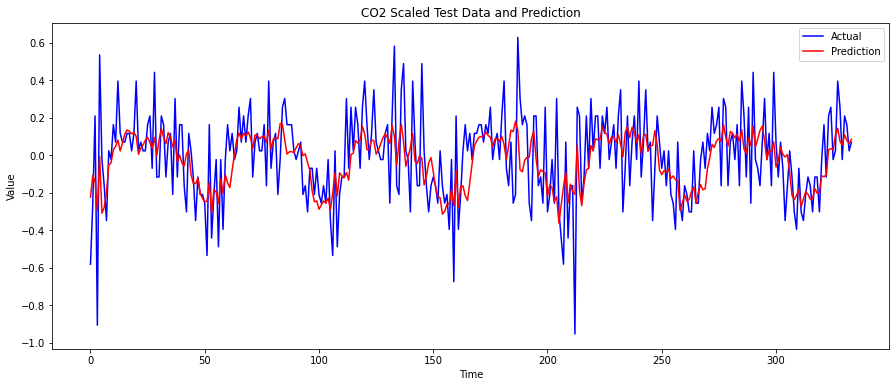

MSE1:  0.034837 RMSE1:  0.186645
RMSE: 0.401288 - R2: 0.361539 - MAE: 0.306562 - SMAPE: 107.411446 - PCOR: 0.608969 - F1_MI: 0.625749 - F1_MA: 0.605547 - F1_W: 0.623583


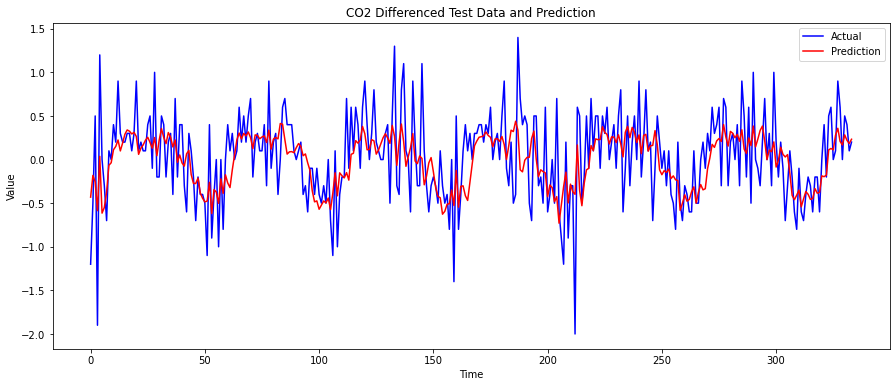

MSE2:  0.161032 RMSE2:  0.401288


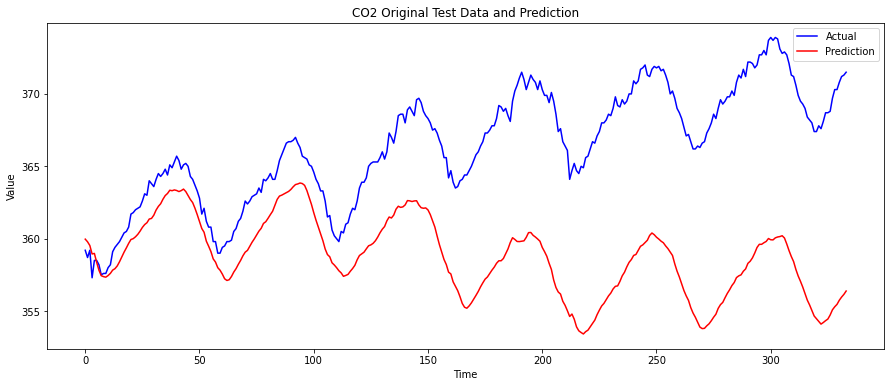

MSE3:  81.362402 RMSE3:  9.020111
RMSE: 9.020111 - R2: -4.332605 - MAE: 7.681929 - SMAPE: 2.115661 - PCOR: -0.029763


In [ ]:
folder = "gru"
fn = "3.. GRU_50_256_0_5"
model_GRU = GRUNet(next(iter(train_loader))[0].shape[2], 256, 1, 1)
optimizer = torch.optim.Adam(model_GRU.parameters(), lr=0.001)

model, train_loss, val_loss  = model_load(fn, model_GRU, optimizer, folder)

print(train_loss, val_loss)

fn = "3.._ GRU_50_256_0_5"
loss_all = load_losses(fn, folder)
train_loss_all = loss_all[0]
val_loss_all = loss_all[1]

#model = model_LSTM

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.array(train_loss_all), 'b', label="Train Loss")
ax.plot(np.array(val_loss_all), 'r' , label="Validation Loss")
plt.legend()
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()

device = torch.device("cpu")
print()
print("----------------------  All Data --------------------------")
data_part = "Full"
all_gru1, all_gru2, all_gru3 = prediction(model, all_data, all_label, all_norm_scaled, all_norm, all, all.values[tw].item(), scaler, tw, 1)
print("----------------------  Train Data --------------------------")
data_part = "Train"
train_gru1, train_gru2, train_gru3 = prediction(model, train_data, train_label, train_norm_scaled, train_norm, train, train.values[tw].item(), scaler, tw, 1)
print()
print("----------------------  Validation Data --------------------------")
data_part = "Validation"
val_gru1, val_gru2, val_gru3 = prediction(model, val_data, val_label, val_norm_scaled, val_norm, val, train.values[-1].item(), scaler, tw, 2)
print()
print("----------------------  Test Data --------------------------")
data_part = "Test"
test_gru1, test_gru2, test_gru3 = prediction(model, test_data, test_label, test_norm_scaled, test_norm, test, val.values[-1].item(), scaler, tw, 2)

0.03011943735157953 0.036119


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


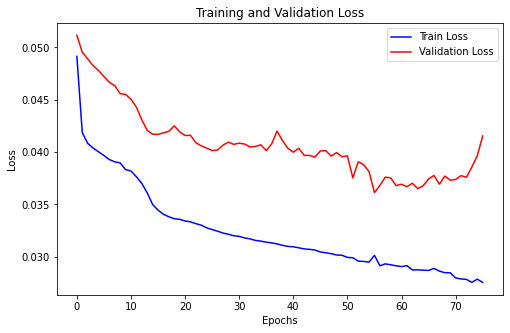


----------------------  All Data --------------------------
Evaluation Time: 8.81862474099944
RMSE: 0.175927 - R2: 0.427786 - MAE: 0.134357 - SMAPE: 100.493246 - PCOR: 0.656486 - F1_MI: 0.705612 - F1_MA: 0.444131 - F1_W: 0.683398


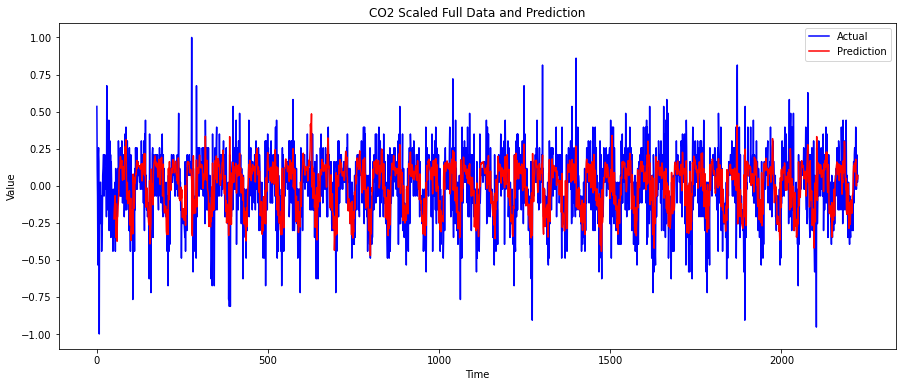

MSE1:  0.03095 RMSE1:  0.175927
RMSE: 0.378243 - R2: 0.427786 - MAE: 0.288867 - SMAPE: 100.801805 - PCOR: 0.656486 - F1_MI: 0.628335 - F1_MA: 0.589419 - F1_W: 0.616895


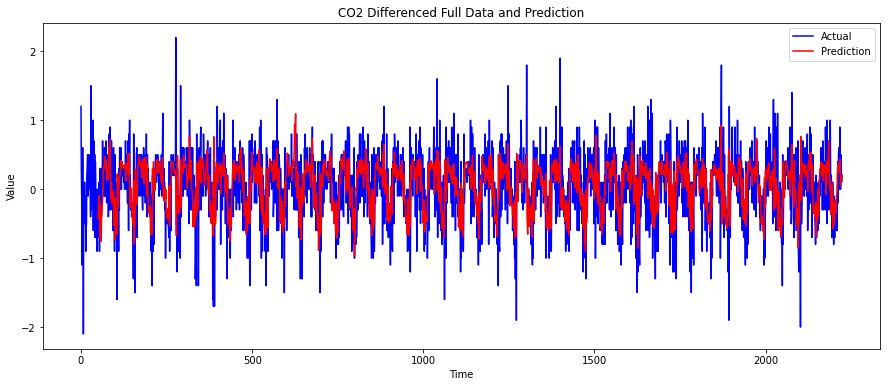

MSE2:  0.143068 RMSE2:  0.378243


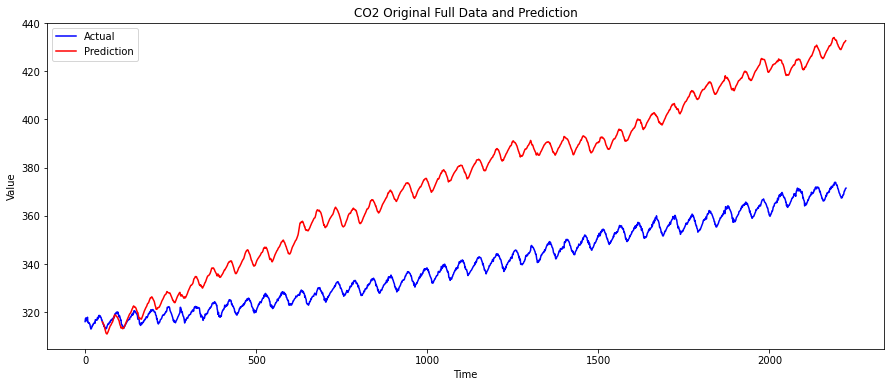

MSE3:  1548.262781 RMSE3:  39.34797
RMSE: 39.34797 - R2: -4.489536 - MAE: 35.608993 - SMAPE: 9.661718 - PCOR: 0.980472
----------------------  Train Data --------------------------
Evaluation Time: 6.104589873000805
RMSE: 0.17187 - R2: 0.429477 - MAE: 0.131775 - SMAPE: 100.103459 - PCOR: 0.657928 - F1_MI: 0.704048 - F1_MA: 0.445697 - F1_W: 0.68649


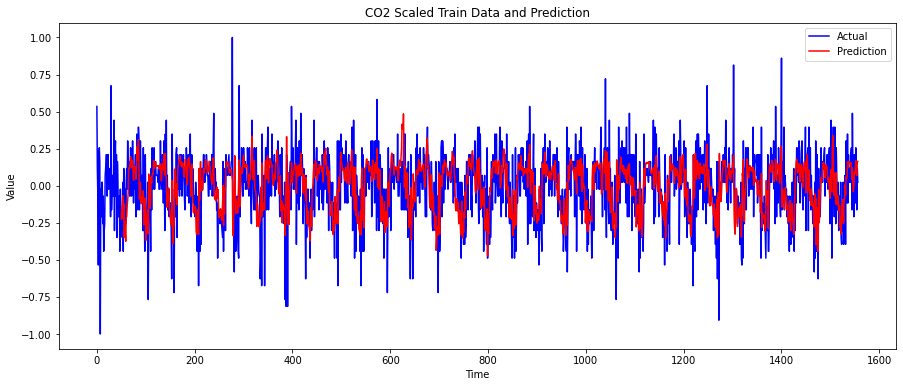

MSE1:  0.029539 RMSE1:  0.17187
RMSE: 0.369521 - R2: 0.429477 - MAE: 0.283316 - SMAPE: 100.67733 - PCOR: 0.657928 - F1_MI: 0.636364 - F1_MA: 0.606187 - F1_W: 0.627306


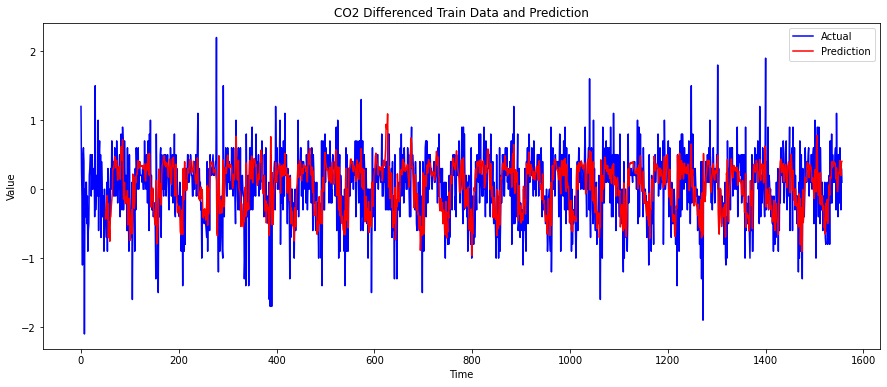

MSE2:  0.136546 RMSE2:  0.369521


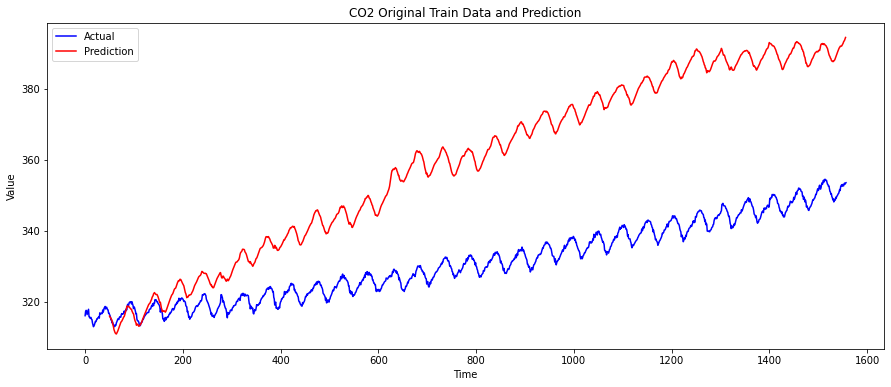

MSE3:  987.068276 RMSE3:  31.417643
RMSE: 31.417643 - R2: -7.554834 - MAE: 28.028458 - SMAPE: 7.929854 - PCOR: 0.963787

----------------------  Validation Data --------------------------
Evaluation Time: 1.401149406001423
RMSE: 0.190051 - R2: 0.436165 - MAE: 0.144479 - SMAPE: 99.377674 - PCOR: 0.669655 - F1_MI: 0.687688 - F1_MA: 0.432588 - F1_W: 0.645885


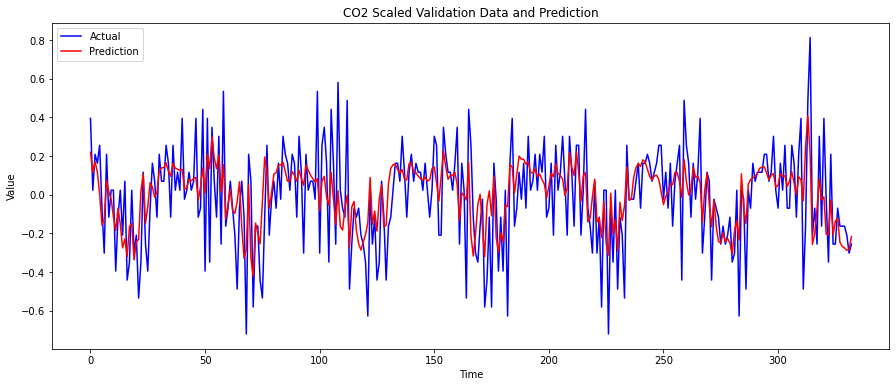

MSE1:  0.036119 RMSE1:  0.190051
RMSE: 0.408609 - R2: 0.436165 - MAE: 0.310629 - SMAPE: 99.418066 - PCOR: 0.669655 - F1_MI: 0.60961 - F1_MA: 0.545218 - F1_W: 0.589601


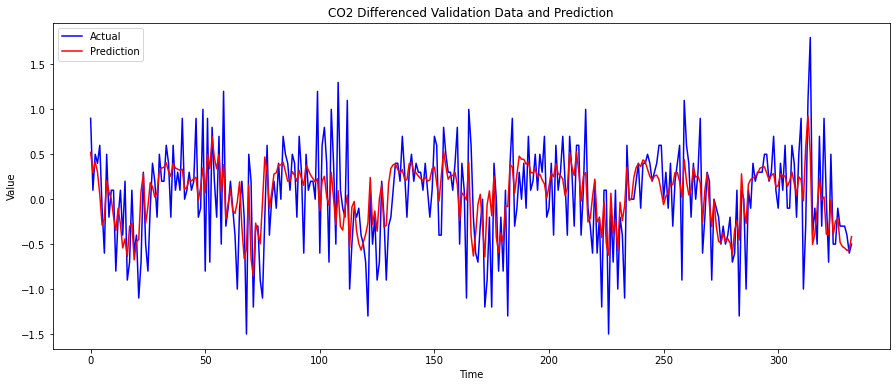

MSE2:  0.166961 RMSE2:  0.408609


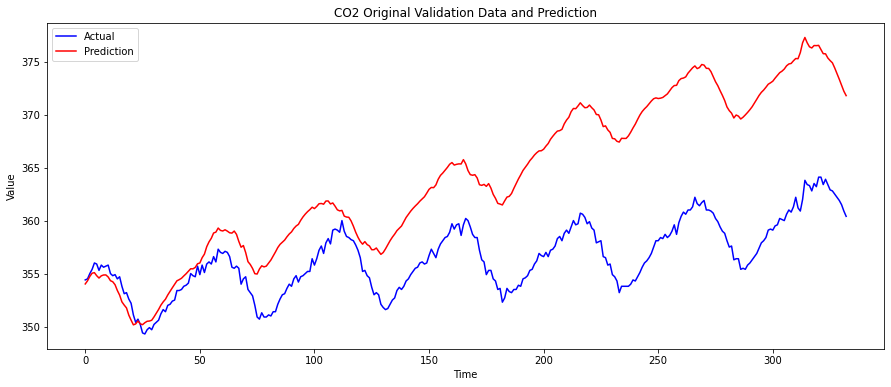

MSE3:  82.054778 RMSE3:  9.058409
RMSE: 9.058409 - R2: -6.720703 - MAE: 7.617614 - SMAPE: 2.098777 - PCOR: 0.816273

----------------------  Test Data --------------------------
Evaluation Time: 1.4108675659990695
RMSE: 0.17934 - R2: 0.410544 - MAE: 0.135912 - SMAPE: 103.364188 - PCOR: 0.643118 - F1_MI: 0.730539 - F1_MA: 0.448816 - F1_W: 0.707305


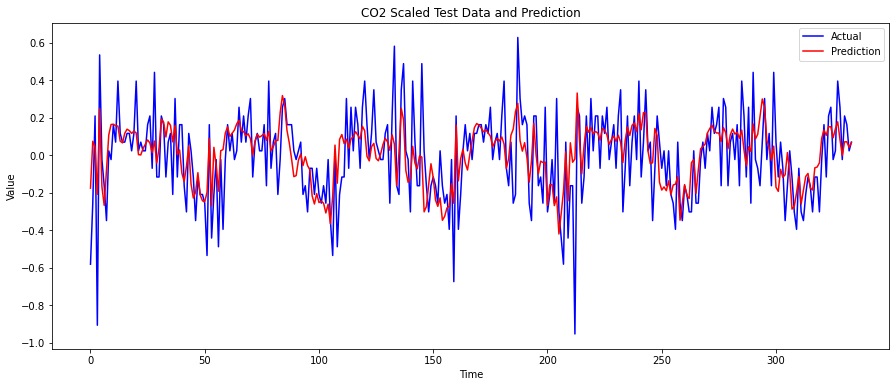

MSE1:  0.032163 RMSE1:  0.17934
RMSE: 0.38558 - R2: 0.410544 - MAE: 0.292211 - SMAPE: 102.743026 - PCOR: 0.643118 - F1_MI: 0.610778 - F1_MA: 0.561969 - F1_W: 0.59539


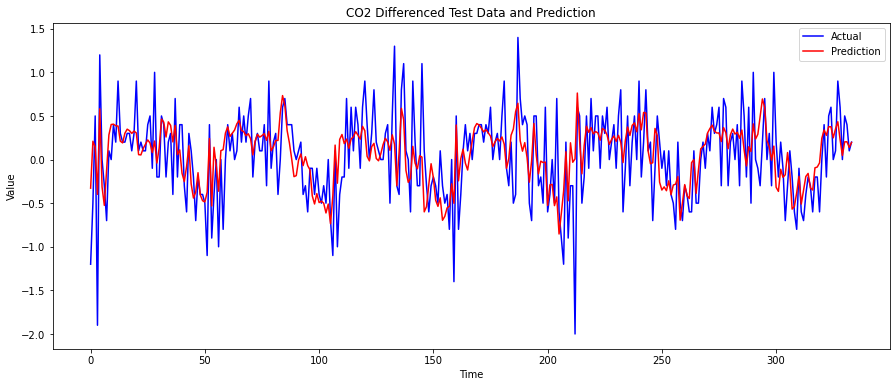

MSE2:  0.148672 RMSE2:  0.38558


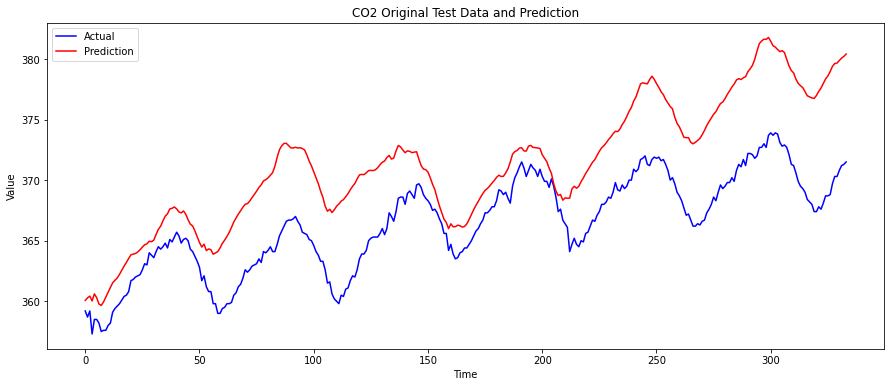

MSE3:  29.526215 RMSE3:  5.433803
RMSE: 5.433803 - R2: -0.935189 - MAE: 4.837314 - SMAPE: 1.307495 - PCOR: 0.888641


In [ ]:
folder = "lstm"
fn = "3.. LSTM_50_256_0_5"
model_LSTM = LSTMNet(next(iter(train_loader))[0].shape[2], 256, 1, 1)
optimizer = torch.optim.Adam(model_LSTM.parameters(), lr=0.001)

model2, train_loss, val_loss  = model_load(fn, model_LSTM, optimizer, folder)

print(train_loss, val_loss)

fn = "3.._ LSTM_50_256_0_5"
loss_all = load_losses(fn, folder)
train_loss_all = loss_all[0]
val_loss_all = loss_all[1]

#model = model_LSTM

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.array(train_loss_all), 'b', label="Train Loss")
ax.plot(np.array(val_loss_all), 'r' , label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()


device = torch.device("cpu")
print()
print("----------------------  All Data --------------------------")
data_part = "Full"
all_lstm1, all_lstm2, all_lstm3 = prediction(model2, all_data, all_label, all_norm_scaled, all_norm, all, all.values[tw].item(), scaler, tw, 1)
print("----------------------  Train Data --------------------------")
data_part = "Train"
train_lstm1, train_lstm2, train_lstm3 =  prediction(model2, train_data, train_label, train_norm_scaled, train_norm, train, train.values[tw].item(), scaler, tw, 1)
print()
print("----------------------  Validation Data --------------------------")
data_part = "Validation"
val_lstm1, val_lstm2, val_lstm3 = prediction(model2, val_data, val_label, val_norm_scaled, val_norm, val, train.values[-1].item(), scaler, tw, 2)
print()
print("----------------------  Test Data --------------------------")
data_part = "Test"
test_lstm1, test_lstm2, test_lstm3 = prediction(model2, test_data, test_label, test_norm_scaled, test_norm, test, val.values[-1].item(), scaler, tw, 2)

In [ ]:
#data_name = "all"
folder = "memevl"
hd = 256
fn = "1.3.. MEM_EVL_60_256_0_5" #124 is the best
model_MEM = MEM(next(iter(train_loader))[0].shape[2], hd, 1, 1)
optimizer = torch.optim.Adam(model_MEM.parameters(), lr=0.000001)


model, train_loss, val_loss, b1, b2, y_pred_all = model_load2(fn, model_MEM, optimizer, folder)
print(train_loss, val_loss)

fn = "1.3.._ MEM_EVL_60_256_0_5"
loss_all = load_losses(fn, folder)
train_loss_all = loss_all[0]
val_loss_all = loss_all[1]


fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.array(train_loss_all), 'b', label="Train Loss")
ax.plot(np.array(val_loss_all), 'r' , label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()

#model = model_LSTM
'''fn = "evl_hiddens7"
index = load_losses(fn, "evl")[0]
S1 = load_losses(fn, "evl")[1]
S2 = load_losses(fn, "evl")[2]
q1 = load_losses(fn, "evl")[3]
q2 = load_losses(fn, "evl")[4]
q = load_losses(fn, "evl")[5]
ext_train_input = TensorDataset(torch.from_numpy(np.asarray(itemgetter(*index)(train_extreme))), torch.from_numpy(np.asarray(itemgetter(*index)(q1_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q2_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q_train))))
ext_train_loader = DataLoader(ext_train_input, shuffle=False, batch_size=1, drop_last=True)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.array(train_loss_all), 'b', label="Train Loss")
ax.plot(np.array(val_loss_all), 'r' , label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()

S1 = S1.view(len(S1[0]), -1, 1).to(device).float()
S2 = S2.view(len(S2[0]), -1, 1).to(device).float()

S1 = S1.transpose(0, 1)
S2 = S2.transpose(0, 1)'''
'''
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

index = random.sample(range(len(train_extreme)), M)
ext_train_input = TensorDataset(torch.from_numpy(np.asarray(itemgetter(*index)(train_extreme))), torch.from_numpy(np.asarray(itemgetter(*index)(q1_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q2_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q_train))))
ext_train_loader = DataLoader(ext_train_input, shuffle=False, batch_size=1, drop_last=False)

hidden_dim = hd
lr = 0.0005
file_name = fn
path = "evl"
S1 = memorize_extreme2(ext_train_loader, lr, tw, "EVL1", path, index, file_name,  hidden_dim=hidden_dim, EPOCHS=5000)
q1 = torch.from_numpy(np.asarray(itemgetter(*index)(q1_train))).to(device).float()

S1 = S1.view(hidden_dim, -1, 1).to(device).float()
S1 = S1.transpose(0, 1)
S1 = S1.detach()
q1 = q1.detach()

index = random.sample(range(len(train_extreme)), M)
ext_train_input = TensorDataset(torch.from_numpy(np.asarray(itemgetter(*index)(train_extreme))), torch.from_numpy(np.asarray(itemgetter(*index)(q1_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q2_train))), torch.from_numpy(np.asarray(itemgetter(*index)(q_train))))
ext_train_loader = DataLoader(ext_train_input, shuffle=False, batch_size=1, drop_last=False)

S2 = memorize_extreme2(ext_train_loader, lr, tw, "EVL2", path, index, file_name,  hidden_dim=hidden_dim, EPOCHS=5000)
q2 = torch.from_numpy(np.asarray(itemgetter(*index)(q2_train))).to(device).float()
#q = torch.from_numpy(np.asarray(itemgetter(*index)(q2_train)))


S2 = S2.view(hidden_dim, -1, 1).to(device).float()              
S2 = S2.transpose(0, 1)
S2 = S2.detach()                  
q2 = q2.detach()'''

device = torch.device("cpu")
print()
print("----------------------  All Data --------------------------")
data_part = "Full"
#all_mem1, all_mem2, all_mem3 = prediction2(model, all_data, all_label, all_q1, all_q2, all_norm_scaled, all_norm, all, all.values[tw].item(), scaler, tw, 1, S1.to(device), S2.to(device), q1.to(device), q2.to(device))
print()
print("----------------------  Train Data --------------------------")
data_part = "Train"
#train_mem1, train_mem2, train_mem3 = prediction2(model, train_data, train_label, train_q1, train_q2, train_norm_scaled, train_norm, train, train.values[tw].item(), scaler, tw, 1, S1.to(device), S2.to(device), q1.to(device), q2.to(device))
print()
print("----------------------  Validation Data --------------------------")
data_part = "Validation"
#val_mem1, val_mem2, val_mem3 = prediction2(model, val_data, val_label, val_q1, val_q2, val_norm_scaled, val_norm, val, train.values[-1].item(), scaler, tw, 2, S1.to(device), S2.to(device), q1.to(device), q2.to(device))
print()
print("----------------------  Test Data --------------------------")
data_part = "Test"
test_mem1, test_mem2, test_mem3 = prediction2(model, test_data, test_label, test_q1, test_q2, test_norm_scaled, test_norm, test, val.values[-1].item(), scaler, tw, 2, S1.to(device), S2.to(device), q1.to(device), q2.to(device))

In [ ]:
folder = "regevl"
fn = "1.1.. MEM_EVL_60_256_0_5"
model_REG = REG2(next(iter(train_loader))[0].shape[2], 256, 1, 1)
optimizer = torch.optim.Adam(model_REG.parameters(), lr=0.001)

model, train_loss, val_loss, b1, b2, y_pred_all = model_load2(fn, model_REG, optimizer, folder)
#print(train_loss, val_loss[0])

fn = "1.1.._ MEM_EVL_60_256_0_5"
loss_all = load_losses(fn, folder)
train_loss_all = loss_all[0]
val_loss_all = loss_all[1]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.array(train_loss_all), 'b', label="Train Loss")
ax.plot(np.array(val_loss_all), 'r' , label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()

lr = 0.0001

device = torch.device("cuda")
print()
print("----------------------  All Data --------------------------")
data_part = "Full"
#all_reg1, all_reg2, all_reg3 = prediction4(model, all_data, all_label, all_q1, all_q2, all_norm_scaled, all_norm, all, all.values[tw].item(), scaler, tw, 1) #Ayrı 2 CL yarattığım senaryo - 3-4 Pseudo data
print("----------------------  Train Data --------------------------")
data_part = "Train"
#train_reg1, train_reg2, train_reg3 = prediction4(model, train_data, train_label, train_q1, train_q2, train_norm_scaled, train_norm, train, train.values[tw].item(), scaler, tw, 1)
print()
print("----------------------  Validation Data --------------------------")
data_part = "Validation"
#val_reg1, val_reg2, val_reg3 = prediction4(model, val_data, val_label, val_q1, val_q2, val_norm_scaled, val_norm, val, train.values[-1].item(), scaler, tw, 2)
print()
print("----------------------  Test Data --------------------------")
data_part = "Test"
test_reg1, test_reg2, test_reg3 = prediction4(model, test_data, test_label, test_q1, test_q2, test_norm_scaled, test_norm, test, val.values[-1].item(), scaler, tw, 2)

In [ ]:
folder = "evl"
fn = "135._ MEM_EVL_50_256_0_5"
model_REG = REG2(next(iter(train_loader))[0].shape[2], 256, 1, 1)
optimizer = torch.optim.Adam(model_REG.parameters(), lr=0.001)

model, train_loss, val_loss, b1, b2, y_pred_all = model_load2(fn, model_REG, optimizer, folder)
#print(train_loss, val_loss[0])

fn = "135._ MEM_EVL_50_256_0_5"
loss_all = load_losses(fn, folder)
train_loss_all = loss_all[0]
val_loss_all = loss_all[1]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.array(train_loss_all), 'b', label="Train Loss")
ax.plot(np.array(val_loss_all), 'r' , label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()


device = torch.device("cuda")
print()
print("----------------------  All Data --------------------------")
prediction4(model, all_data, all_label, all_q1, all_q2, all_norm_scaled, all_norm, all, all.values[tw].item(), scaler, tw, 3) #Ayrı 2 CL yarattığım senaryo - 3-4 Pseudo data
print("----------------------  Train Data --------------------------")
prediction4(model, train_data, train_label, train_q1, train_q2, train_norm_scaled, train_norm, train, train.values[tw].item(), scaler, tw, 3)
print()
print("----------------------  Validation Data --------------------------")
prediction4(model, val_data, val_label, val_q1, val_q2, val_norm_scaled, val_norm, val, train.values[-1].item(), scaler, tw, 4)
print()
print("----------------------  Test Data --------------------------")
prediction4(model, test_data, test_label, test_q1, test_q2, test_norm_scaled, test_norm, test, val.values[-1].item(), scaler, tw, 4)

### N-Beats


In [ ]:
import pickle
import random
from time import time
from typing import Union

import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.nn.functional import mse_loss, l1_loss, binary_cross_entropy, cross_entropy
from torch.optim import Optimizer


class NBeatsNet(nn.Module):
    SEASONALITY_BLOCK = 'seasonality'
    TREND_BLOCK = 'trend'
    GENERIC_BLOCK = 'generic'

    def __init__(self,
                 device=torch.device('cpu'),
                 stack_types=(TREND_BLOCK, SEASONALITY_BLOCK),
                 nb_blocks_per_stack=6,
                 forecast_length=1,
                 backcast_length=52,
                 thetas_dim=(4, 8),
                 share_weights_in_stack=False,
                 hidden_layer_units=256,
                 nb_harmonics=None):
        super(NBeatsNet, self).__init__()
        self.forecast_length = forecast_length
        self.backcast_length = backcast_length
        self.hidden_layer_units = hidden_layer_units
        self.nb_blocks_per_stack = nb_blocks_per_stack
        self.share_weights_in_stack = share_weights_in_stack
        self.nb_harmonics = nb_harmonics
        self.stack_types = stack_types
        self.stacks = []
        self.thetas_dim = thetas_dim
        self.parameters = []
        self.device = device
        print('| N-Beats')
        for stack_id in range(len(self.stack_types)):
            self.stacks.append(self.create_stack(stack_id))
        self.parameters = nn.ParameterList(self.parameters)
        self.to(self.device)
        self._loss = None
        self._opt = None

    def create_stack(self, stack_id):
        stack_type = self.stack_types[stack_id]
        print(f'| --  Stack {stack_type.title()} (#{stack_id}) (share_weights_in_stack={self.share_weights_in_stack})')
        blocks = []
        for block_id in range(self.nb_blocks_per_stack):
            block_init = NBeatsNet.select_block(stack_type)
            if self.share_weights_in_stack and block_id != 0:
                block = blocks[-1]  # pick up the last one when we share weights.
            else:
                block = block_init(self.hidden_layer_units, self.thetas_dim[stack_id],
                                   self.device, self.backcast_length, self.forecast_length, self.nb_harmonics)
                self.parameters.extend(block.parameters())
            print(f'     | -- {block}')
            blocks.append(block)
        return blocks

    def save(self, filename: str):
        torch.save(self, filename)

    @staticmethod
    def load(f, map_location=None, pickle_module=pickle, **pickle_load_args):
        return torch.load(f, map_location, pickle_module, **pickle_load_args)

    @staticmethod
    def select_block(block_type):
        if block_type == NBeatsNet.SEASONALITY_BLOCK:
            return SeasonalityBlock
        elif block_type == NBeatsNet.TREND_BLOCK:
            return TrendBlock
        else:
            return GenericBlock

    def compile(self, loss: str, optimizer: Union[str, Optimizer]):
        if loss == 'mae':
            loss_ = l1_loss
        elif loss == 'mse':
            loss_ = mse_loss
        elif loss == 'cross_entropy':
            loss_ = cross_entropy
        elif loss == 'binary_crossentropy':
            loss_ = binary_cross_entropy
        else:
            raise ValueError(f'Unknown loss name: {loss}.')
        # noinspection PyArgumentList
        if isinstance(optimizer, str):
            if optimizer == 'adam':
                opt_ = optim.Adam
            elif optimizer == 'sgd':
                opt_ = optim.SGD
            elif optimizer == 'rmsprop':
                opt_ = optim.RMSprop
            else:
                raise ValueError(f'Unknown opt name: {optimizer}.')
            opt_ = opt_(lr=1e-4, params=self.parameters())
        else:
            opt_ = optimizer
        self._opt = opt_
        self._loss = loss_

    def fit(self, x_train, y_train, validation_data=True, epochs=10, batch_size=32):

        def split(arr, size):
            arrays = []
            while len(arr) > size:
                slice_ = arr[:size]
                arrays.append(slice_)
                arr = arr[size:]
            arrays.append(arr)
            return arrays

        train_loss_all = []
        test_loss_all = []

        for epoch in range(epochs):
            x_train_list = split(x_train, batch_size)
            y_train_list = split(y_train, batch_size)
            assert len(x_train_list) == len(y_train_list)
            shuffled_indices = list(range(len(x_train_list)))
            random.shuffle(shuffled_indices)
            self.train()
            train_loss = []
            timer = time()
            for batch_id in shuffled_indices:
                batch_x, batch_y = x_train_list[batch_id], y_train_list[batch_id]
                self._opt.zero_grad()
                _, forecast = self(torch.tensor(batch_x, dtype=torch.float).to(self.device))
                loss = self._loss(forecast, squeeze_last_dim(torch.tensor(batch_y, dtype=torch.float).to(self.device)))
                train_loss.append(loss.item())
                loss.backward()
                self._opt.step()
            elapsed_time = time() - timer
            train_loss = np.mean(train_loss)

            test_loss = '[undefined]'
            if validation_data is not None:
                x_test, y_test = validation_data
                self.eval()
                _, forecast = self(torch.tensor(x_test, dtype=torch.float).to(self.device))
                test_loss = self._loss(forecast, squeeze_last_dim(torch.tensor(y_test, dtype=torch.float))).item()

                test_loss_all.append(test_loss)

            num_samples = len(x_train_list)
            time_per_step = int(elapsed_time / num_samples * 1000)
            print(f'Epoch {str(epoch + 1).zfill(len(str(epochs)))}/{epochs}')
            print(f'{num_samples}/{num_samples} [==============================] - '
                  f'{int(elapsed_time)}s {time_per_step}ms/step - '
                  f'loss: {train_loss:.4f} - val_loss: {test_loss:.4f}')

            if (min(test_loss_all) < test_loss):

                k += 1
                print("k: ",k)

            else:

                k = 0  
                self.save('3. nbeats_' + data_name + '.th')
                #file_name = "1. nbeats" + "_" + data_name
                #model_save(self, self._opt, file_name, epoch, train_loss, test_loss, "nbeats")  
                

            if (k == 100 or epochs == epoch+1):

                file_name = "3._ nbeats" + "_" + data_name
                #model_save(self, self._opt, file_name, epoch, train_loss, test_loss, "nbeats") 
                self.save('3. nbeats__' + data_name + '.th')
                save_losses(train_loss_all, test_loss_all, file_name, "nbeats")
                break

    def predict(self, x, return_backcast=False):
        self.eval()
        b, f = self(torch.tensor(x, dtype=torch.float).to(self.device))
        b, f = b.detach().numpy(), f.detach().numpy()
        if len(x.shape) == 3:
            b = np.expand_dims(b, axis=-1)
            f = np.expand_dims(f, axis=-1)
        if return_backcast:
            return b
        return f

    def forward(self, backcast):
        backcast = squeeze_last_dim(backcast)
        forecast = torch.zeros(size=(backcast.size()[0], self.forecast_length,))  # maybe batch size here.
        for stack_id in range(len(self.stacks)):
            for block_id in range(len(self.stacks[stack_id])):
                b, f = self.stacks[stack_id][block_id](backcast)
                backcast = backcast.to(self.device) - b
                forecast = forecast.to(self.device) + f
        return backcast, forecast


def squeeze_last_dim(tensor):
    if len(tensor.shape) == 3 and tensor.shape[-1] == 1:  # (128, 10, 1) => (128, 10).
        return tensor[..., 0]
    return tensor


def seasonality_model(thetas, t, device):
    p = thetas.size()[-1]
    assert p <= thetas.shape[1], 'thetas_dim is too big.'
    p1, p2 = (p // 2, p // 2) if p % 2 == 0 else (p // 2, p // 2 + 1)
    s1 = torch.tensor([np.cos(2 * np.pi * i * t) for i in range(p1)]).float()  # H/2-1
    s2 = torch.tensor([np.sin(2 * np.pi * i * t) for i in range(p2)]).float()
    S = torch.cat([s1, s2])
    return thetas.mm(S.to(device))


def trend_model(thetas, t, device):
    p = thetas.size()[-1]
    assert p <= 4, 'thetas_dim is too big.'
    T = torch.tensor([t ** i for i in range(p)]).float()
    return thetas.mm(T.to(device))


def linear_space(backcast_length, forecast_length):
    ls = np.arange(-backcast_length, forecast_length, 1) / forecast_length
    b_ls = ls[:backcast_length]
    f_ls = ls[backcast_length:]
    return b_ls, f_ls


class Block(nn.Module):

    def __init__(self, units, thetas_dim, device, backcast_length=52, forecast_length=1, share_thetas=False,
                nb_harmonics=None):
        super(Block, self).__init__()
        self.units = units
        self.thetas_dim = thetas_dim
        self.backcast_length = backcast_length
        self.forecast_length = forecast_length
        self.share_thetas = share_thetas
        self.fc1 = nn.Linear(backcast_length, units)
        self.fc2 = nn.Linear(units, units)
        self.fc3 = nn.Linear(units, units)
        self.fc4 = nn.Linear(units, units)
        self.device = device
        self.backcast_linspace, self.forecast_linspace = linear_space(backcast_length, forecast_length)
        if share_thetas:
            self.theta_f_fc = self.theta_b_fc = nn.Linear(units, thetas_dim, bias=False)
        else:
            self.theta_b_fc = nn.Linear(units, thetas_dim, bias=False)
            self.theta_f_fc = nn.Linear(units, thetas_dim, bias=False)

    def forward(self, x):
        x = squeeze_last_dim(x)
        x = F.relu(self.fc1(x.to(self.device)))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return x

    def __str__(self):
        block_type = type(self).__name__
        return f'{block_type}(units={self.units}, thetas_dim={self.thetas_dim}, ' \
              f'backcast_length={self.backcast_length}, forecast_length={self.forecast_length}, ' \
              f'share_thetas={self.share_thetas}) at @{id(self)}'


class SeasonalityBlock(Block):

    def __init__(self, units, thetas_dim, device, backcast_length=52, forecast_length=1, nb_harmonics=None):
        if nb_harmonics:
            super(SeasonalityBlock, self).__init__(units, nb_harmonics, device, backcast_length,
                                                  forecast_length, share_thetas=True)
        else:
            super(SeasonalityBlock, self).__init__(units, forecast_length, device, backcast_length,
                                                  forecast_length, share_thetas=True)

    def forward(self, x):
        x = super(SeasonalityBlock, self).forward(x)
        backcast = seasonality_model(self.theta_b_fc(x), self.backcast_linspace, self.device)
        forecast = seasonality_model(self.theta_f_fc(x), self.forecast_linspace, self.device)
        return backcast, forecast


class TrendBlock(Block):

    def __init__(self, units, thetas_dim, device, backcast_length=52, forecast_length=1, nb_harmonics=None):
        super(TrendBlock, self).__init__(units, thetas_dim, device, backcast_length,
                                        forecast_length, share_thetas=True)

    def forward(self, x):
        x = super(TrendBlock, self).forward(x)
        backcast = trend_model(self.theta_b_fc(x), self.backcast_linspace, self.device)
        forecast = trend_model(self.theta_f_fc(x), self.forecast_linspace, self.device)
        return backcast, forecast


class GenericBlock(Block):

    def __init__(self, units, thetas_dim, device, backcast_length=52, forecast_length=1, nb_harmonics=None):
        super(GenericBlock, self).__init__(units, thetas_dim, device, backcast_length, forecast_length)

        self.backcast_fc = nn.Linear(thetas_dim, backcast_length)
        self.forecast_fc = nn.Linear(thetas_dim, forecast_length)

    def forward(self, x):
        # no constraint for generic arch.
        x = super(GenericBlock, self).forward(x)

        theta_b = F.relu(self.theta_b_fc(x))
        theta_f = F.relu(self.theta_f_fc(x))

        backcast = self.backcast_fc(theta_b)  # generic. 3.3.
        forecast = self.forecast_fc(theta_f)  # generic. 3.3.

        return backcast, forecast

In [ ]:
model_pytorch = NBeatsNet(backcast_length=50, forecast_length=1,
                                  stack_types=(NBeatsNet.GENERIC_BLOCK,  NBeatsNet.GENERIC_BLOCK),
                                  nb_blocks_per_stack=6, thetas_dim=(8, 8), share_weights_in_stack=True,
                                  hidden_layer_units=256)

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=True)
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=50, forecast_length=1, share_thetas=False) at @139891725269136
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=50, forecast_length=1, share_thetas=False) at @139891725269136
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=50, forecast_length=1, share_thetas=False) at @139891725269136
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=50, forecast_length=1, share_thetas=False) at @139891725269136
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=50, forecast_length=1, share_thetas=False) at @139891725269136
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=50, forecast_length=1, share_thetas=False) at @139891725269136
| --  Stack Generic (#1) (share_weights_in_stack=True)
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=50, forecast_length=1, share_thetas=False) at @1398917

In [ ]:
model_pytorch.compile(loss='mse', optimizer='adam')

In [ ]:
model_pytorch.fit(train_data, train_label.reshape(-1,1,1), validation_data=(val_data, val_label.reshape(-1,1,1)), epochs=1000, batch_size=128)

Epoch 0001/1000
12/12 [==============================] - 0s 28ms/step - loss: 0.0506 - val_loss: 0.0579
Epoch 0002/1000
12/12 [==============================] - 0s 29ms/step - loss: 0.0448 - val_loss: 0.0514
Epoch 0003/1000
12/12 [==============================] - 0s 28ms/step - loss: 0.0403 - val_loss: 0.0475
Epoch 0004/1000
12/12 [==============================] - 0s 29ms/step - loss: 0.0381 - val_loss: 0.0463
Epoch 0005/1000
12/12 [==============================] - 0s 28ms/step - loss: 0.0368 - val_loss: 0.0461
Epoch 0006/1000
12/12 [==============================] - 0s 29ms/step - loss: 0.0359 - val_loss: 0.0449
Epoch 0007/1000
12/12 [==============================] - 0s 29ms/step - loss: 0.0350 - val_loss: 0.0448
Epoch 0008/1000
12/12 [==============================] - 0s 28ms/step - loss: 0.0342 - val_loss: 0.0437
Epoch 0009/1000
12/12 [==============================] - 0s 29ms/step - loss: 0.0334 - val_loss: 0.0434
Epoch 0010/1000
12/12 [==============================] - 0s 30ms

In [ ]:
model_pytorch2 = NBeatsNet.load('3. nbeats_' + data_name + '.th')

In [ ]:
os.getcwd()

'/content/gdrive/My Drive/MasterThesis/data'

Text(0, 0.5, 'Value')

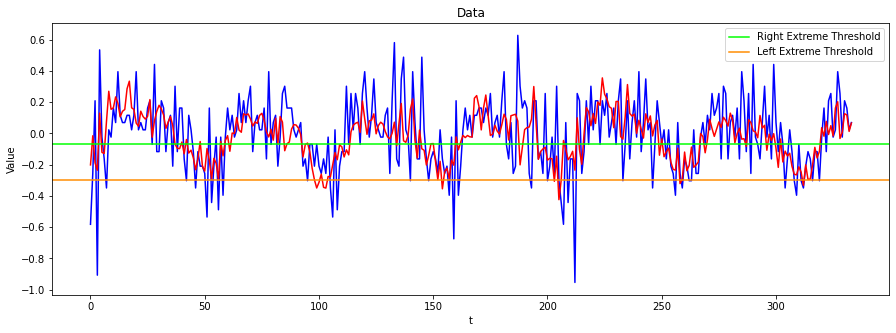

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
ax.plot(test_norm_scaled,'b')
ax.plot(predictions_pytorch_forecast.reshape(-1),'r')
plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.legend()
plt.title('Data')
plt.xlabel('t')
plt.ylabel("Value")

RMSE: 0.17649899423122406 - R2: 0.424059 - MAE: 0.133744 - SMAPE: 101.172968 - PCOR: 0.652111 - F1_MI: 0.712052 - F1_MA: 0.543361 - F1_W: 0.701232
RMSE: 0.166806 - R2: 0.462602 - MAE: 0.126139 - SMAPE: 98.664229 - PCOR: 0.682882 - F1_MI: 0.7286 - F1_MA: 0.565386 - F1_W: 0.719277
RMSE: 0.204279 - R2: 0.348578 - MAE: 0.156227 - SMAPE: 106.077195 - PCOR: 0.590465 - F1_MI: 0.663664 - F1_MA: 0.469193 - F1_W: 0.643497
RMSE: 0.18873 - R2: 0.347197 - MAE: 0.145644 - SMAPE: 107.602795 - PCOR: 0.590716 - F1_MI: 0.685629 - F1_MA: 0.531027 - F1_W: 0.677564


Text(0, 0.5, 'Value')

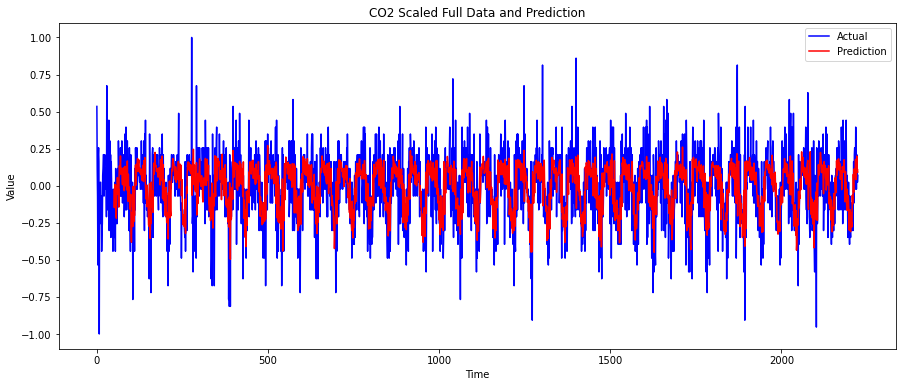

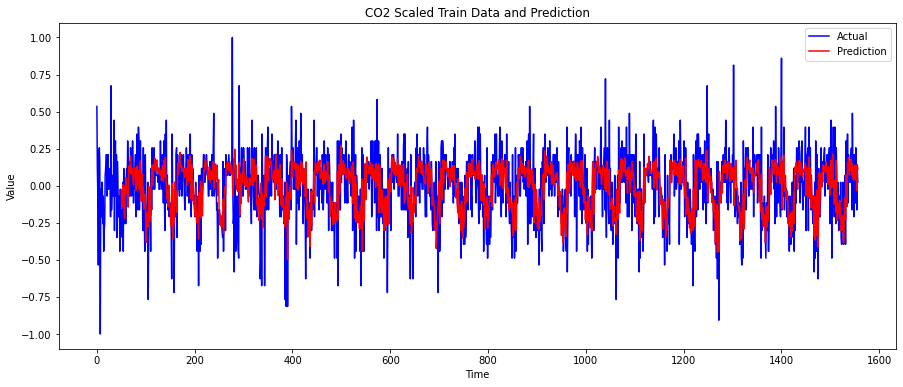

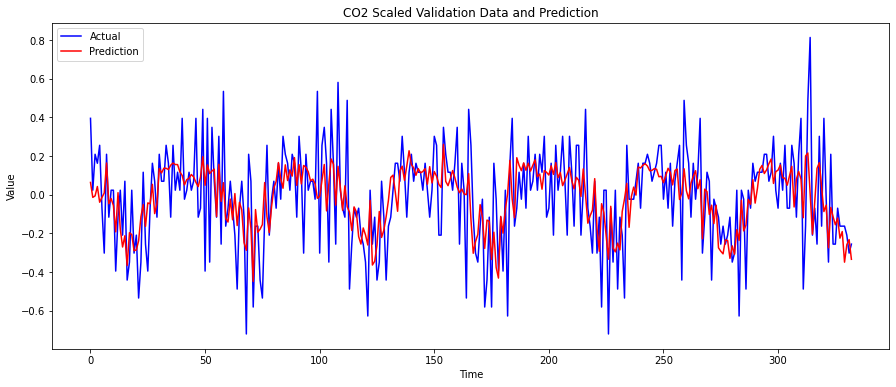

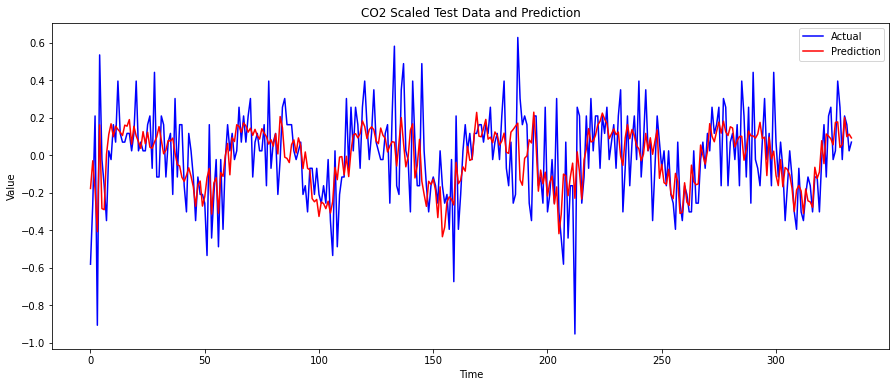

In [ ]:
tw = 50
predictions_pytorch_forecast = model_pytorch2.predict(all_data)

targets = all_norm_scaled[tw:]
outputs = predictions_pytorch_forecast

real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Full"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE[0], R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

pred2 = predictions_pytorch_forecast
pred2_df = pd.DataFrame(pred2)
pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)

plt.plot(all_norm_scaled, 'b', label="Actual")
plt.plot(pred2_df, 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

predictions_pytorch_forecast = model_pytorch2.predict(train_data)
targets = train_norm_scaled[tw:]
outputs = predictions_pytorch_forecast

real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Train"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE[0][0], R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

pred2 = predictions_pytorch_forecast
pred2_df = pd.DataFrame(pred2.reshape(-1, 1))
pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)

plt.plot(train_norm_scaled, 'b', label="Actual")
plt.plot(pred2_df, 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

tw = 100
predictions_pytorch_forecast = model_pytorch2.predict(val_data)
targets = val_norm_scaled
outputs = predictions_pytorch_forecast

real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Validation"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE[0][0], R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

plt.plot(val_norm_scaled, 'b', label="Actual")
plt.plot(predictions_pytorch_forecast.reshape(-1), 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')


tw = 100
predictions_pytorch_forecast = model_pytorch2.predict(test_data)
targets = test_norm_scaled
outputs = predictions_pytorch_forecast

real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Test"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(RMSE[0][0], R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

plt.plot(test_norm_scaled, 'b', label="Actual")
plt.plot(predictions_pytorch_forecast.reshape(-1), 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

RMSE: 0.3794730007648468 - R2: 0.424059 - MAE: 0.28755 - SMAPE: 100.943248 - PCOR: 0.652111 - F1_MI: 0.684913 - F1_MA: 0.554328 - F1_W: 0.678599
RMSE: 0.35863301157951355 - R2: 0.462602 - MAE: 0.271199 - SMAPE: 98.628059 - PCOR: 0.682882 - F1_MI: 0.699403 - F1_MA: 0.566306 - F1_W: 0.691101
RMSE: 0.4392000138759613 - R2: 0.348578 - MAE: 0.335887 - SMAPE: 105.155714 - PCOR: 0.590465 - F1_MI: 0.651652 - F1_MA: 0.528636 - F1_W: 0.639917
RMSE: 0.4057700037956238 - R2: 0.347197 - MAE: 0.313134 - SMAPE: 107.189476 - PCOR: 0.590716 - F1_MI: 0.652695 - F1_MA: 0.526603 - F1_W: 0.661769


Text(0, 0.5, 'Value')

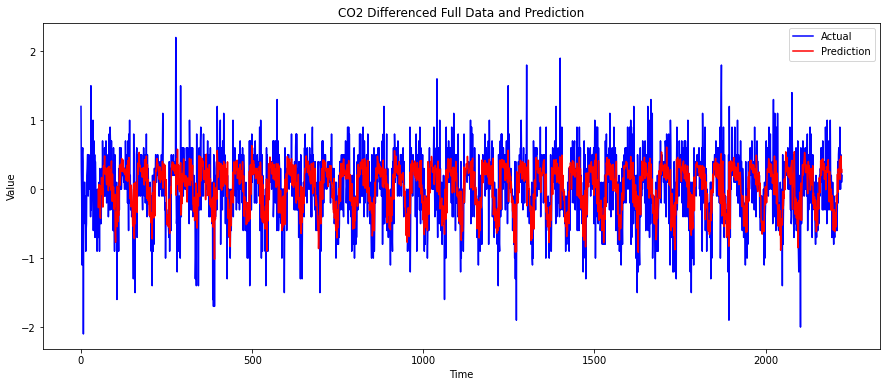

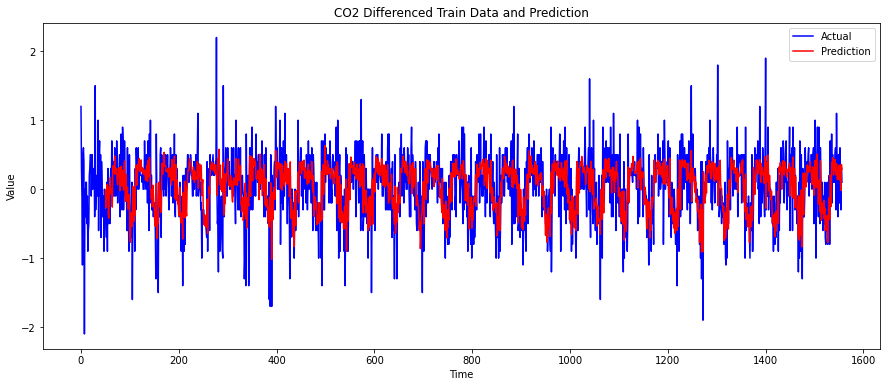

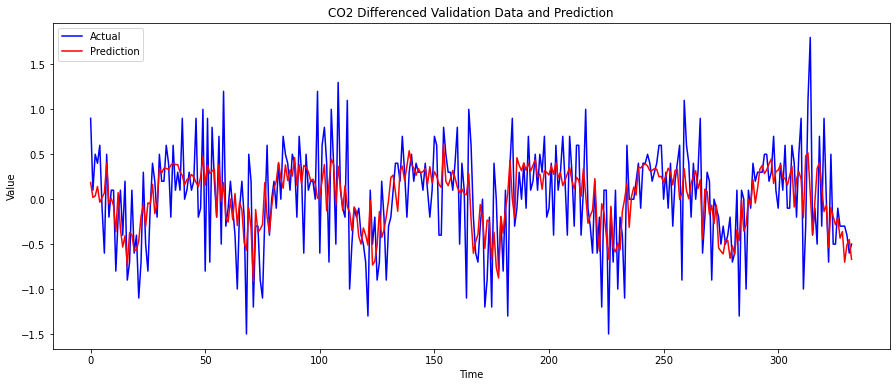

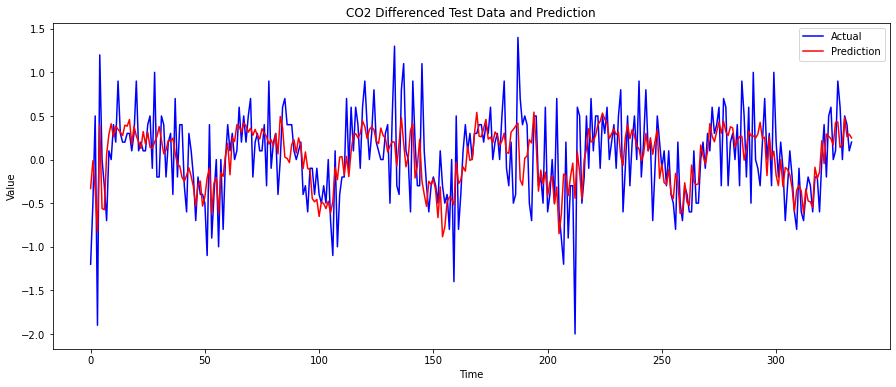

In [ ]:
tw = 50
predictions_pytorch_forecast = model_pytorch2.predict(all_data)

targets = all_norm[tw:]
outputs = scaler.inverse_transform(np.array(predictions_pytorch_forecast).reshape(-1, 1))

real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Full"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

pred2 = outputs
pred2_df = pd.DataFrame(pred2)
pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)

plt.plot(all_norm, 'b', label="Actual")
plt.plot(pred2_df, 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

predictions_pytorch_forecast = model_pytorch2.predict(train_data)
targets = train_norm[tw:]
outputs = scaler.inverse_transform(np.array(predictions_pytorch_forecast).reshape(-1, 1))

real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Train"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

pred2 = outputs
pred2_df = pd.DataFrame(pred2.reshape(-1, 1))
pred2_df.index = pd.RangeIndex(start=tw, stop=(len(pred2_df)+tw), step=1)

plt.plot(train_norm, 'b', label="Actual")
plt.plot(pred2_df, 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

tw = 100
predictions_pytorch_forecast = model_pytorch2.predict(val_data)
targets = val_norm
outputs = scaler.inverse_transform(np.array(predictions_pytorch_forecast).reshape(-1, 1))

real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Validation"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

plt.plot(val_norm, 'b', label="Actual")
plt.plot(outputs.reshape(-1), 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')


tw = 100
predictions_pytorch_forecast = model_pytorch2.predict(test_data)
targets = test_norm
outputs = scaler.inverse_transform(np.array(predictions_pytorch_forecast).reshape(-1, 1))

real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Test"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

plt.plot(test_norm, 'b', label="Actual")
plt.plot(outputs.reshape(-1), 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Differenced ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

RMSE: 341.080566 - R2: -411.481947 - MAE: 340.66619 - SMAPE: 199.819296 - PCOR: -0.034533
RMSE: 331.652724 - R2: -952.304199 - MAE: 331.478319 - SMAPE: 199.813052 - PCOR: -0.026531
RMSE: 2.72139 - R2: 0.303157 - MAE: 2.178186 - SMAPE: 0.606778 - PCOR: 0.912326
RMSE: 2.20752 - R2: 0.680607 - MAE: 1.922515 - SMAPE: 0.524524 - PCOR: 0.884503


Text(0, 0.5, 'Value')

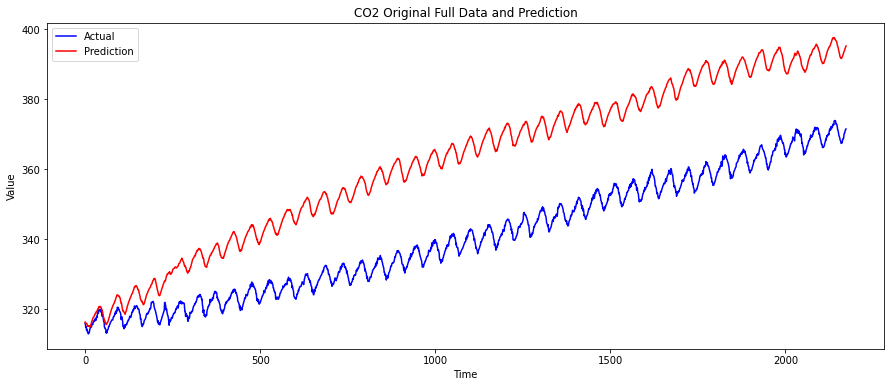

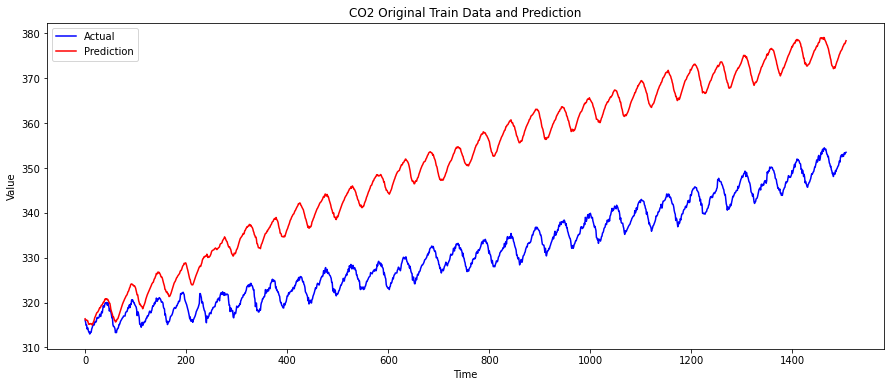

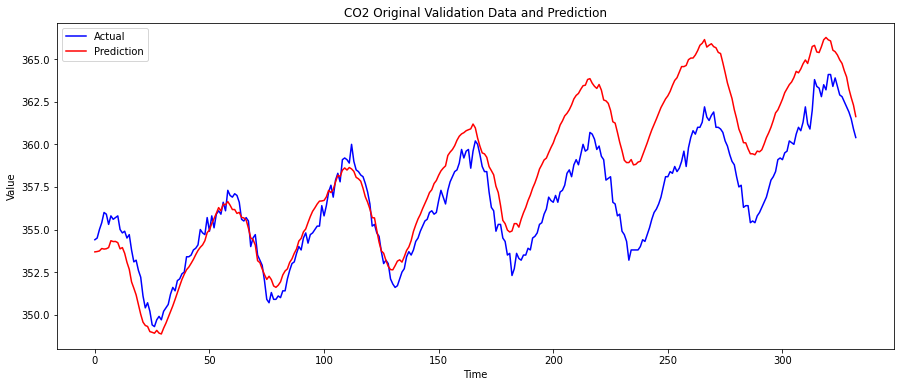

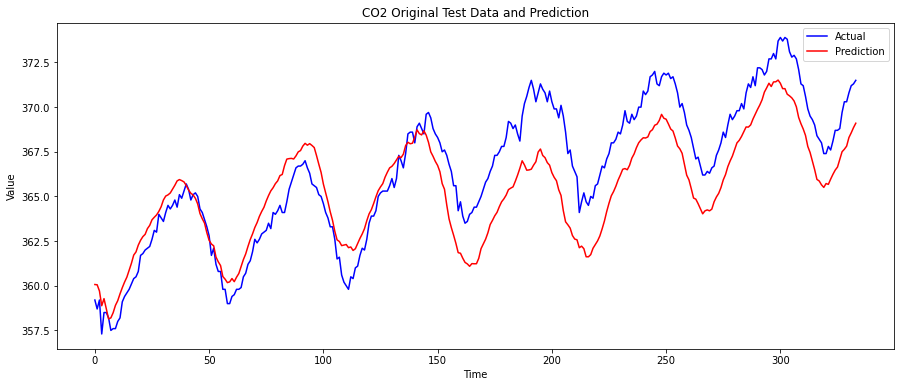

In [ ]:
tw = 50
predictions_pytorch_forecast = model_pytorch2.predict(all_data)

targets = all.values[tw+1:]
outputs = scaler.inverse_transform(np.array(predictions_pytorch_forecast).reshape(-1, 1))

real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Full"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

#print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))
print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

pred2 = outputs
pred2 = inverse_original(all.values[tw].item(), pred2)
pred2_df = pd.DataFrame(pred2)
pred2_df.index = pd.RangeIndex(start=0, stop=(len(pred2_df)), step=1)

plt.plot(targets, 'b', label="Actual")
plt.plot(pred2_df, 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

predictions_pytorch_forecast = model_pytorch2.predict(train_data)
targets = train[tw+1:].values
outputs = scaler.inverse_transform(np.array(predictions_pytorch_forecast).reshape(-1, 1))

real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Train"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

#print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))
print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

pred2 = outputs
pred2 = np.array(inverse_original(all.values[tw].item(), pred2))
pred2_df = pd.DataFrame(pred2.reshape(-1, 1))
pred2_df.index = pd.RangeIndex(start=0, stop=(len(pred2_df)+0), step=1)

plt.plot(targets, 'b', label="Actual")
plt.plot(pred2_df, 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

predictions_pytorch_forecast = model_pytorch2.predict(val_data)
targets = val.values
outputs = scaler.inverse_transform(np.array(predictions_pytorch_forecast).reshape(-1, 1))
outputs = inverse_original(train.values[-1].item(), outputs)
real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Validation"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

#print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))
print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

plt.plot(targets, 'b', label="Actual")
plt.plot(np.array(outputs).reshape(-1), 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')


predictions_pytorch_forecast = model_pytorch2.predict(test_data)
targets = test.values
outputs = scaler.inverse_transform(np.array(predictions_pytorch_forecast).reshape(-1, 1))
outputs = inverse_original(val.values[-1].item(), outputs)
real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Test"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

#print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))
print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR))

fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(all_norm_scaled[tw:],'b')
#ax.plot(all_norm_scaled,'b')
#ax.plot(predictions_pytorch_forecast.reshape(-1),'r')

plt.plot(targets, 'b', label="Actual")
plt.plot(np.array(outputs).reshape(-1), 'r', label="Prediction")

#plt.axhline(y=L_u1, color='lime', linestyle='-', label="Right Extreme Threshold") #'--'
#plt.axhline(y=L_u2, color='darkorange', linestyle='-', label="Left Extreme Threshold")
plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

#Arima

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 8.1 MB/s 
     |████████████████████████████████| 9.5 MB 29.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pmdarima as pm

In [ ]:
data_arima = np.concatenate((train_norm, val_norm) , axis=None)

In [ ]:
arima = pm.ARIMA(order=(2, 0, 2), seasonal_order=(1, 0, 1, 65))
arima.fit(data_arima)
forecasts = arima.predict(test_norm.shape[0])
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(test_norm, 'b', label="Actual")
plt.plot(forecasts, 'r', label="Prediction")
plt.legend()
plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
arima2 = pm.auto_arima(data_arima, seasonal=True, m=12)

1.015439273586001

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


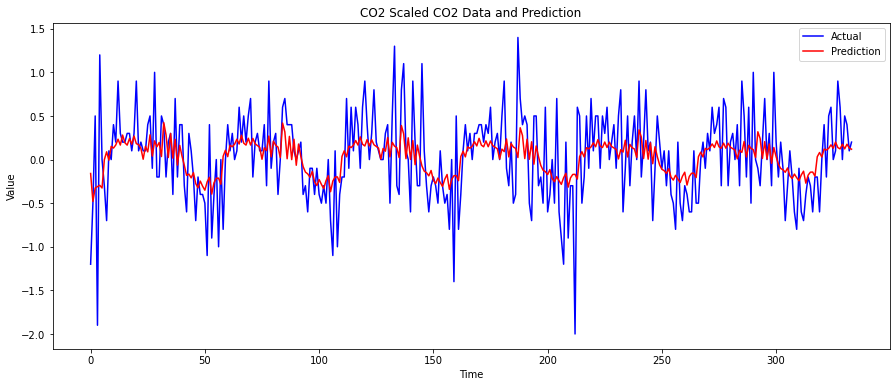

In [ ]:
#arima2 = pm.ARIMA(order=(1, 0, 3), seasonal_order=(2, 0, 1, 52))
arima2.fit(data_arima)
forecasts2 = arima2.predict(test_norm.shape[0])
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(test_norm, 'b', label="Actual")
plt.plot(forecasts2, 'r', label="Prediction")
plt.legend()
plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
arima2 = pm.ARIMA(order=(4, 0, 3), seasonal_order=(0, 0, 0, 0))
arima2.fit(data_arima)
forecasts2 = arima2.predict(test_norm.shape[0])
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(test_norm, 'b', label="Actual")
plt.plot(forecasts2, 'r', label="Prediction")
plt.legend()
data_part = "Test"
#plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
data_part = "Test"
targets = test_norm
outputs = forecasts2

rmse = round(np.sqrt(mean_squared_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))) ,6)
R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(1,-1), np.array(outputs).reshape(1,-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(rmse, R2, MAE, SMAPE, PCOR))

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(test_norm, 'b', label="Actual")
plt.plot(forecasts2, 'r', label="Prediction")
plt.legend()
plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

forecasts2_scaled = scaler.transform(forecasts2.reshape(-1, 1))

targets = test_norm_scaled
outputs = forecasts2_scaled

rmse = round(np.sqrt(mean_squared_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))) ,6)
R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(1,-1), np.array(outputs).reshape(1,-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(rmse, R2, MAE, SMAPE, PCOR))

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(test_norm_scaled, 'b', label="Actual")
plt.plot(forecasts2_scaled, 'r', label="Prediction")
plt.legend()
plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


targets = test.values
outputs = scaler.inverse_transform(np.array(forecasts2).reshape(-1, 1))
outputs = inverse_original(val.values[-1].item(), outputs)

rmse = round(np.sqrt(mean_squared_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))) ,6)
R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(1,-1), np.array(outputs).reshape(1,-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(rmse, R2, MAE, SMAPE, PCOR))

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(targets, 'b', label="Actual")
plt.plot(outputs, 'r', label="Prediction")
plt.legend()
plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
targets = test_norm
outputs = forecasts2

rmse = round(np.sqrt(mean_squared_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))) ,6)
R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(1,-1), np.array(outputs).reshape(1,-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(rmse, R2, MAE, SMAPE, PCOR))

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(test_norm, 'b', label="Actual")
plt.plot(forecasts2, 'r', label="Prediction")
plt.legend()
plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

forecasts2_scaled = scaler.transform(forecasts2.reshape(-1, 1))

targets = test_norm_scaled
outputs = forecasts2_scaled

rmse = round(np.sqrt(mean_squared_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))) ,6)
R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(1,-1), np.array(outputs).reshape(1,-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(rmse, R2, MAE, SMAPE, PCOR))

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(test_norm_scaled, 'b', label="Actual")
plt.plot(forecasts2_scaled, 'r', label="Prediction")
plt.legend()
plt.title(data_name2 + ' Scaled ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


targets = test.values
outputs = scaler.inverse_transform(np.array(forecasts2).reshape(-1, 1))
outputs = inverse_original(val.values[-1].item(), outputs)

rmse = round(np.sqrt(mean_squared_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))) ,6)
R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(1,-1), np.array(outputs).reshape(1,-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(rmse, R2, MAE, SMAPE, PCOR))

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(targets, 'b', label="Actual")
plt.plot(outputs, 'r', label="Prediction")
plt.legend()
plt.title(data_name2 + ' Original ' + data_part + ' Data and Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
predictions_pytorch_forecast = model_pytorch2.predict(test_data)
targets = test.values
outputs = scaler.inverse_transform(np.array(predictions_pytorch_forecast).reshape(-1, 1))
outputs = inverse_original(val.values[-1].item(), outputs)
real_label = np.zeros(len(outputs))
pred_label = np.zeros(len(outputs))

data_part = "Test"        
SE = 0
for i in range(len(outputs)):

    SE += (outputs[i]-targets[i])**2

    if (targets[i]>L_u1):
            real_label[i] = np.array([1])

    elif (targets[i]<L_u2):
            real_label[i] = np.array([-1])
    else:
            real_label[i] = np.array([0])


    if (outputs[i]>L_u1):
            pred_label[i] = np.array([1])

    elif (outputs[i]<L_u2):
            pred_label[i] = np.array([-1])
    else:
            pred_label[i] = np.array([0])

MSE = np.round((SE/len(outputs)), 6)
RMSE = np.round((np.sqrt(SE/len(outputs))), 6)

R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
MAE = round(mean_absolute_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

F1_MI = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='micro'), 6)
F1_MA = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='macro'), 6)
F1_W = round(f1_score(np.array(real_label).reshape(-1), np.array(pred_label).reshape(-1), average='weighted'), 6)

#print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {} - F1_MI: {} - F1_MA: {} - F1_W: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR, F1_MI, F1_MA, F1_W))
print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(round(RMSE[0],6), R2, MAE, SMAPE, PCOR))

In [ ]:
def evaluater(targets, outputs):

      rmse = round(np.sqrt(mean_squared_error(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))) ,6)
      R2 = round(r2_score(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
      MAE = round(mean_absolute_error(np.array(targets).reshape(1,-1), np.array(outputs).reshape(1,-1)),6)
      SMAPE = round(smape(np.array(targets).reshape(-1), np.array(outputs).reshape(-1)),6)
      PCOR = round(np.corrcoef(np.array(targets).reshape(-1), np.array(outputs).reshape(-1))[1,0], 6)

      print("RMSE: {} - R2: {} - MAE: {} - SMAPE: {} - PCOR: {}".format(rmse, R2, MAE, SMAPE, PCOR))

